# Donors choose data analysis

## Table of contents
[1. About dataset](#about_data)
<br>
[2. Preparing data for analysis - importing libraries, reading data...](#first_part)
<br>
[3. Univariate analysis](#univariate_analysis)
<br>
[4. Pre-processing data](#pre_processing_data)
<br>
[5. Vectorizing all features - preparing data for classification and modelling](#vectorizing_features)
<br>
[6. Vectorizing data using t-SNE](#data_visualization)
<br>
[7. Classification & Modelling Using K-NN](#classification_using_knn)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.1 Classification using k-NN(simple cross validation)](#classification_using_knn_simple_cross_validation)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7.1.1 Classification using k-NN(simple cross validation) on imbalanced data](#classification_using_knn_simple_cross_validation_imbalanced_data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7.1.2 Classification using k-NN(simple cross validation) on balanced data](#classification_using_knn_simple_cross_validation_balanced_data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.2 Classification using k-NN(k-fold cross validation)](#classification_using_knn_kfold_cross_validation)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7.2.1 Classification using k-NN(k-fold cross validation) on imbalanced data](#classification_using_knn_kfold_cross_validation_imbalanced_data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7.2.2 Classification using k-NN(k-fold cross validation) on balanced data](#classification_using_knn_kfold_cross_validation_balanced_data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.3 Classification using k-NN(k-fold cross validation & feature selection)](#classification_using_knn_kfold_cross_validation_feature_selection)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7.3.1 Classification using k-NN(k-fold cross validation & feature_selection) on imbalanced data](#classification_using_knn_kfold_cross_validation_feature_selection_imbalanced_data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7.3.2 Classification using k-NN(k-fold cross validation & feature_selection) on balanced data](#classification_using_knn_kfold_cross_validation_feature_selection_balanced_data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.4 Results of analysis using k-NN](#classification_using_knn_results)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.5 Conclusions of analysis using k-NN](#classification_using_knn_conclusions)<br>

<h4><a id="about_data"></a></h4>

## Little History about Data Set

Founded in 2000 by a high school teacher in the Bronx, DonorsChoose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students. At any given time, there are thousands of classroom requests that can be brought to life with a gift of any amount.

## Answers to What and Why Questions on Data Set

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


<h4><a id="first_part"></a></h4>
## Importing required libraries

In [217]:
# numpy for easy numerical computations
import numpy as np
# pandas for dataframes and filterings
import pandas as pd
# sqlite3 library for performing operations on sqlite file
import sqlite3
# matplotlib for plotting graphs
import matplotlib.pyplot as plt
# seaborn library for easy plotting
import seaborn as sbrn
# warnings library for specific settings
import warnings
# regularlanguage for regex operations
import re
# For loading precomputed models
import pickle

# tqdm for tracking progress of loops
from tqdm import tqdm_notebook as tqdm
# For creating dictionary of words
from collections import Counter
# For creating BagOfWords Model
from sklearn.feature_extraction.text import CountVectorizer
# For creating TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
# For standardizing values
from sklearn.preprocessing import StandardScaler
# For merging sparse matrices along row direction
from scipy.sparse import hstack
# For merging sparse matrices along column direction
from scipy.sparse import vstack
# For calculating TSNE values
from sklearn.manifold import TSNE
# For calculating the accuracy score on cross validate data
from sklearn.metrics import accuracy_score
# For performing the k-fold cross validation
from sklearn.model_selection import cross_val_score
# For splitting the data set into test and train data
from sklearn import cross_validation
# KNeighbors classifier for classification
from sklearn.neighbors import KNeighborsClassifier
# For creating samples for making dataset balanced
from sklearn.utils import resample
# For shuffling the dataframes
from sklearn.utils import shuffle
# For calculating roc_curve parameters
from sklearn.metrics import roc_curve
# For calculating auc value
from sklearn.metrics import auc
# For displaying results in table format
from prettytable import PrettyTable
# For generating confusion matrix
from sklearn.metrics import confusion_matrix
# For selecting most useful features
from sklearn.feature_selection import SelectKBest, f_classif

warnings.filterwarnings('ignore')

## Reading and Storing Data

In [2]:
projectsData = pd.read_csv('train_data.csv');
resourcesData = pd.read_csv('resources.csv');

In [3]:
projectsData.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   
2                    Health & Sports    Health & Wellness, Team Sports   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0

In [4]:
projectsData.tail(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
109245      143653  p155633  cdbfd04aa041dc6739e9e576b1fb1478           Mrs.   
109246      164599  p206114  6d5675dbfafa1371f0e2f6f1b716fe2d           Mrs.   
109247      128381  p191189  ca25d5573f2bd2660f7850a886395927            Ms.   

       school_state project_submitted_datetime project_grade_category  \
109245           NJ        2016-08-25 17:11:32          Grades PreK-2   
109246           NY        2016-07-29 17:53:15             Grades 3-5   
109247           VA        2016-06-29 09:17:01             Grades 6-8   

                 project_subject_categories  \
109245  Literacy & Language, Math & Science   
109246       Health & Sports, Special Needs   
109247     Applied Learning, Math & Science   

             project_subject_subcategories  \
109245               Literacy, Mathematics   
109246    Health & Wellness, Special Needs   
109247  College & Career Prep, Mathematics   

                                         project_title  \
109245          2016/2017 Beginning of the Year Basics   
109246         Flexible Seating in Inclusive Classroom   
109247  Classroom Tech to Develop 21st Century Leaders   

                                          project_essay_1  \
109245  This is a great group of sharing and caring st...   
109246  Our students live in a small rural community. ...   
109247  When was the last time that you used math? Pro...   

                                          project_essay_2 project_essay_3  \
109245  My students learn about special events, holida...             NaN   
109246  Flexible classroom seating has been researched...             NaN   
109247  According to Forbes Magazine (2014), companies...             NaN   

       project_essay_4                           project_resource_summary  \
109245             NaN  My students need giant comfy pillows in order ...   
109246             NaN  My students need flexible seating options: bea...   
109247             NaN  My students need opportunities to work with te...   

        teacher_number_of_previously_posted_projects  project_is_approved  
109245                                             3                    1  
109246                                             0                    1  
109247                                             0                    1

In [5]:
resourcesData.head(3)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   

    price  
0  149.00  
1   14.95  
2    8.45

In [6]:
resourcesData.tail(3)

id                                        description  quantity  \
1541269  p031981  Black Electrical Tape (GIANT 3 PACK) Each Roll...         6   
1541270  p031981  Flormoon DC Motor Mini Electric Motor 0.5-3V 1...         2   
1541271  p031981  WAYLLSHINE 6PCS 2 x 1.5V AAA Battery Spring Cl...         2   

         price  
1541269   8.99  
1541270   8.14  
1541271   7.39

### Helper functions and classes

In [7]:
def equalsBorder(numberOfEqualSigns):
    """
    This function prints passed number of equal signs
    """
    print("="* numberOfEqualSigns);

In [8]:
# Citation link: https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [9]:
def printStyle(text, style):
    "This function prints text with the style passed to it"
    print(style + text + color.END);

### Shapes of projects data and resources data

In [10]:
printStyle("Number of data points in projects data: {}".format(projectsData.shape[0]), color.BOLD);
printStyle("Number of attributes in projects data:{}".format(projectsData.shape[1]), color.BOLD);
equalsBorder(60);
printStyle("Number of data points in resources data: {}".format(resourcesData.shape[0]), color.BOLD);
printStyle("Number of attributes in resources data: {}".format(resourcesData.shape[1]), color.BOLD);

Number of data points in projects data: 109248
Number of attributes in projects data:17
Number of data points in resources data: 1541272
Number of attributes in resources data: 4


<h4><a id="univariate_analysis"></a></h4>
<h1><font color="blue">Univariate data analysis</font></h1> 

Number of projects approved for funding: 92706, (84.85830404217927)
Number of projects not approved for funding: 16542, (15.141695957820739)


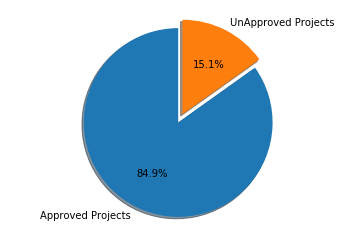

In [11]:
approvedProjects = projectsData[projectsData.project_is_approved == 1].shape[0];
unApprovedProjects = projectsData[projectsData.project_is_approved == 0].shape[0];
totalProjects = projectsData.shape[0];
print("Number of projects approved for funding: {}, ({})".format(approvedProjects, (approvedProjects / totalProjects) * 100));
print("Number of projects not approved for funding: {}, ({})".format(unApprovedProjects, (unApprovedProjects / totalProjects) * 100));
# Pie chart representation
# Citation: https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html
labels = ["Approved Projects", "UnApproved Projects"];
explode = (0, 0.1);
sizes = [approvedProjects, unApprovedProjects];
figure, ax = plt.subplots();
ax.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90);
ax.axis('equal');
plt.rcParams['figure.figsize'] = (7, 7);
plt.show();

### Observation:
1. There are more number of approved projects compared to rejected projects. So this is a imbalanced dataset.

## Univariate Analysis : 'school_state'

### Project proposal percentage in different states

In [12]:
groupedByStatesData = pd.DataFrame(projectsData.groupby(['school_state'])['project_is_approved'].apply(np.mean)).reset_index();
groupedByStatesData.columns = ['state_code', 'number_of_proposals'];
groupedByStatesData = groupedByStatesData.sort_values(by=['number_of_proposals'], ascending = True);
printStyle("5 States with lowest percentage of project approvals:", color.BOLD);
equalsBorder(60);
groupedByStatesData.head(5)

5 States with lowest percentage of project approvals:


state_code  number_of_proposals
46         VT             0.800000
7          DC             0.802326
43         TX             0.813142
26         MT             0.816327
18         LA             0.831245

In [13]:
printStyle("5 states with highest percentage of project approvals: ", color.BOLD);
equalsBorder(60);
groupedByStatesData.tail(5).iloc[::-1]

5 states with highest percentage of project approvals: 


state_code  number_of_proposals
8          DE             0.897959
28         ND             0.888112
47         WA             0.876178
35         OH             0.875152
30         NH             0.873563

In [14]:
def univariateBarPlots(data, col1, col2 = 'project_is_approved', orientation = 'vertical', plot = True):
    groupedData = data.groupby(col1);
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    tempData = pd.DataFrame(groupedData[col2].agg(lambda x: x.eq(1).sum())).reset_index();
    tempData['total'] = pd.DataFrame(groupedData[col2].agg({'total': 'count'})).reset_index()['total'];
    tempData['approval_rate'] = pd.DataFrame(groupedData[col2].agg({'approval_rate': 'mean'})).reset_index()['approval_rate'];
    tempData.sort_values(by=['total'], inplace = True, ascending = False);
    tempDataWithTotalAndCol2 = tempData[['total', col2, col1]]
    if plot:
        if(orientation == 'vertical'):
            tempDataWithTotalAndCol2.plot(x = col1, align= 'center', kind = 'bar', title = "Number of projects approved vs rejected", figsize = (20, 6), stacked = True, rot = 0);
        else:
            tempDataWithTotalAndCol2.plot(x = col1, align= 'center', kind = 'barh', title = "Number of projects approved vs rejected", width = 0.8, figsize = (23, 20), stacked = True);
    return tempData;

Top 5 states with high project proposals


school_state  project_is_approved  total  approval_rate
4            CA                13205  15388       0.858136
43           TX                 6014   7396       0.813142
34           NY                 6291   7318       0.859661
9            FL                 5144   6185       0.831690
27           NC                 4353   5091       0.855038

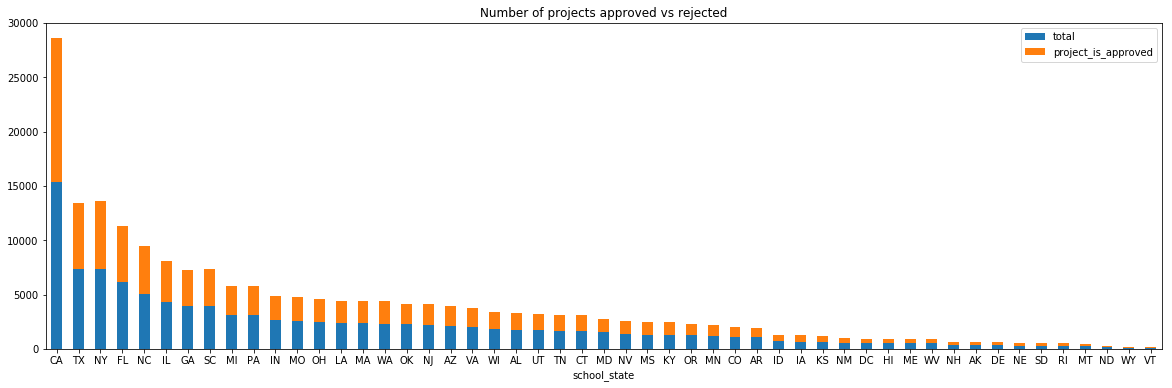

In [15]:
statesCharacteristicsData = univariateBarPlots(projectsData, 'school_state', 'project_is_approved', orientation = 'vertical');
printStyle("Top 5 states with high project proposals", color.BOLD)
equalsBorder(60);
statesCharacteristicsData.head(5)

In [16]:
printStyle("Top 5 states with least project proposals", color.BOLD)
equalsBorder(60);
statesCharacteristicsData.tail(5)

Top 5 states with least project proposals


school_state  project_is_approved  total  approval_rate
39           RI                  243    285       0.852632
26           MT                  200    245       0.816327
28           ND                  127    143       0.888112
50           WY                   82     98       0.836735
46           VT                   64     80       0.800000

### Observation:
1. Highest number of project proposals are from CA(California) and it was almost about 16000 projects
2. Every state has more than 80% approval rate.

### Univariate Analysis: teacher_prefix

Project proposals characteristics based on types of persons


teacher_prefix  project_is_approved  total  approval_rate
2           Mrs.                48997  57269       0.855559
3            Ms.                32860  38955       0.843537
1            Mr.                 8960  10648       0.841473
4        Teacher                 1877   2360       0.795339
0            Dr.                    9     13       0.692308

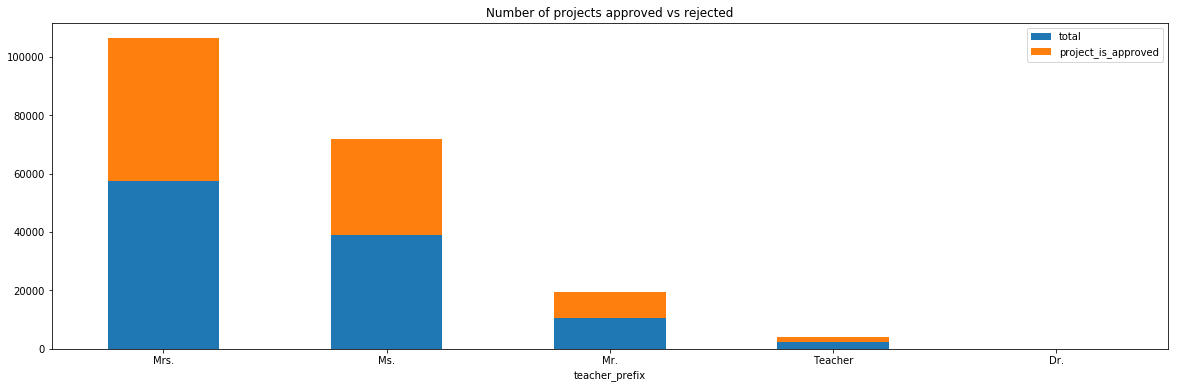

In [17]:
teacherPrefixCharacteristicsData = univariateBarPlots(projectsData, 'teacher_prefix', 'project_is_approved', orientation = 'vertical', plot = True);
printStyle("Project proposals characteristics based on types of persons", color.BOLD);
equalsBorder(60);
teacherPrefixCharacteristicsData

### Observataion:
1. When compared to others Dr.'s have proposed very less number of projects.
2. Women have proposed more number of projects than men.

### Univariate Analysis: project_grade

Project proposal characteristics based on grades


project_grade_category  project_is_approved  total  approval_rate
3          Grades PreK-2                37536  44225       0.848751
0             Grades 3-5                31729  37137       0.854377
1             Grades 6-8                14258  16923       0.842522
2            Grades 9-12                 9183  10963       0.837636

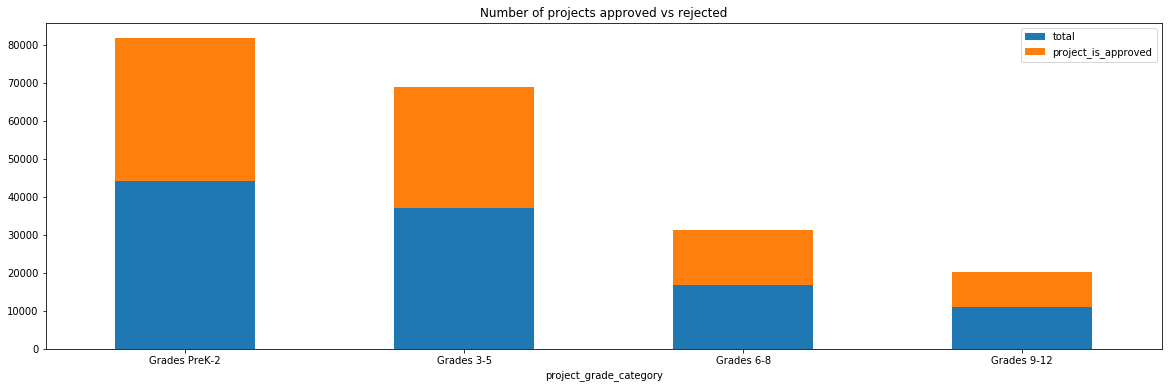

In [18]:
gradeCharacteristicsData = univariateBarPlots(projectsData, 'project_grade_category', 'project_is_approved', orientation = 'vertical', plot = True);
printStyle("Project proposal characteristics based on grades", color.BOLD);
equalsBorder(60);
gradeCharacteristicsData

### Observation:
1. Most number of projects proposed are for students less than grade-5 (for primary school students) which means that children are being taught with project oriented teaching which is great.

### Univariate Analysis: project_subject_categories

In [19]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
def cleanCategories(subjectCategories):
    cleanedCategories = []
    for subjectCategory in tqdm(subjectCategories):
        tempCategory = ""
        for category in subjectCategory.split(","):
            if 'The' in category.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                category = category.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            category = category.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            tempCategory += category.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
            tempCategory = tempCategory.replace('&','_')
        cleanedCategories.append(tempCategory)
    return cleanedCategories

In [20]:
# projectDataWithCleanedCategories = pd.DataFrame(projectsData);
subjectCategories = list(projectsData.project_subject_categories);
cleanedCategories = cleanCategories(subjectCategories);
printStyle("Sample categories: ", color.BOLD);
equalsBorder(60);
print(subjectCategories[0:5]);
equalsBorder(60);
printStyle("Sample cleaned categories: ", color.BOLD);
equalsBorder(60);
print(cleanedCategories[0:5]);
projectsData['cleaned_categories'] = cleanedCategories;
projectsData.head(5)


Sample categories: 
['Literacy & Language', 'History & Civics, Health & Sports', 'Health & Sports', 'Literacy & Language, Math & Science', 'Math & Science']
Sample cleaned categories: 
['Literacy_Language ', 'History_Civics Health_Sports ', 'Health_Sports ', 'Literacy_Language Math_Science ', 'Math_Science ']


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                cleaned_categories  
0               Literacy_Language   
1    History_Civics Health_Sports   
2                   Health_Sports   
3  Literacy_Language Math_Science   
4                    Math_Science

Project proposals characteristics based on subject categories


cleaned_categories  project_is_approved  total  approval_rate
24               Literacy_Language                 20520  23655       0.867470
32                    Math_Science                 13991  17072       0.819529
28  Literacy_Language Math_Science                 12725  14636       0.869432
8                    Health_Sports                  8640  10177       0.848973
40                      Music_Arts                  4429   5180       0.855019

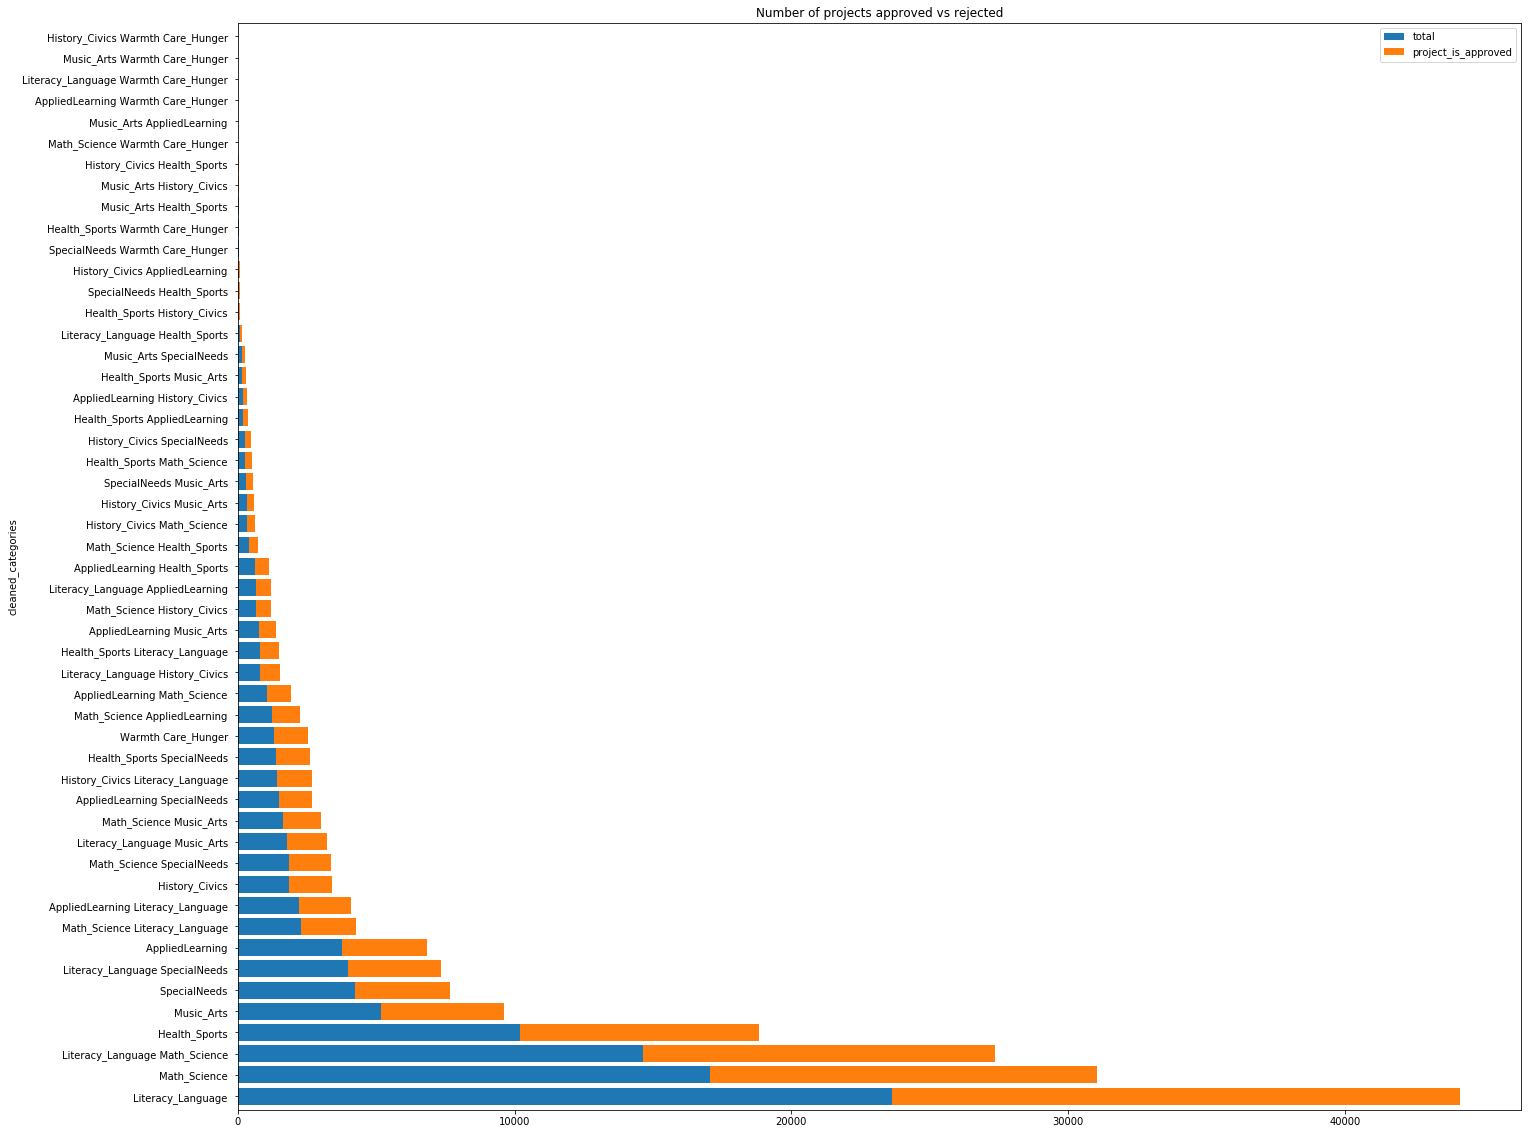

In [21]:
categoriesCharacteristicsData = univariateBarPlots(projectsData, 'cleaned_categories', 'project_is_approved', orientation = 'horizontal', plot = True);
print("Project proposals characteristics based on subject categories");
equalsBorder(60);
categoriesCharacteristicsData.head(5)

In [22]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
categoriesCounter = Counter()
for subjectCategory in projectsData.cleaned_categories.values:
    categoriesCounter.update(subjectCategory.split());
categoriesCounter

Counter({'Literacy_Language': 52239,
         'History_Civics': 5914,
         'Health_Sports': 14223,
         'Math_Science': 41421,
         'SpecialNeeds': 13642,
         'AppliedLearning': 12135,
         'Music_Arts': 10293,
         'Warmth': 1388,
         'Care_Hunger': 1388})

In [23]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
categoriesDictionary = dict(categoriesCounter);
sortedCategoriesDictionary = dict(sorted(categoriesDictionary.items(), key = lambda keyValue: keyValue[1]));
sortedCategoriesData = pd.DataFrame.from_dict(sortedCategoriesDictionary, columns = ['subject_categories'], orient = 'index');
printStyle("Number of projects by Subject Categories: ", color.BOLD);
equalsBorder(60);
sortedCategoriesData

Number of projects by Subject Categories: 


subject_categories
Warmth                           1388
Care_Hunger                      1388
History_Civics                   5914
Music_Arts                      10293
AppliedLearning                 12135
SpecialNeeds                    13642
Health_Sports                   14223
Math_Science                    41421
Literacy_Language               52239

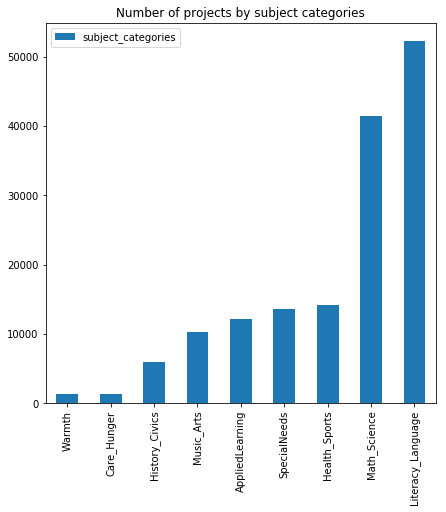

In [24]:
sortedCategoriesData.plot(kind = 'bar', title = 'Number of projects by subject categories');

### Observation:
1. Many number of projects proposed belong to multiple subject categories.
2. When compared to others literacy_language & math_science have large number of project proposals.

### Univariate Analysis: project_subject_subcategories

In [25]:
subjectSubCategories = projectsData.project_subject_subcategories;
cleanedSubCategories = cleanCategories(subjectSubCategories);
printStyle("Sample subject sub categories: ", color.BOLD);
equalsBorder(70);
print(subjectSubCategories[0:5]);
equalsBorder(70);
printStyle("Sample cleaned subject sub categories: ", color.BOLD);
equalsBorder(70);
print(cleanedSubCategories[0:5]);
projectsData['cleaned_sub_categories'] = cleanedSubCategories;


Sample subject sub categories: 
0                       ESL, Literacy
1    Civics & Government, Team Sports
2      Health & Wellness, Team Sports
3               Literacy, Mathematics
4                         Mathematics
Name: project_subject_subcategories, dtype: object
Sample cleaned subject sub categories: 
['ESL Literacy ', 'Civics_Government TeamSports ', 'Health_Wellness TeamSports ', 'Literacy Mathematics ', 'Mathematics ']


In [26]:
projectsData.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                cleaned_categories         cleaned_sub_categories  
0               Literacy_Language                   ESL Literacy   
1    History_Civics Health_Sports   Civics_Government TeamSports   
2                   Health_Sports     Health_Wellness TeamSports   
3  Literacy_Language Math_Science           Literacy Mathematics   
4                    Math_Science                    Mathematics

In [27]:
subCategoriesCharacteristicsData = univariateBarPlots(projectsData, 'cleaned_sub_categories', 'project_is_approved', plot = False);
print("Project proposals characteristics based on subject sub categories");
equalsBorder(60);
subCategoriesCharacteristicsData.head(5)

Project proposals characteristics based on subject sub categories


cleaned_sub_categories  project_is_approved  total  \
317                        Literacy                  8371   9486   
319            Literacy Mathematics                  7260   8325   
331  Literature_Writing Mathematics                  5140   5923   
318     Literacy Literature_Writing                  4823   5571   
342                     Mathematics                  4385   5379   

     approval_rate  
317       0.882458  
319       0.872072  
331       0.867803  
318       0.865733  
342       0.815207

In [28]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
subjectsSubCategoriesCounter = Counter();
for subCategory in projectsData.cleaned_sub_categories:
    subjectsSubCategoriesCounter.update(subCategory.split());
subjectsSubCategoriesCounter

Counter({'ESL': 4367,
         'Literacy': 33700,
         'Civics_Government': 815,
         'TeamSports': 2192,
         'Health_Wellness': 10234,
         'Mathematics': 28074,
         'Literature_Writing': 22179,
         'SpecialNeeds': 13642,
         'ParentInvolvement': 677,
         'EnvironmentalScience': 5591,
         'Health_LifeScience': 4235,
         'AppliedSciences': 10816,
         'EarlyDevelopment': 4254,
         'Music': 3145,
         'ForeignLanguages': 890,
         'Other': 2372,
         'Economics': 269,
         'FinancialLiteracy': 568,
         'Gym_Fitness': 4509,
         'VisualArts': 6278,
         'Warmth': 1388,
         'Care_Hunger': 1388,
         'SocialSciences': 1920,
         'College_CareerPrep': 2568,
         'CharacterEducation': 2065,
         'PerformingArts': 1961,
         'CommunityService': 441,
         'History_Geography': 3171,
         'NutritionEducation': 1355,
         'Extracurricular': 810})

Number of projects sorted by subject sub categories: 


subject_sub_categories
Economics                                269
CommunityService                         441
FinancialLiteracy                        568
ParentInvolvement                        677
Extracurricular                          810
Civics_Government                        815
ForeignLanguages                         890
NutritionEducation                      1355
Warmth                                  1388
Care_Hunger                             1388
SocialSciences                          1920
PerformingArts                          1961
CharacterEducation                      2065
TeamSports                              2192
Other                                   2372
College_CareerPrep                      2568
Music                                   3145
History_Geography                       3171
Health_LifeScience                      4235
EarlyDevelopment                        4254
ESL                                     4367
Gym_Fitness                             4509
EnvironmentalScience                    5591
VisualArts                              6278
Health_Wellness                        10234
AppliedSciences                        10816
SpecialNeeds                           13642
Literature_Writing                     22179
Mathematics                            28074
Literacy                               33700

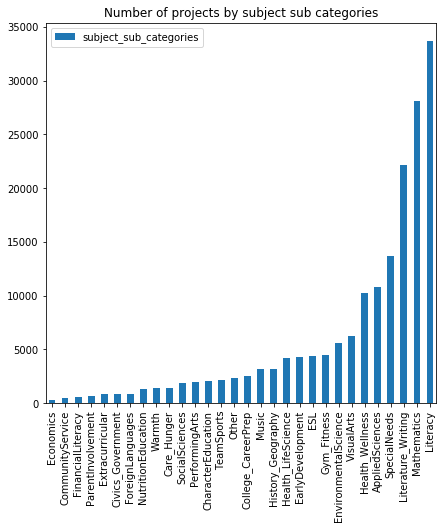

In [29]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
dictionarySubCategories = dict(subjectsSubCategoriesCounter);
sortedDictionarySubCategories = dict(sorted(dictionarySubCategories.items(), key = lambda keyValue: keyValue[1]));
sortedSubCategoriesData = pd.DataFrame.from_dict(sortedDictionarySubCategories, columns = ['subject_sub_categories'], orient = 'index');
sortedSubCategoriesData.plot(kind = 'bar', title = "Number of projects by subject sub categories");
printStyle("Number of projects sorted by subject sub categories: ", color.BOLD);
equalsBorder(70);
sortedSubCategoriesData

### Observation:
1. There are more number of subject subcategories than subject categories.
2. Even more number of projects proposed belong to multiple subject sub categories.

### Univariate Analysis : project_title

number_of_words  number_of_projects
0                13                   1
1                12                  11
2                11                  30
3                 1                  31
4                10                3968
5                 9                5383
6                 8                7289
7                 2                8733
8                 7               10631
9                 6               14824
10                3               18691
11                5               19677
12                4               19979

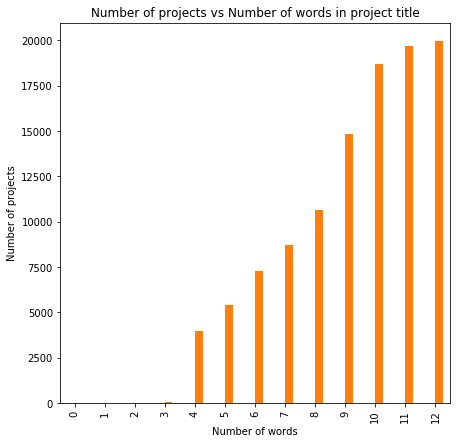

In [30]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
wordCounts = projectsData['project_title'].str.split().apply(len).value_counts();
dictionaryWordCounts = dict(wordCounts);
dictionaryWordCounts = dict(sorted(dictionaryWordCounts.items(), key = lambda kv: kv[1]));
wordCountsData = pd.DataFrame.from_dict({'number_of_words': list(dictionaryWordCounts.keys()), 'number_of_projects': list(dictionaryWordCounts.values())}).sort_values(by = ['number_of_projects']);
wordCountsData.plot(kind = 'bar', title = "Number of projects vs Number of words in project title", legend = False);
plt.xlabel('Number of words');
plt.ylabel('Number of projects');
wordCountsData

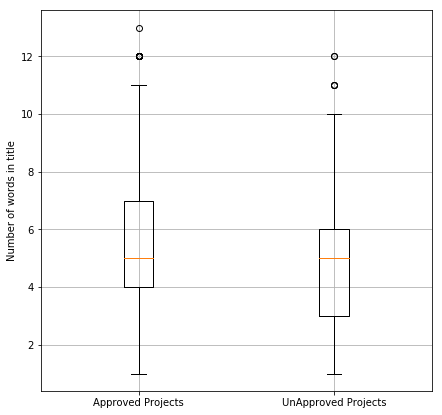

In [31]:
approvedNumberOfProjects = projectsData[projectsData.project_is_approved == 1]['project_title'].str.split().apply(len);
approvedNumberOfProjects = approvedNumberOfProjects.values
unApprovedNumberOfProjects = projectsData[projectsData.project_is_approved == 0]['project_title'].str.split().apply(len);
unApprovedNumberOfProjects = unApprovedNumberOfProjects.values
plt.boxplot([approvedNumberOfProjects, unApprovedNumberOfProjects]);
plt.grid();
plt.xticks([1, 2], ['Approved Projects', 'UnApproved Projects']);
plt.ylabel('Number of words in title');
plt.show();

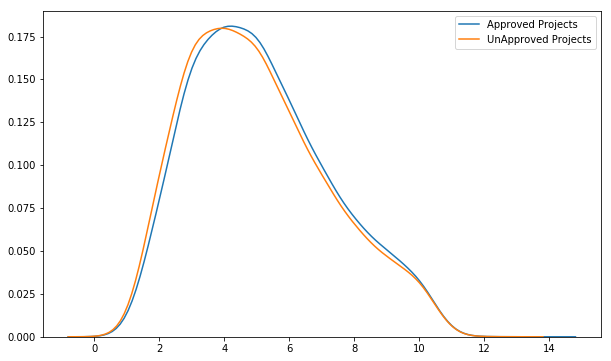

In [32]:
plt.figure(figsize = (10, 6));
sbrn.kdeplot(approvedNumberOfProjects, label = "Approved Projects", bw = 0.6);
sbrn.kdeplot(unApprovedNumberOfProjects, label = "UnApproved Projects", bw = 0.6);
plt.legend();
plt.show();

### Observations:
1. Most of the approved projects have between 4 to 8 number of words in their project_title.
2. Most of the rejected projects have between 3 to 6 number of words in their project_title.

### Univariate Analysis: project_essay_1,2,3,4

In [33]:
projectsData['project_essay'] = projectsData['project_essay_1'].map(str) + projectsData['project_essay_2'].map(str) + \
                                projectsData['project_essay_3'].map(str) + projectsData['project_essay_4'].map(str);
projectsData.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                cleaned_categories         cleaned_sub_categories  \
0               Literacy_Language                   ESL Literacy    
1    History_Civics Health_Sports   Civics_Government TeamSports    
2                   Health_Sports     Health_Wellness TeamSports    
3  Literacy_Language Math_Science           Literacy Mathematics    
4                    Math_Science                    Mathematics    

                                       project_essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...  
2  \r\n\"True champions aren't always the ones th...  
3  I work at a unique school filled with both ESL...  
4  Our second grade cla

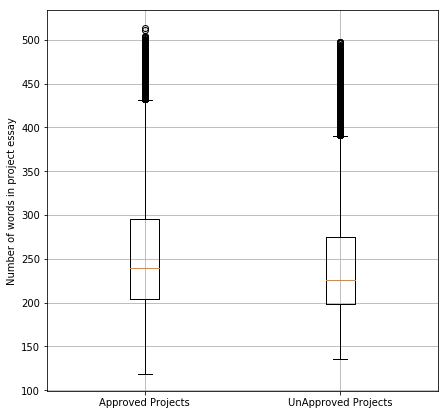

In [34]:
approvedNumberOfProjects = projectsData[projectsData.project_is_approved == 1]['project_essay'].str.split().apply(len);
approvedNumberOfProjects = approvedNumberOfProjects.values
unApprovedNumberOfProjects = projectsData[projectsData.project_is_approved == 0]['project_essay'].str.split().apply(len);
unApprovedNumberOfProjects = unApprovedNumberOfProjects.values
plt.boxplot([approvedNumberOfProjects, unApprovedNumberOfProjects]);
plt.grid();
plt.xticks([1, 2], ['Approved Projects', 'UnApproved Projects']);
plt.ylabel('Number of words in project essay');
plt.show();

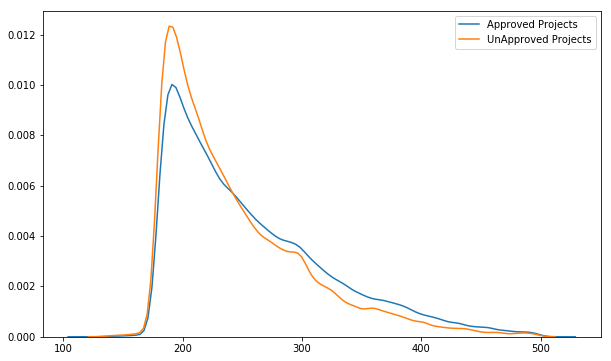

In [35]:
plt.figure(figsize = (10, 6));
sbrn.kdeplot(approvedNumberOfProjects, label = "Approved Projects", bw = 5);
sbrn.kdeplot(unApprovedNumberOfProjects, label = "UnApproved Projects", bw = 5);
plt.legend();
plt.show();

### Observation:
1. The approved and rejected projects overlap largely when plotted based on number of words in project_essay. So we cannot predict any observation which will be useful for classification.

### Univariate Analysis: price

In [36]:
projectsData.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                cleaned_categories         cleaned_sub_categories  \
0               Literacy_Language                   ESL Literacy    
1    History_Civics Health_Sports   Civics_Government TeamSports    
2                   Health_Sports     Health_Wellness TeamSports    
3  Literacy_Language Math_Science           Literacy Mathematics    
4                    Math_Science                    Mathematics    

                                       project_essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...  
2  \r\n\"True champions aren't always the ones th...  
3  I work at a unique school filled with both ESL...  
4  Our second grade cla

In [37]:
resourcesData.head(5)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

In [38]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
priceAndQuantityData = resourcesData.groupby('id').agg({'price': 'sum', 'quantity': 'sum'}).reset_index();
priceAndQuantityData.head(5)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [39]:
projectsData.shape

(109248, 20)

In [40]:
projectsData = pd.merge(projectsData, priceAndQuantityData, on = 'id', how = 'left');
print(projectsData.shape);
projectsData.head(3)

(109248, 22)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   
2                    Health & Sports    Health & Wellness, Team Sports   

                                       project_title   ...    project_essay_3  \
0   Educational Support for English Learners at Home   ...                NaN   
1              Wanted: Projector for Hungry Learners   ...                NaN   
2  Soccer Equipment for AWESOME Middle School Stu...   ...                NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   
2                                            1                   0   

              cleaned_categories         cleaned_sub_categories  \
0             Literacy_Language                   ESL Literacy    
1  History_Civics Health_Sports   Civics_Government TeamSports    
2                 Health_Sports     Health_Wellness TeamSports    

                                       project_essay   price quantity  
0  My students are English learners that are work...  154.60       23  
1  Our students arrive to our school eager to lea...  299.00        1  
2  \r\n\"True champions aren't always the ones th...  516.85       22  

[3 rows x 22 columns]

In [41]:
projectsData[projectsData['id'] == 'p253737']

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

  project_subject_categories project_subject_subcategories  \
0        Literacy & Language                 ESL, Literacy   

                                      project_title   ...    project_essay_3  \
0  Educational Support for English Learners at Home   ...                NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   

   cleaned_categories  cleaned_sub_categories  \
0  Literacy_Language            ESL Literacy    

                                       project_essay  price quantity  
0  My students are English learners that are work...  154.6       23  

[1 rows x 22 columns]

In [42]:
priceAndQuantityData[priceAndQuantityData['id'] == 'p253737']

id  price  quantity
253736  p253737  154.6        23

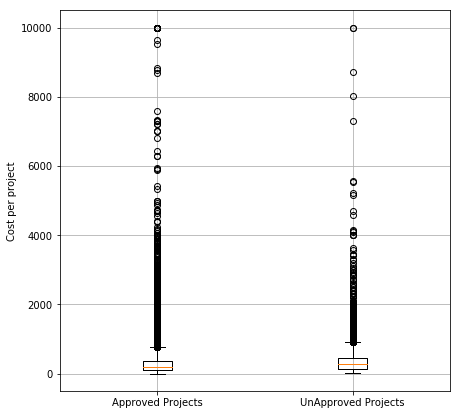

In [43]:
approvedProjectsPrice = projectsData[projectsData['project_is_approved'] == 1].price;
unApprovedProjectsPrice = projectsData[projectsData['project_is_approved'] == 0].price;
plt.boxplot([approvedProjectsPrice, unApprovedProjectsPrice]);
plt.grid();
plt.xticks([1, 2], ['Approved Projects', 'UnApproved Projects']);
plt.ylabel('Cost per project');
plt.show();

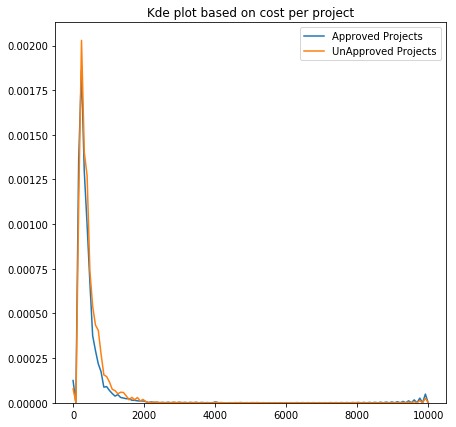

In [44]:
plt.title("Kde plot based on cost per project");
sbrn.kdeplot(approvedProjectsPrice, label = "Approved Projects", bw = 0.6);
sbrn.kdeplot(unApprovedProjectsPrice, label = "UnApproved Projects", bw = 0.6);
plt.legend();
plt.show();

In [45]:
pricePercentilesApproved = [round(np.percentile(approvedProjectsPrice, percentile), 3) for percentile in np.arange(0, 100, 5)];
pricePercentilesUnApproved = [round(np.percentile(unApprovedProjectsPrice, percentile), 3) for percentile in np.arange(0, 100, 5)];
percentileValuePricesData = pd.DataFrame({'Percentile': np.arange(0, 100, 5), 'Approved projects': pricePercentilesApproved, 'UnApproved Projects': pricePercentilesUnApproved});
percentileValuePricesData

Percentile  Approved projects  UnApproved Projects
0            0              0.660                1.970
1            5             13.590               41.900
2           10             33.880               73.670
3           15             58.000               99.109
4           20             77.380              118.560
5           25             99.950              140.892
6           30            116.680              162.230
7           35            137.232              184.014
8           40            157.000              208.632
9           45            178.265              235.106
10          50            198.990              263.145
11          55            223.990              292.610
12          60            255.630              325.144
13          65            285.412              362.390
14          70            321.225              399.990
15          75            366.075              449.945
16          80            411.670              519.282
17          85            479.000              618.276
18          90            593.110              739.356
19          95            801.598              992.486

### Observation:
1. Most of the projects proposed are of less cost.

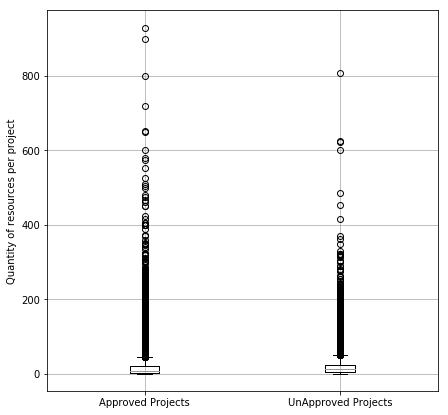

In [46]:
approvedProjectsQuantity = projectsData[projectsData['project_is_approved'] == 1].quantity;
unApprovedProjectsQuantity = projectsData[projectsData['project_is_approved'] == 0].quantity;
plt.boxplot([approvedProjectsQuantity, unApprovedProjectsQuantity]);
plt.grid();
plt.xticks([1, 2], ['Approved Projects', 'UnApproved Projects']);
plt.ylabel('Quantity of resources per project');
plt.show();

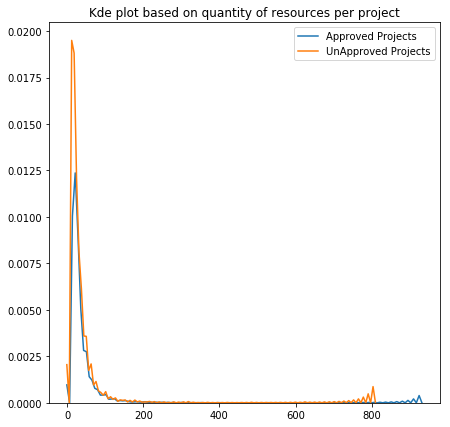

In [47]:
plt.title("Kde plot based on quantity of resources per project");
sbrn.kdeplot(approvedProjectsQuantity, label = "Approved Projects", bw = 0.6);
sbrn.kdeplot(unApprovedProjectsQuantity, label = "UnApproved Projects", bw = 0.6);
plt.legend();
plt.show();

In [48]:
quantityPercentilesApproved = [round(np.percentile(approvedProjectsQuantity, percentile), 3) for percentile in np.arange(0, 100, 5)];
quantityPercentilesUnApproved = [round(np.percentile(unApprovedProjectsQuantity, percentile), 3) for percentile in np.arange(0, 100, 5)];
percentileValueQuantitiesData = pd.DataFrame({'Percentile': np.arange(0, 100, 5), 'Approved projects': quantityPercentilesApproved, 'UnApproved Projects': quantityPercentilesUnApproved});
percentileValueQuantitiesData

Percentile  Approved projects  UnApproved Projects
0            0                1.0                  1.0
1            5                1.0                  2.0
2           10                1.0                  3.0
3           15                2.0                  4.0
4           20                3.0                  5.0
5           25                3.0                  6.0
6           30                4.0                  7.0
7           35                5.0                  8.0
8           40                6.0                  9.0
9           45                7.0                 10.0
10          50                8.0                 12.0
11          55               10.0                 13.0
12          60               11.0                 15.0
13          65               14.0                 18.0
14          70               16.0                 20.0
15          75               20.0                 24.0
16          80               25.0                 29.0
17          85               30.0                 35.0
18          90               38.0                 45.0
19          95               56.0                 63.0

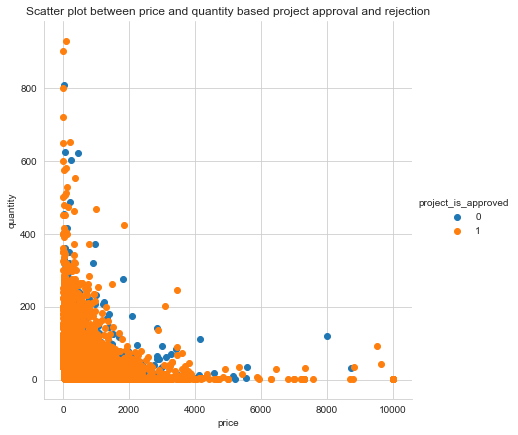

In [49]:
sbrn.set_style('whitegrid');
sbrn.FacetGrid(projectsData, hue = 'project_is_approved', size = 6) \
    .map(plt.scatter, 'price', 'quantity') \
    .add_legend();
plt.title("Scatter plot between price and quantity based project approval and rejection");
plt.show();

### Observation:
1. When plotted scatter plot between approved and rejected projects based on price and quantity there is huge overlap. So the projects approval is not actually depending on price and quantity resources of the project.

### Univariate Analysis: teacher_number_of_previously_posted_projects

In [50]:
projectsData.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title   ...    project_essay_3  \
0   Educational Support for English Learners at Home   ...                NaN   
1              Wanted: Projector for Hungry Learners   ...                NaN   
2  Soccer Equipment for AWESOME Middle School Stu...   ...                NaN   
3                             Techie Kindergarteners   ...                NaN   
4                             Interactive Math Tools   ...                NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   
2                                            1                   0   
3                                            4                   1   
4                                            1                   1   

                cleaned_categories         cleaned_sub_categories  \
0               Literacy_Language                   ESL Literacy    
1    History_Civics Health_Sports   Civics_Government TeamSports    
2                   Health_Sports     Health_Wellness TeamSports    
3  Literacy_Language Math_Science           Literacy Mathematics    
4                    Math_Science                    Mathematics    

                                       project_essay   price quantity  
0  My students are English learners that are work...  154.60       23  
1  Our students arrive to our school eager to lea...  299.00        1  
2  \r\n\"True champions aren't always the ones th...  516.85       22  
3  I work at a unique school filled with both ESL...  232.90        4  
4  Our second grade classroom next year will be m...   67.98        4  

[5 rows x 22 columns]

In [51]:
previouslyPostedApprovedNumberData = projectsData.groupby('teacher_number_of_previously_posted_projects')['project_is_approved'].agg(lambda x: x.eq(1).sum()).reset_index();
previouslyPostedRejectedNumberData = projectsData.groupby('teacher_number_of_previously_posted_projects')['project_is_approved'].agg(lambda x: x.eq(0).sum()).reset_index();
print("Total number of projects approved: ", len(projectsData[projectsData['project_is_approved'] == 1]));
print("Total number of projects rejected: ", len(projectsData[projectsData['project_is_approved'] == 0]));
print("Number of projects approved categorized by previously_posted: ", previouslyPostedApprovedNumberData['project_is_approved'].sum());
print("Number of projects rejected categorized by previously_posted: ", previouslyPostedRejectedNumberData['project_is_approved'].sum());
previouslyPostedNumberData = pd.merge(previouslyPostedApprovedNumberData, previouslyPostedRejectedNumberData, on = 'teacher_number_of_previously_posted_projects', how = 'inner');
previouslyPostedNumberData.head(5)

Total number of projects approved:  92706
Total number of projects rejected:  16542
Number of projects approved categorized by previously_posted:  92706
Number of projects rejected categorized by previously_posted:  16542


teacher_number_of_previously_posted_projects  project_is_approved_x  \
0                                             0                  24652   
1                                             1                  13329   
2                                             2                   8705   
3                                             3                   5997   
4                                             4                   4452   

   project_is_approved_y  
0                   5362  
1                   2729  
2                   1645  
3                   1113  
4                    814

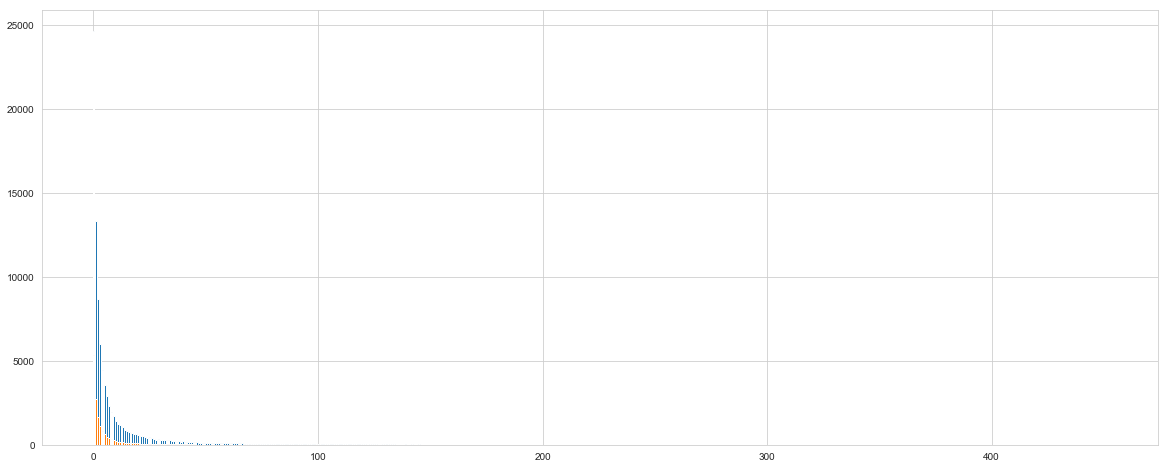

In [52]:
plt.figure(figsize = (20, 8));
plt.bar(previouslyPostedNumberData.teacher_number_of_previously_posted_projects, previouslyPostedNumberData.project_is_approved_x);
plt.bar(previouslyPostedNumberData.teacher_number_of_previously_posted_projects, previouslyPostedNumberData.project_is_approved_y);
plt.show();

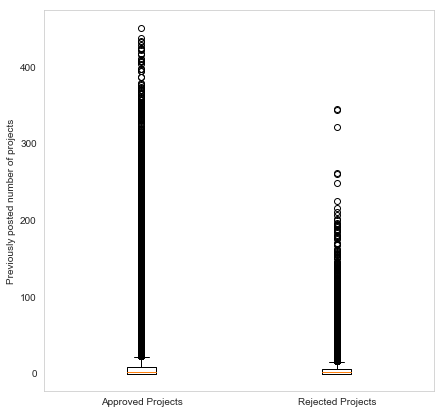

In [53]:
previouslyPostedApprovedData = projectsData[projectsData['project_is_approved'] == 1].teacher_number_of_previously_posted_projects;
previouslyPostedRejectedData = projectsData[projectsData['project_is_approved'] == 0].teacher_number_of_previously_posted_projects;
plt.boxplot([previouslyPostedApprovedData, previouslyPostedRejectedData]);
plt.grid();
plt.xticks([1, 2], ['Approved Projects', 'Rejected Projects']);
plt.ylabel('Previously posted number of projects');
plt.show();

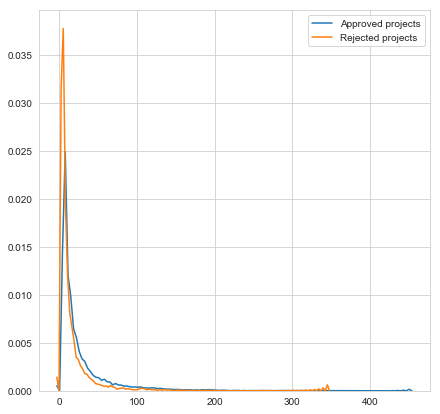

In [54]:
sbrn.kdeplot(previouslyPostedApprovedData, label = "Approved projects", bw = 1);
sbrn.kdeplot(previouslyPostedRejectedData, label = "Rejected projects", bw = 1);
plt.show();

### Observation:
1. Most of the projects approved and rejected are with less number of teacher_number_of_previously_posted_projects. So the approval is not much depending on how many number of projects proposed by teacher previously. 

In [55]:
def stringContainsNumbers(string):
    return any([character.isdigit() for character in string])

In [56]:
numericResourceApprovedData = projectsData[(projectsData['project_resource_summary'].apply(stringContainsNumbers) == True) & (projectsData['project_is_approved'] == 1)]
textResourceApprovedData = projectsData[(projectsData['project_resource_summary'].apply(stringContainsNumbers) == False) & (projectsData['project_is_approved'] == 1)]
numericResourceRejectedData = projectsData[(projectsData['project_resource_summary'].apply(stringContainsNumbers) == True) & (projectsData['project_is_approved'] == 0)]
textResourceRejectedData = projectsData[(projectsData['project_resource_summary'].apply(stringContainsNumbers) == False) & (projectsData['project_is_approved'] == 0)]
print("Checking whether numbers in resource summary will be useful for project approval?");
equalsBorder(70);
print("Number of approved projects with numbers in resource summary: ", numericResourceApprovedData.shape[0]);
print("Number of rejected projects with numbers in resource summary: ", numericResourceRejectedData.shape[0]);
print("Number of approved projects without numbers in resource summary: ", textResourceApprovedData.shape[0]);
print("Number of rejected projects without numbers in resource summary: ", textResourceRejectedData.shape[0]);

Checking whether numbers in resource summary will be useful for project approval?
Number of approved projects with numbers in resource summary:  14090
Number of rejected projects with numbers in resource summary:  1666
Number of approved projects without numbers in resource summary:  78616
Number of rejected projects without numbers in resource summary:  14876


### Observation:
1. The rejection rate of project is less when projects resource summary has numbers in it.
2. Even the number of projects approved without numbers in resource summary is high which means that the classification does not actually depends on whether resource summary contains numerical digits or not.

## Conclusion of univariate analysis:
1. There is huge overlap of approved and rejected projects when taken for all single featurs. So, this project cannot be classified using single features.
2. project_title is some what better in text type of feature because of less overlap than others.
3. The project approval is not depending on resources cost, but the probability of project rejection is more when resources cost is more.

<h4><a id="pre_processing_data"></a></h4>
## Preprocessing data

In [57]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# All stopwords that are needed to be removed in the text
stopWords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]);
def preProcessingWithAndWithoutStopWords(texts):
    """
    This function takes list of texts and returns preprocessed list of texts one with
    stop words and one without stopwords.
    """
    # Variable for storing preprocessed text with stop words
    preProcessedTextsWithStopWords = [];
    # Variable for storing preprocessed text without stop words
    preProcessedTextsWithoutStopWords = [];
    
    # Looping over list of texts for performing pre processing
    for text in tqdm(texts, total = len(texts)):
        # Removing all links in the text
        text = re.sub(r"http\S+", "", text);

        # Removing all html tags in the text
        text = re.sub(r"<\w+/>", "", text);
        text = re.sub(r"<\w+>", "", text);
        
        # https://stackoverflow.com/a/47091490/4084039
        # Replacing all below words with adverbs
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"can\'t", "can not", text)
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)
        
        # Removing backslash symbols in text
        text = text.replace('\\r', ' ');
        text = text.replace('\\n', ' ');
        text = text.replace('\\"', ' ');
        
        # Removing all special characters of text
        text = re.sub(r"[^a-zA-Z0-9]+", " ", text);
        
        # Converting whole review text into lower case
        text = text.lower();
        
        # adding this preprocessed text without stopwords to list
        preProcessedTextsWithStopWords.append(text);
        
        # removing stop words from text
        textWithoutStopWords = ' '.join([word for word in text.split() if word not in stopWords]);
        # adding this preprocessed text without stopwords to list
        preProcessedTextsWithoutStopWords.append(textWithoutStopWords);

    return [preProcessedTextsWithStopWords, preProcessedTextsWithoutStopWords];

In [58]:
texts = [projectsData['project_essay'].values[0]]
preProcessedTextsWithStopWords, preProcessedTextsWithoutStopWords = preProcessingWithAndWithoutStopWords(texts);
print("Example project essay without pre-processing: ");
equalsBorder(70);
print(texts);
equalsBorder(70);
print("Example project essay with stop words and pre-processing: ");
equalsBorder(70);
print(preProcessedTextsWithStopWords);
equalsBorder(70);
print("Example project essay without stop words and pre-processing: ");
equalsBorder(70);
print(preProcessedTextsWithoutStopWords);


Example project essay without pre-processing: 
['My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \\r\\n\\r\\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\\"The limits of your language are the limits of your world.\\"-Ludwig Wittgenstein  Our English learner\'s have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\\r\

In [59]:
projectEssays = projectsData['project_essay'];
preProcessedEssaysWithStopWords, preProcessedEssaysWithoutStopWords = preProcessingWithAndWithoutStopWords(projectEssays);

In [60]:
preProcessedEssaysWithoutStopWords[0:3]

['students english learners working english second third languages melting pot refugees immigrants native born americans bringing gift language school 24 languages represented english learner program students every level mastery also 40 countries represented families within school student brings wealth knowledge experiences us open eyes new cultures beliefs respect limits language limits world ludwig wittgenstein english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills providing dvd players students able continue mastery english language even no one home able assist families students within level 1 proficiency status offered part program educational videos specially chosen english learner teacher sent home regularly watch videos help child develop early reading skills parents not access dvd player opportunity check dvd 

In [61]:
projectTitles = projectsData['project_title'];
preProcessedProjectTitlesWithStopWords, preProcessedProjectTitlesWithoutStopWords = preProcessingWithAndWithoutStopWords(projectTitles);
preProcessedProjectTitlesWithoutStopWords[0:5]

['educational support english learners home',
 'wanted projector hungry learners',
 'soccer equipment awesome middle school students',
 'techie kindergarteners',
 'interactive math tools']

## Preparing data for classification and modelling

In [62]:
pd.DataFrame(projectsData.columns, columns = ['All features in projects data'])

All features in projects data
0                                     Unnamed: 0
1                                             id
2                                     teacher_id
3                                 teacher_prefix
4                                   school_state
5                     project_submitted_datetime
6                         project_grade_category
7                     project_subject_categories
8                  project_subject_subcategories
9                                  project_title
10                               project_essay_1
11                               project_essay_2
12                               project_essay_3
13                               project_essay_4
14                      project_resource_summary
15  teacher_number_of_previously_posted_projects
16                           project_is_approved
17                            cleaned_categories
18                        cleaned_sub_categories
19                                 project_essay
20                                         price
21                                      quantity

### Useful features:
#### Here we will consider only below features for classification and we can ignore the other features

##### Categorical data:
1. <b>school_state</b> - categorical data
2. <b>project_grade_category</b> - categorical data
3. <b>cleaned_categories</b> - categorical data
4. <b>cleaned_sub_categories</b> - categorical data
5. <b>teacher_prefix</b> - categorical data

##### Text data:
1. <b>project_resource_summary</b> - text data
2. <b>project_title - text data</b>
3. <b>project_resource_summary</b> - text data

##### Numerical data:
1. <b>teacher_number_of_previously_posted_projects</b> - numerical data
2. <b>price</b> - numerical data
3. <b>quantity</b> - numerical data

<h4><a id="vectorizing_features"></a></h4>
## Vectorizing categorical data

### 1. Vectorizing cleaned_categories(project_subject_categories cleaned) - One Hot Encoding

In [63]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_categories
subjectsCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedCategoriesDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_categories values
subjectsCategoriesVectorizer.fit(projectsData['cleaned_categories'].values);
# Vectorizing categories using one-hot-encoding
categoriesVectors = subjectsCategoriesVectorizer.transform(projectsData['cleaned_categories'].values);

In [64]:
print("Features used in vectorizing categories: ");
equalsBorder(70);
print(subjectsCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", categoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(categoriesVectors[0:4])

Features used in vectorizing categories: 
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (109248, 9)
Sample vectors of categories: 
  (0, 8)	1
  (1, 2)	1
  (1, 6)	1
  (2, 6)	1
  (3, 7)	1
  (3, 8)	1


### 2. Vectorizing cleaned_sub_categories(project_subject_sub_categories cleaned) - One Hot Encoding

In [65]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_sub_categories
subjectsSubCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedDictionarySubCategories.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_sub_categories values
subjectsSubCategoriesVectorizer.fit(projectsData['cleaned_sub_categories'].values);
# Vectorizing sub categories using one-hot-encoding
subCategoriesVectors = subjectsSubCategoriesVectorizer.transform(projectsData['cleaned_sub_categories'].values);

In [66]:
print("Features used in vectorizing subject sub categories: ");
equalsBorder(70);
print(subjectsSubCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", subCategoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(subCategoriesVectors[0:4])

Features used in vectorizing subject sub categories: 
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (109248, 30)
Sample vectors of categories: 
  (0, 20)	1
  (0, 29)	1
  (1, 5)	1
  (1, 13)	1
  (2, 13)	1
  (2, 24)	1
  (3, 28)	1
  (3, 29)	1


### 3. Vectorizing teacher_prefix - One Hot Encoding

In [67]:
def giveCounter(data):
    counter = Counter();
    for dataValue in data:
        counter.update(str(dataValue).split());
    return counter

In [68]:
giveCounter(projectsData['teacher_prefix'].values)

Counter({'Mrs.': 57269,
         'Mr.': 10648,
         'Ms.': 38955,
         'Teacher': 2360,
         'nan': 3,
         'Dr.': 13})

In [69]:
projectsData = projectsData.dropna(subset = ['teacher_prefix']);
projectsData.shape

(109245, 22)

In [70]:
teacherPrefixDictionary = dict(giveCounter(projectsData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(projectsData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(projectsData['teacher_prefix'].values);

In [71]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:100]);

Features used in vectorizing teacher_prefix: 
['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (109245, 5)
Sample vectors of teacher_prefix: 
  (27, 3)	1
  (75, 3)	1
  (82, 3)	1
  (88, 3)	1


In [72]:
teacherPrefixes = [prefix.replace('.', '') for prefix in projectsData['teacher_prefix'].values];
teacherPrefixes[0:5]

['Mrs', 'Mr', 'Ms', 'Mrs', 'Mrs']

In [73]:
projectsData['teacher_prefix'] = teacherPrefixes;
projectsData.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             Ms   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   
2                    Health & Sports    Health & Wellness, Team Sports   

                                       project_title   ...    project_essay_3  \
0   Educational Support for English Learners at Home   ...                NaN   
1              Wanted: Projector for Hungry Learners   ...                NaN   
2  Soccer Equipment for AWESOME Middle School Stu...   ...                NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   
2                                            1                   0   

              cleaned_categories         cleaned_sub_categories  \
0             Literacy_Language                   ESL Literacy    
1  History_Civics Health_Sports   Civics_Government TeamSports    
2                 Health_Sports     Health_Wellness TeamSports    

                                       project_essay   price quantity  
0  My students are English learners that are work...  154.60       23  
1  Our students arrive to our school eager to lea...  299.00        1  
2  \r\n\"True champions aren't always the ones th...  516.85       22  

[3 rows x 22 columns]

In [74]:
teacherPrefixDictionary = dict(giveCounter(projectsData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(projectsData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(projectsData['teacher_prefix'].values);

In [75]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:4]);

Features used in vectorizing teacher_prefix: 
['Mrs', 'Mr', 'Ms', 'Teacher', 'Dr']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (109245, 5)
Sample vectors of teacher_prefix: 
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 0)	1


### 4. Vectorizing school_state - One Hot Encoding

In [76]:
schoolStateDictionary = dict(giveCounter(projectsData['school_state'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique school states
schoolStateVectorizer = CountVectorizer(vocabulary = list(schoolStateDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with school_state values
schoolStateVectorizer.fit(projectsData['school_state'].values);
# Vectorizing school_state using one-hot-encoding
schoolStateVectors = schoolStateVectorizer.transform(projectsData['school_state'].values);

In [77]:
print("Features used in vectorizing school_state: ");
equalsBorder(70);
print(schoolStateVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", schoolStateVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(schoolStateVectors[0:4]);

Features used in vectorizing school_state: 
['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY', 'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV', 'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ', 'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD', 'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT']
Shape of school_state matrix after vectorization(one-hot-encoding):  (109245, 51)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1


### 5. Vectorizing project_grade_category - One Hot Encoding

In [78]:
giveCounter(projectsData['project_grade_category'])

Counter({'Grades': 109245,
         'PreK-2': 44225,
         '6-8': 16923,
         '3-5': 37135,
         '9-12': 10962})

In [79]:
cleanedGrades = []
for grade in projectsData['project_grade_category'].values:
    grade = grade.replace(' ', '');
    grade = grade.replace('-', 'to');
    cleanedGrades.append(grade);
cleanedGrades[0:4]

['GradesPreKto2', 'Grades6to8', 'Grades6to8', 'GradesPreKto2']

In [80]:
projectsData['project_grade_category'] = cleanedGrades
projectsData.head(4)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             Ms   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60            Mrs   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          GradesPreKto2   
1           FL        2016-10-25 09:22:10             Grades6to8   
2           AZ        2016-08-31 12:03:56             Grades6to8   
3           KY        2016-10-06 21:16:17          GradesPreKto2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   

                                       project_title   ...    project_essay_3  \
0   Educational Support for English Learners at Home   ...                NaN   
1              Wanted: Projector for Hungry Learners   ...                NaN   
2  Soccer Equipment for AWESOME Middle School Stu...   ...                NaN   
3                             Techie Kindergarteners   ...                NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   
2                                            1                   0   
3                                            4                   1   

                cleaned_categories         cleaned_sub_categories  \
0               Literacy_Language                   ESL Literacy    
1    History_Civics Health_Sports   Civics_Government TeamSports    
2                   Health_Sports     Health_Wellness TeamSports    
3  Literacy_Language Math_Science           Literacy Mathematics    

                                       project_essay   price quantity  
0  My students are English learners that are work...  154.60       23  
1  Our students arrive to our school eager to lea...  299.00        1  
2  \r\n\"True champions aren't always the ones th...  516.85       22  
3  I work at a unique school filled with both ESL...  232.90        4  

[4 rows x 22 columns]

In [81]:
projectGradeDictionary = dict(giveCounter(projectsData['project_grade_category'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique project grade categories
projectGradeVectorizer = CountVectorizer(vocabulary = list(projectGradeDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with project_grade_category values
projectGradeVectorizer.fit(projectsData['project_grade_category'].values);
# Vectorizing project_grade_category using one-hot-encoding
projectGradeVectors = projectGradeVectorizer.transform(projectsData['project_grade_category'].values);

In [82]:
print("Features used in vectorizing project_grade_category: ");
equalsBorder(70);
print(projectGradeVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", projectGradeVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(projectGradeVectors[0:4]);

Features used in vectorizing project_grade_category: 
['GradesPreKto2', 'Grades6to8', 'Grades3to5', 'Grades9to12']
Shape of school_state matrix after vectorization(one-hot-encoding):  (109245, 4)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 1)	1
  (3, 0)	1


In [135]:
projectsDataSub = projectsData[0:40000];
preProcessedEssaysWithoutStopWordsSub = preProcessedEssaysWithoutStopWords[0:40000];
preProcessedProjectTitlesWithoutStopWordsSub = preProcessedProjectTitlesWithoutStopWords[0:40000];

## Vectorizing Text Data

### Bag of Words

#### 1. Vectorizing project_essay

In [136]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project essays
bowEssayVectorizer = CountVectorizer(min_df = 10);
# Transforming the preprocessed essays to bag of words vectors
bowEssayModel = bowEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWordsSub);

In [137]:
print("Some of the Features used in vectorizing preprocessed essays: ");
equalsBorder(70);
print(bowEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed essay matrix after vectorization: ", bowEssayModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed essay: ");
equalsBorder(70);
print(bowEssayModel[0])

Some of the Features used in vectorizing preprocessed essays: 
['yeats', 'yell', 'yelling', 'yellow', 'yemen', 'yes', 'yesterday', 'yet', 'yield', 'yields', 'yoga', 'york', 'younannan', 'young', 'younger', 'youngest', 'youngsters', 'youth', 'youthful', 'youths', 'youtube', 'yummy', 'zeal', 'zearn', 'zen', 'zenergy', 'zero', 'zest', 'zip', 'ziploc', 'zippers', 'zipping', 'zone', 'zoned', 'zones', 'zoo', 'zoom', 'zooming', 'zoos', 'zumba']
Shape of preprocessed essay matrix after vectorization:  (40000, 11077)
Sample bag-of-words vector of preprocessed essay: 
  (0, 6533)	1
  (0, 3306)	1
  (0, 1981)	1
  (0, 11036)	1
  (0, 7347)	1
  (0, 11029)	1
  (0, 10530)	2
  (0, 1734)	1
  (0, 6855)	1
  (0, 7374)	2
  (0, 232)	1
  (0, 6687)	1
  (0, 3211)	1
  (0, 2805)	1
  (0, 10766)	1
  (0, 8133)	1
  (0, 8803)	1
  (0, 9831)	1
  (0, 1794)	1
  (0, 9237)	1
  (0, 10639)	3
  (0, 3274)	2
  (0, 7068)	1
  (0, 6798)	1
  (0, 9399)	1
  :	:
  (0, 6123)	2
  (0, 5785)	2
  (0, 3613)	1
  (0, 7703)	2
  (0, 5732)	3
  (0,

#### 2. Vectorizing project_title

In [138]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project titles
bowTitleVectorizer = CountVectorizer(min_df = 10);
# Transforming the preprocessed project titles to bag of words vectors
bowTitleModel = bowTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWordsSub);

In [139]:
print("Some of the Features used in vectorizing preprocessed titles: ");
equalsBorder(70);
print(bowTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after vectorization: ", bowTitleModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed title: ");
equalsBorder(70);
print(bowTitleModel[0])

Some of the Features used in vectorizing preprocessed titles: 
['wireless', 'wise', 'wish', 'within', 'without', 'wizards', 'wo', 'wobble', 'wobbles', 'wobbling', 'wobbly', 'wonder', 'wonderful', 'wonders', 'word', 'words', 'work', 'workers', 'working', 'works', 'workshop', 'world', 'worlds', 'worms', 'worth', 'would', 'wow', 'write', 'writer', 'writers', 'writing', 'ye', 'year', 'yearbook', 'yes', 'yoga', 'young', 'youth', 'zone', 'zoom']
Shape of preprocessed title matrix after vectorization:  (40000, 1774)
Sample bag-of-words vector of preprocessed title: 
  (0, 766)	1
  (0, 906)	1
  (0, 514)	1
  (0, 1553)	1
  (0, 483)	1


### Tf-Idf Vectorization

#### 1. Vectorizing project_essay

In [140]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project essays
tfIdfEssayVectorizer = TfidfVectorizer(min_df = 10);
# Transforming the preprocessed project essays to tf-idf vectors
tfIdfEssayModel = tfIdfEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWordsSub);

In [141]:
print("Some of the Features used in tf-idf vectorizing preprocessed essays: ");
equalsBorder(70);
print(tfIdfEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfEssayModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed essay: ");
equalsBorder(70);
print(tfIdfEssayModel[0])

Some of the Features used in tf-idf vectorizing preprocessed essays: 
['yeats', 'yell', 'yelling', 'yellow', 'yemen', 'yes', 'yesterday', 'yet', 'yield', 'yields', 'yoga', 'york', 'younannan', 'young', 'younger', 'youngest', 'youngsters', 'youth', 'youthful', 'youths', 'youtube', 'yummy', 'zeal', 'zearn', 'zen', 'zenergy', 'zero', 'zest', 'zip', 'ziploc', 'zippers', 'zipping', 'zone', 'zoned', 'zones', 'zoo', 'zoom', 'zooming', 'zoos', 'zumba']
Shape of preprocessed title matrix after tf-idf vectorization:  (40000, 11077)
Sample Tf-Idf vector of preprocessed essay: 
  (0, 9553)	0.07732161197654648
  (0, 3449)	0.2978137199079083
  (0, 5733)	0.03611311825070974
  (0, 10964)	0.03819325396356506
  (0, 8736)	0.04966730436190034
  (0, 9968)	0.05933894161734909
  (0, 5665)	0.13189136979245247
  (0, 6207)	0.09909858268088724
  (0, 7501)	0.09797369103397546
  (0, 8116)	0.09716121418147701
  (0, 5003)	0.09174889764250635
  (0, 6549)	0.07739523816315956
  (0, 1248)	0.09041771504928811
  (0, 553)	

#### 2. Vectorizing project_title

In [142]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project titles
tfIdfTitleVectorizer = TfidfVectorizer(min_df = 10);
# Transforming the preprocessed project titles to tf-idf vectors
tfIdfTitleModel = tfIdfTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWordsSub);

In [143]:
print("Some of the Features used in tf-idf vectorizing preprocessed titles: ");
equalsBorder(70);
print(tfIdfTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfTitleModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed title: ");
equalsBorder(70);
print(tfIdfTitleModel[0])

Some of the Features used in tf-idf vectorizing preprocessed titles: 
['wireless', 'wise', 'wish', 'within', 'without', 'wizards', 'wo', 'wobble', 'wobbles', 'wobbling', 'wobbly', 'wonder', 'wonderful', 'wonders', 'word', 'words', 'work', 'workers', 'working', 'works', 'workshop', 'world', 'worlds', 'worms', 'worth', 'would', 'wow', 'write', 'writer', 'writers', 'writing', 'ye', 'year', 'yearbook', 'yes', 'yoga', 'young', 'youth', 'zone', 'zoom']
Shape of preprocessed title matrix after tf-idf vectorization:  (40000, 1774)
Sample Tf-Idf vector of preprocessed title: 
  (0, 483)	0.5356140846908081
  (0, 1553)	0.4441059196924978
  (0, 514)	0.4615835742389133
  (0, 906)	0.3400969810242112
  (0, 766)	0.4326223894644794


### Average Word2Vector Vectorization

In [144]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# We should have glove_vectors file for creating below model
with open('glove_vectors', 'rb') as f:
    gloveModel = pickle.load(f)
    gloveWords =  set(gloveModel.keys())

In [149]:
print("Glove vector of sample word: ");
equalsBorder(70);
print(gloveModel['technology']);
equalsBorder(70);
print("Shape of glove vector: ", gloveModel['technology'].shape);

Glove vector of sample word: 
[-0.26078   -0.36898   -0.022831   0.21666    0.16672   -0.20268
 -3.1219     0.33057    0.71512    0.28874    0.074368  -0.033203
  0.23783    0.21052    0.076562   0.13007   -0.31706   -0.45888
 -0.45463   -0.13191    0.49761    0.072704   0.16811    0.18846
 -0.16688   -0.21973    0.08575   -0.19577   -0.2101    -0.32436
 -0.56336    0.077996  -0.22758   -0.66569    0.14824    0.038945
  0.50881   -0.1352     0.49966   -0.4401    -0.022335  -0.22744
  0.22086    0.21865    0.36647    0.30495   -0.16565    0.038759
  0.28108   -0.2167     0.12453    0.65401    0.34584   -0.2557
 -0.046363  -0.31111   -0.020936  -0.17122   -0.77114    0.29289
 -0.14625    0.39541   -0.078938   0.051127   0.15076    0.085126
  0.183     -0.06755    0.26312    0.0087276  0.0066415  0.37033
  0.03496   -0.12627   -0.052626  -0.34897    0.14672    0.14799
 -0.21821   -0.042785   0.2661    -1.1105     0.31789    0.27278
  0.054468  -0.27458    0.42732   -0.44101   -0.19302   -

In [146]:
def getWord2VecVectors(texts):
    word2VecTextsVectors = [];
    for preProcessedText in tqdm(texts):
        word2VecTextVector = np.zeros(300);
        numberOfWordsInText = 0;
        for word in preProcessedText.split():
            if word in gloveWords:
                word2VecTextVector += gloveModel[word];
                numberOfWordsInText += 1;
        if numberOfWordsInText != 0:
            word2VecTextVector = word2VecTextVector / numberOfWordsInText;
        word2VecTextsVectors.append(word2VecTextVector);
    return word2VecTextsVectors;

#### 1. Vectorizing project_essay

In [147]:
word2VecEssaysVectors = getWord2VecVectors(preProcessedEssaysWithoutStopWords);

In [176]:
print("Shape of Word2Vec vectorization matrix of essays: {},{}".format(len(word2VecEssaysVectors), len(word2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample essay: ");
equalsBorder(70);
print(word2VecEssaysVectors[0]);

Shape of Word2Vec vectorization matrix of essays: 109248,300
Sample essay: 
students english learners working english second third languages melting pot refugees immigrants native born americans bringing gift language school 24 languages represented english learner program students every level mastery also 40 countries represented families within school student brings wealth knowledge experiences us open eyes new cultures beliefs respect limits language limits world ludwig wittgenstein english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills providing dvd players students able continue mastery english language even no one home able assist families students within level 1 proficiency status offered part program educational videos specially chosen english learner teacher sent home regularly watch videos help child develop

#### 2. Vectorizing project_title

In [150]:
word2VecTitlesVectors = getWord2VecVectors(preProcessedProjectTitlesWithoutStopWords);

In [175]:
print("Shape of Word2Vec vectorization matrix of project titles: {}, {}".format(len(word2VecTitlesVectors), len(word2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample title: ");
equalsBorder(70);
print(word2VecTitlesVectors[0]);

Shape of Word2Vec vectorization matrix of project titles: 109248, 300
Sample title: 
educational support english learners home
Word2Vec vector of sample title: 
[-4.1285000e-02  4.4970000e-02  1.4283080e-01  1.9901860e-02
 -8.4519200e-02 -4.3207400e-01 -2.8496800e+00 -2.2953320e-01
  2.1736960e-01  3.4239600e-01 -7.5568200e-02  1.8077600e-01
  1.3998316e-01 -1.6401800e-01 -2.9812820e-01 -2.5030200e-01
  2.0420960e-01 -1.6882720e-01  6.5439800e-02 -1.6061000e-01
  2.2179020e-01  2.9944900e-01  2.7358000e-02 -8.8528800e-02
  1.5856400e-01  6.2905000e-02  2.0427440e-01 -1.9312560e-01
 -9.2904600e-02 -2.2050020e-01 -5.7761060e-01 -1.2101294e-01
  1.6846980e-01  2.8212460e-01 -1.8210120e-01  1.7754000e-02
  1.4805200e-01  4.1059000e-02  3.1145000e-02 -9.5658000e-02
 -9.6840000e-03  2.4896520e-01 -2.5047440e-01  7.7859000e-02
 -3.7512000e-03 -2.7071920e-01  2.5586200e-02  2.3205600e-01
  1.0154800e-01 -5.2259200e-01 -1.3211440e-01  1.1908300e-01
  2.7147196e-01  5.6135400e-02 -5.3140200e-02 

### Tf-Idf Weighted Word2Vec Vectorization

#### 1. Vectorizing project_essay

In [154]:
# Initializing tfidf vectorizer
tfIdfEssayTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed essays using tfidf vectorizer initialized above 
tfIdfEssayTempVectorizer.fit(preProcessedEssaysWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfEssayDictionary = dict(zip(tfIdfEssayTempVectorizer.get_feature_names(), list(tfIdfEssayTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfEssayWords = set(tfIdfEssayTempVectorizer.get_feature_names());

In [159]:
# Creating list to save tf-idf weighted vectors of essays
tfIdfWeightedWord2VecEssaysVectors = [];
# Iterating over each essay
for essay in tqdm(preProcessedEssaysWithoutStopWords):
    # Sum of tf-idf values of all words in a particular essay
    cumulativeSumTfIdfWeightOfEssay = 0;
    # Tf-Idf weighted word2vec vector of a particular essay
    tfIdfWeightedWord2VecEssayVector = np.zeros(300);
    # Splitting essay into list of words
    splittedEssay = essay.split();
    # Iterating over each word
    for word in splittedEssay:
        # Checking if word is in glove words and set of words used by tfIdf essay vectorizer
        if (word in gloveWords) and (word in tfIdfEssayWords):
            # Tf-Idf value of particular word in essay
            tfIdfValueWord = tfIdfEssayDictionary[word] * (essay.count(word) / len(splittedEssay));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecEssayVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfEssay += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfEssay != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecEssayVector = tfIdfWeightedWord2VecEssayVector / cumulativeSumTfIdfWeightOfEssay;
    # Appending the above calculated tf-idf weighted vector of particular essay to list of vectors of essays
    tfIdfWeightedWord2VecEssaysVectors.append(tfIdfWeightedWord2VecEssayVector);

In [174]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: {}, {}".format(len(tfIdfWeightedWord2VecEssaysVectors), len(tfIdfWeightedWord2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample Essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample essay: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecEssaysVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: 109248, 300
Sample Essay: 
students english learners working english second third languages melting pot refugees immigrants native born americans bringing gift language school 24 languages represented english learner program students every level mastery also 40 countries represented families within school student brings wealth knowledge experiences us open eyes new cultures beliefs respect limits language limits world ludwig wittgenstein english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills providing dvd players students able continue mastery english language even no one home able assist families students within level 1 proficiency status offered part program educational videos specially chosen english learner teacher sent home regularly watch 

#### 2. Vectorizing project_title

In [342]:
# Initializing tfidf vectorizer
tfIdfTitleTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed titles using tfidf vectorizer initialized above 
tfIdfTitleTempVectorizer.fit(preProcessedProjectTitlesWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfTitleDictionary = dict(zip(tfIdfTitleTempVectorizer.get_feature_names(), list(tfIdfTitleTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfTitleWords = set(tfIdfTitleTempVectorizer.get_feature_names());

In [343]:
# Creating list to save tf-idf weighted vectors of project titles
tfIdfWeightedWord2VecTitlesVectors = [];
# Iterating over each title
for title in tqdm(preProcessedProjectTitlesWithoutStopWords):
    # Sum of tf-idf values of all words in a particular project title
    cumulativeSumTfIdfWeightOfTitle = 0;
    # Tf-Idf weighted word2vec vector of a particular project title
    tfIdfWeightedWord2VecTitleVector = np.zeros(300);
    # Splitting title into list of words
    splittedTitle = title.split();
    # Iterating over each word
    for word in splittedTitle:
        # Checking if word is in glove words and set of words used by tfIdf title vectorizer
        if (word in gloveWords) and (word in tfIdfTitleWords):
            # Tf-Idf value of particular word in title
            tfIdfValueWord = tfIdfTitleDictionary[word] * (title.count(word) / len(splittedTitle));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecTitleVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfTitle += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfTitle != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecTitleVector = tfIdfWeightedWord2VecTitleVector / cumulativeSumTfIdfWeightOfTitle;
    # Appending the above calculated tf-idf weighted vector of particular title to list of vectors of project titles
    tfIdfWeightedWord2VecTitlesVectors.append(tfIdfWeightedWord2VecTitleVector);

In [344]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: {}, {}".format(len(tfIdfWeightedWord2VecTitlesVectors), len(tfIdfWeightedWord2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample Title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample title: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecTitlesVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: 109248, 300
Sample Title: 
educational support english learners home
Tf-Idf Weighted Word2Vec vector of sample title: 
[-3.23904891e-02  5.58064810e-02  1.32666911e-01  3.84227573e-02
 -6.71984492e-02 -4.30940397e-01 -2.84607947e+00 -2.45905055e-01
  1.96794858e-01  3.19604663e-01 -6.12568872e-02  1.59218099e-01
  1.25129027e-01 -1.67580327e-01 -2.82644062e-01 -2.47555536e-01
  2.18304104e-01 -1.57431101e-01  7.66481545e-02 -1.61436633e-01
  2.38451267e-01  2.86712258e-01  2.70730890e-02 -9.74962294e-02
  1.67511144e-01  7.18131102e-02  1.82846112e-01 -1.96778087e-01
 -8.19948978e-02 -2.25877630e-01 -5.54573752e-01 -1.28462870e-01
  1.61012606e-01  2.94412658e-01 -1.63196910e-01 -1.23217523e-02
  1.37466355e-01  4.45437696e-02  4.65691769e-02 -1.17867965e-01
 -2.41502151e-03  2.24350668e-01 -2.51274676e-01  8.29431360e-02
 -1.65996673e-02 -2.47747576e-01  1.45110611e-03  2.37117949e-01
  9.71345150e-02 -5.1351647

### Vectorizing numerical features

#### 1. Vectorizing price

In [183]:
# Standardizing the price data using StandardScaler(Uses mean and std for standardization)
priceScaler = StandardScaler();
priceScaler.fit(projectsData['price'].values.reshape(-1, 1));
priceStandardized = priceScaler.transform(projectsData['price'].values.reshape(-1, 1));

In [193]:
print("Shape of standardized matrix of prices: ", priceStandardized.shape);
equalsBorder(70);
print("Sample original prices: ");
equalsBorder(70);
print(projectsData['price'].values[0:5]);
print("Sample standardized prices: ");
equalsBorder(70);
print(priceStandardized[0:5]);

Shape of standardized matrix of prices:  (109245, 1)
Sample original prices: 
[154.6  299.   516.85 232.9   67.98]
Sample standardized prices: 
[[-0.39052147]
 [ 0.00240752]
 [ 0.5952024 ]
 [-0.17745817]
 [-0.62622444]]


#### 2. Vectorizing quantity

In [185]:
# Standardizing the quantity data using StandardScaler(Uses mean and std for standardization)
quantityScaler = StandardScaler();
quantityScaler.fit(projectsData['quantity'].values.reshape(-1, 1));
quantityStandardized = quantityScaler.transform(projectsData['quantity'].values.reshape(-1, 1));

In [194]:
print("Shape of standardized matrix of quantities: ", quantityStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(projectsData['quantity'].values[0:5]);
print("Sample standardized quantities: ");
equalsBorder(70);
print(quantityStandardized[0:5]);

Shape of standardized matrix of quantities:  (109245, 1)
Sample original quantities: 
[23  1 22  4  4]
Sample standardized quantities: 
[[ 0.23045805]
 [-0.6097785 ]
 [ 0.19226548]
 [-0.49520079]
 [-0.49520079]]


#### 3. Vectorizing teacher_number_of_previously_posted_projects

In [196]:
# Standardizing the teacher_number_of_previously_posted_projects data using StandardScaler(Uses mean and std for standardization)
previouslyPostedScaler = StandardScaler();
previouslyPostedScaler.fit(projectsData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));
previouslyPostedStandardized = previouslyPostedScaler.transform(projectsData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

In [197]:
print("Shape of standardized matrix of teacher_number_of_previously_posted_projects: ", previouslyPostedStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(projectsData['teacher_number_of_previously_posted_projects'].values[0:5]);
print("Sample standardized teacher_number_of_previously_posted_projects: ");
equalsBorder(70);
print(previouslyPostedStandardized[0:5]);

Shape of standardized matrix of teacher_number_of_previously_posted_projects:  (109245, 1)
Sample original quantities: 
[0 7 1 4 1]
Sample standardized teacher_number_of_previously_posted_projects: 
[[-0.40153083]
 [-0.14952695]
 [-0.36553028]
 [-0.25752861]
 [-0.36553028]]


<h2><font color = 'red'> Taking 6k points(to avoid memory errors)</font></h2>

In [345]:
numberOfPoints = 6000;
# Categorical data
categoriesVectorsSub = categoriesVectors[0:numberOfPoints];
subCategoriesVectorsSub = subCategoriesVectors[0:numberOfPoints];
teacherPrefixVectorsSub = teacherPrefixVectors[0:numberOfPoints];
schoolStateVectorsSub = schoolStateVectors[0:numberOfPoints];
projectGradeVectorsSub = projectGradeVectors[0:numberOfPoints];

# Text data
bowEssayModelSub = bowEssayModel[0:numberOfPoints];
bowTitleModelSub = bowTitleModel[0:numberOfPoints];
tfIdfEssayModelSub = tfIdfEssayModel[0:numberOfPoints];
tfIdfTitleModelSub = tfIdfTitleModel[0:numberOfPoints];
word2VecEssaysVectorsSub = word2VecEssaysVectors[0:numberOfPoints];
word2VecTitlesVectorsSub = word2VecTitlesVectors[0:numberOfPoints];
tfIdfWeightedWord2VecEssaysVectorsSub = tfIdfWeightedWord2VecEssaysVectors[0:numberOfPoints];
tfIdfWeightedWord2VecTitlesVectorsSub = tfIdfWeightedWord2VecTitlesVectors[0:numberOfPoints];

# Numerical data
priceStandardizedSub = priceStandardized[0:numberOfPoints];
quantityStandardizedSub = quantityStandardized[0:numberOfPoints];
previouslyPostedStandardizedSub = previouslyPostedStandardized[0:numberOfPoints];

In [241]:
classesDataSub = projectsData['project_is_approved'][0:numberOfPoints].values

In [242]:
classesDataSub.shape

(6000,)

<a id="data_visualization"></a>
<h1><font color="blue">Data Visualization using T-SNE</font></h1>

<h4><font color="green">Classification using data merged with bag of words vectorized title and all considered categorical, numerical features</font></h4>

In [243]:
bowTitleAndOthers = hstack((bowTitleModelSub, categoriesVectorsSub, subCategoriesVectorsSub, teacherPrefixVectorsSub, schoolStateVectorsSub, projectGradeVectorsSub, priceStandardizedSub, previouslyPostedStandardizedSub));
bowTitleAndOthers.shape

(6000, 1875)

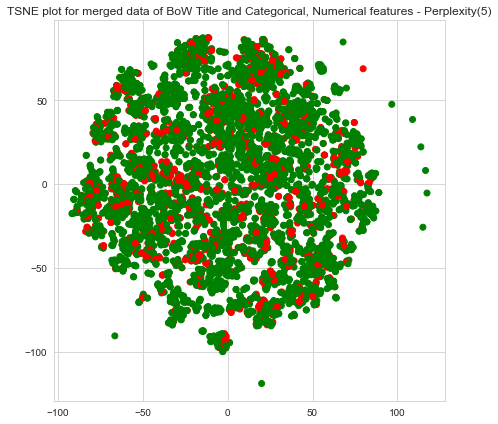

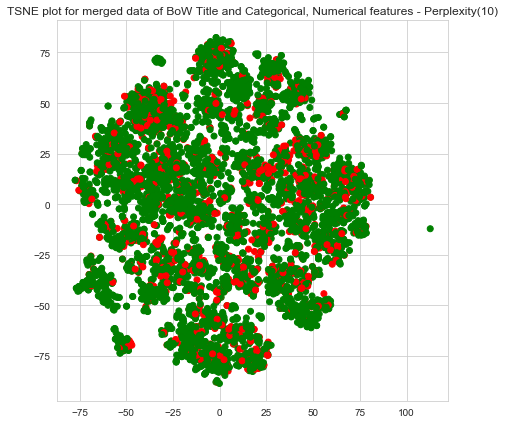

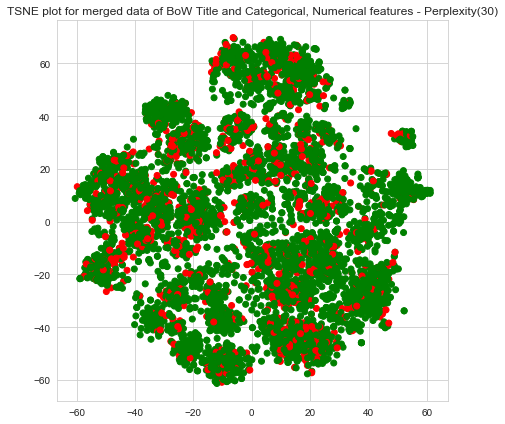

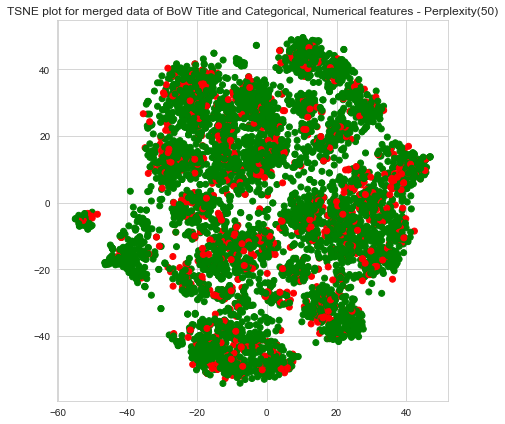

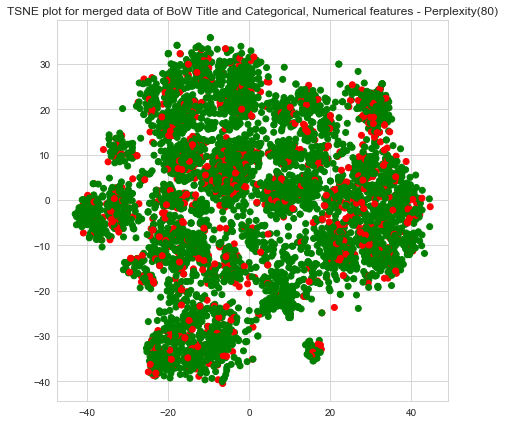

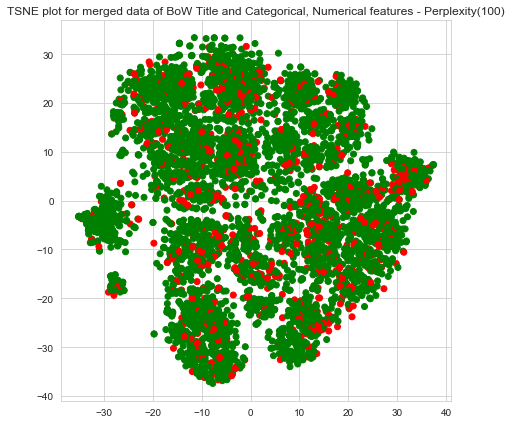

In [244]:
perplexityValues = [5, 10, 30, 50, 80, 100]
for perplexityValue in perplexityValues:
    tsne = TSNE(n_components = 2, perplexity = perplexityValue, learning_rate = 200);
    bowTitleAndOthersEmbedded = tsne.fit_transform(bowTitleAndOthers.toarray());
    bowTitleAndOthersTsneData = np.hstack((bowTitleAndOthersEmbedded, classesDataSub.reshape(-1, 1)));
    bowTitleAndOthersTsneDataFrame = pd.DataFrame(bowTitleAndOthersTsneData, columns = ['Dimension1', 'Dimension2', 'Class']);
    colors = {0.0:'red', 1.0:'green'}
    plt.title("TSNE plot for merged data of BoW Title and Categorical, Numerical features - Perplexity({})".format(perplexityValue));
    plt.scatter(bowTitleAndOthersTsneDataFrame['Dimension1'], bowTitleAndOthersTsneDataFrame['Dimension2'], c = bowTitleAndOthersTsneDataFrame['Class'].apply(lambda x: colors[x]));
    plt.show();

<h4><font color="green">Classification using data merged with Tf-Idf vectorized title and all considered categorical, numerical features</font></h4>

In [245]:
tfIdfTitleAndOthers = hstack((tfIdfTitleModelSub, categoriesVectorsSub, subCategoriesVectorsSub, teacherPrefixVectorsSub, schoolStateVectorsSub, projectGradeVectorsSub, priceStandardizedSub, previouslyPostedStandardizedSub));
tfIdfTitleAndOthers.shape

(6000, 1875)

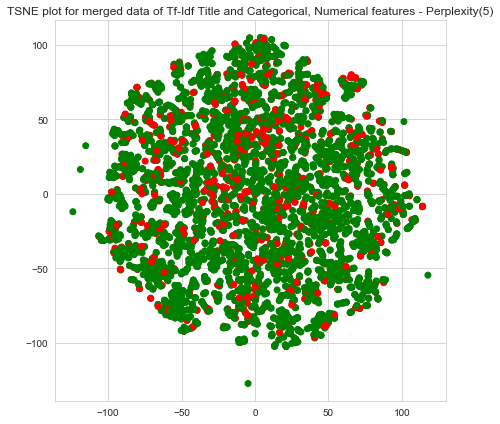

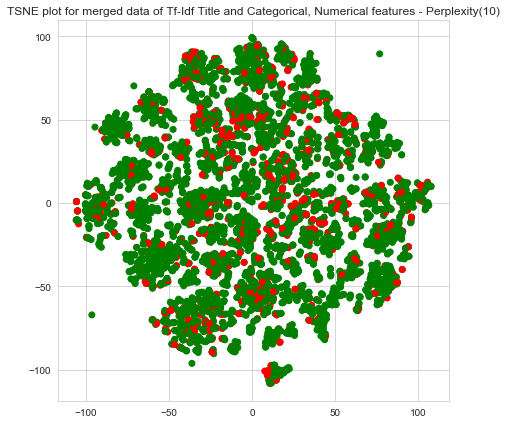

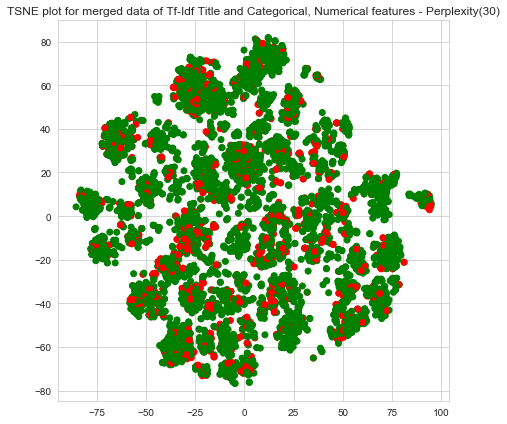

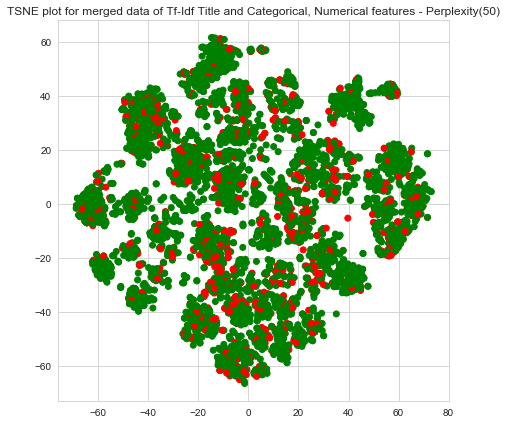

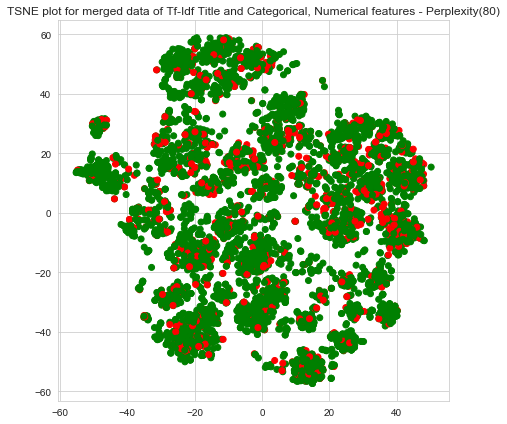

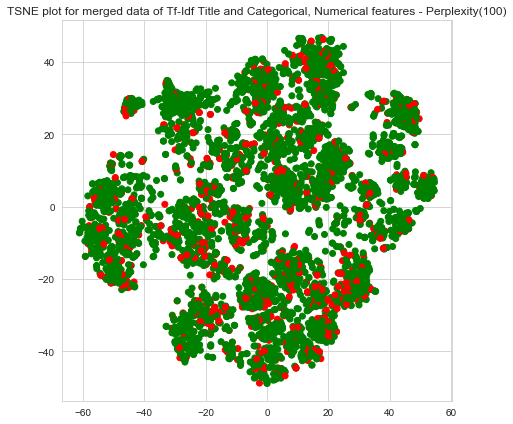

In [246]:
perplexityValues = [5, 10, 30, 50, 80, 100]
for perplexityValue in perplexityValues:
    tsne = TSNE(n_components = 2, perplexity = perplexityValue, learning_rate = 200);
    tfIdfTitleAndOthersEmbedded = tsne.fit_transform(tfIdfTitleAndOthers.toarray());
    tfIdfTitleAndOthersTsneData = np.hstack((tfIdfTitleAndOthersEmbedded, classesDataSub.reshape(-1, 1)));
    tfIdfTitleAndOthersTsneDataFrame = pd.DataFrame(tfIdfTitleAndOthersTsneData, columns = ['Dimension1', 'Dimension2', 'Class']);
    colors = {0.0:'red', 1.0:'green'}
    plt.title("TSNE plot for merged data of Tf-Idf Title and Categorical, Numerical features - Perplexity({})".format(perplexityValue));
    plt.scatter(tfIdfTitleAndOthersTsneDataFrame['Dimension1'], tfIdfTitleAndOthersTsneDataFrame['Dimension2'], c = tfIdfTitleAndOthersTsneDataFrame['Class'].apply(lambda x: colors[x]));
    plt.show();

<h4><font color="green">Classification using data merged with Average Word2Vec vectorized title and all considered categorical, numerical features</font></h4>

In [247]:
word2VecTitleAndOthers = hstack((word2VecTitlesVectorsSub, categoriesVectorsSub, subCategoriesVectorsSub, teacherPrefixVectorsSub, schoolStateVectorsSub, projectGradeVectorsSub, priceStandardizedSub, previouslyPostedStandardizedSub));
word2VecTitleAndOthers.shape

(6000, 401)

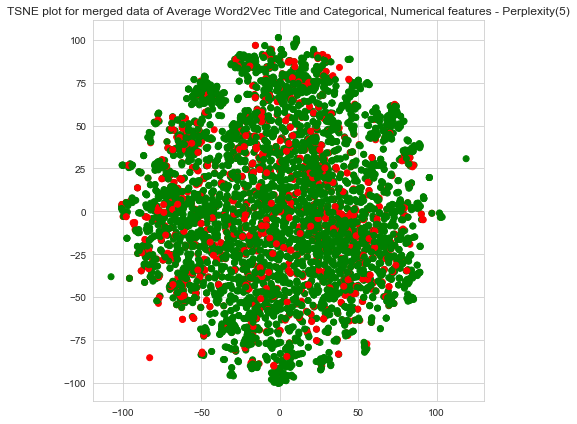

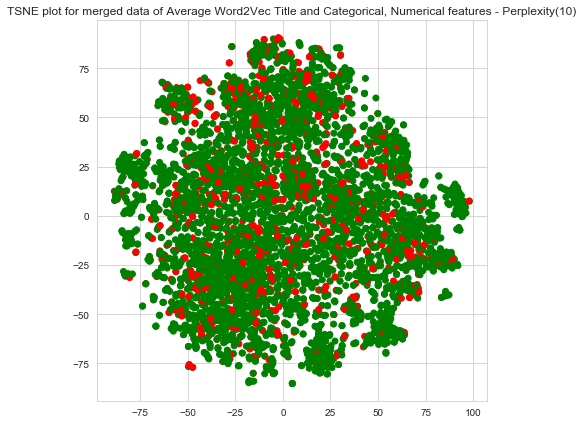

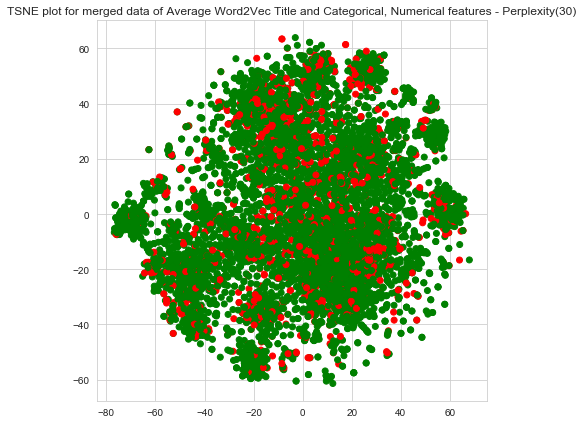

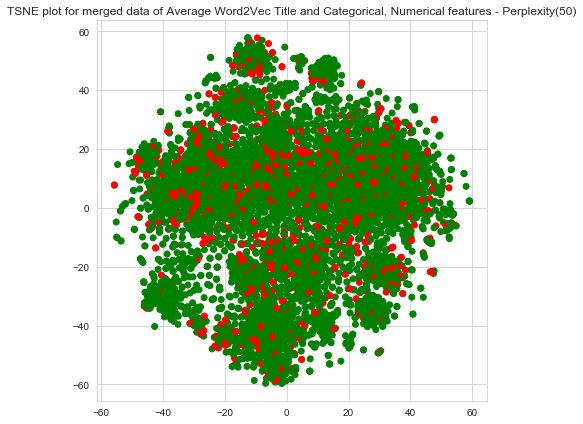

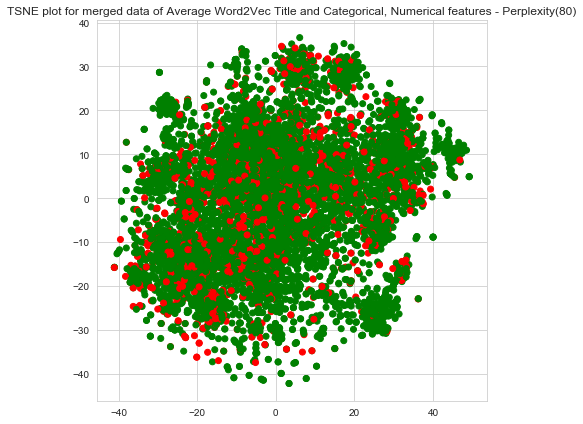

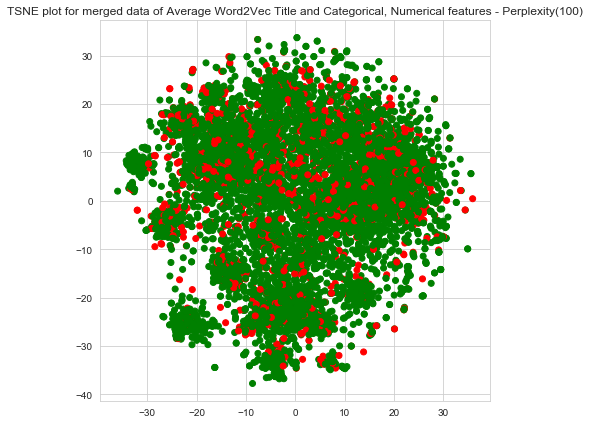

In [248]:
perplexityValues = [5, 10, 30, 50, 80, 100]
for perplexityValue in perplexityValues:
    tsne = TSNE(n_components = 2, perplexity = perplexityValue, learning_rate = 200);
    word2VecTitleAndOthersEmbedded = tsne.fit_transform(word2VecTitleAndOthers.toarray());
    word2VecTitleAndOthersTsneData = np.hstack((word2VecTitleAndOthersEmbedded, classesDataSub.reshape(-1, 1)));
    word2VecTitleAndOthersTsneDataFrame = pd.DataFrame(word2VecTitleAndOthersTsneData, columns = ['Dimension1', 'Dimension2', 'Class']);
    colors = {0.0:'red', 1.0:'green'}
    plt.title("TSNE plot for merged data of Average Word2Vec Title and Categorical, Numerical features - Perplexity({})".format(perplexityValue));
    plt.scatter(word2VecTitleAndOthersTsneDataFrame['Dimension1'], word2VecTitleAndOthersTsneDataFrame['Dimension2'], c = word2VecTitleAndOthersTsneDataFrame['Class'].apply(lambda x: colors[x]));
    plt.show();

<h4><font color="green">Classification using data merged with Tf-idf Weighted Word2Vec vectorized title and all considered categorical, numerical features</font></h4>

In [346]:
tfIdfWeightedWord2VecTitleAndOthers = hstack((tfIdfWeightedWord2VecTitlesVectorsSub, categoriesVectorsSub, subCategoriesVectorsSub, teacherPrefixVectorsSub, schoolStateVectorsSub, projectGradeVectorsSub, priceStandardizedSub, previouslyPostedStandardizedSub));
tfIdfWeightedWord2VecTitleAndOthers.shape

(6000, 401)

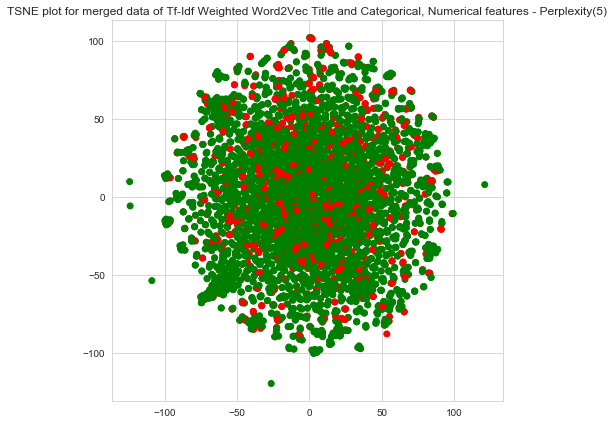

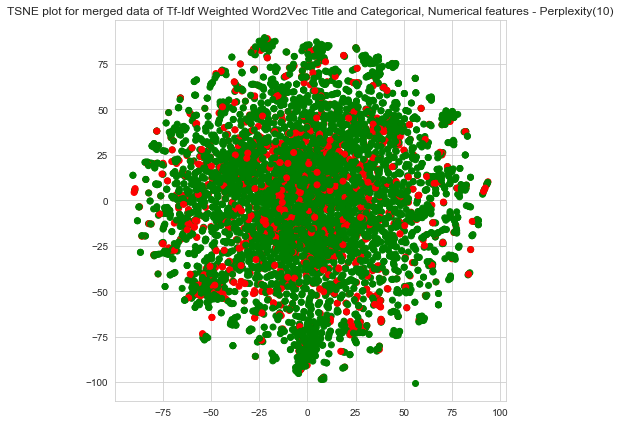

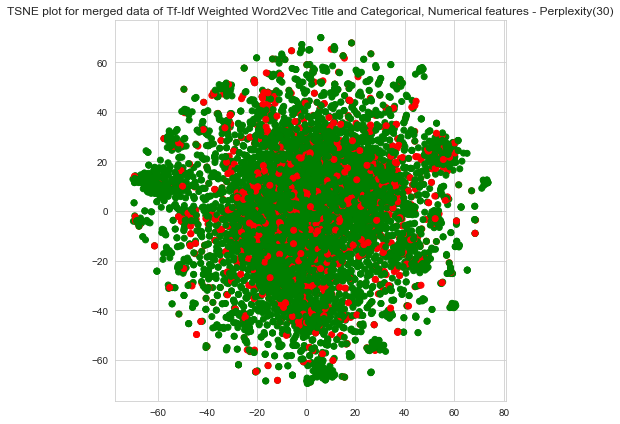

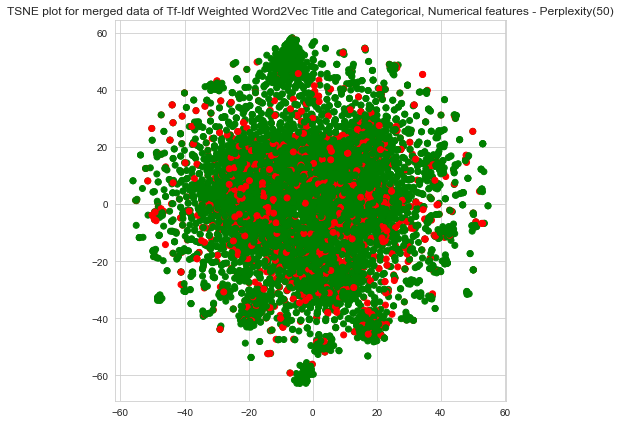

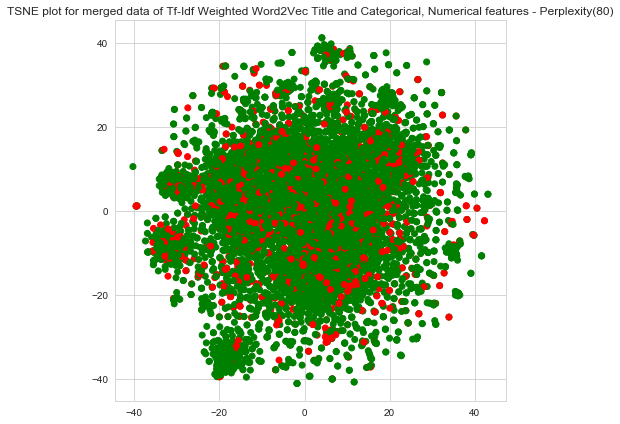

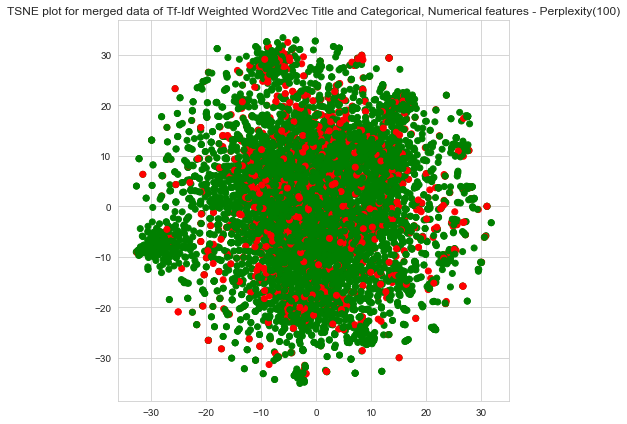

In [347]:
perplexityValues = [5, 10, 30, 50, 80, 100]
for perplexityValue in perplexityValues:
    tsne = TSNE(n_components = 2, perplexity = perplexityValue, learning_rate = 200);
    tfIdfWeightedWord2VecTitleAndOthersEmbedded = tsne.fit_transform(tfIdfWeightedWord2VecTitleAndOthers.toarray());
    tfIdfWeightedWord2VecTitleAndOthersTsneData = np.hstack((tfIdfWeightedWord2VecTitleAndOthersEmbedded, classesDataSub.reshape(-1, 1)));
    tfIdfWeightedWord2VecTitleAndOthersTsneDataFrame = pd.DataFrame(tfIdfWeightedWord2VecTitleAndOthersTsneData, columns = ['Dimension1', 'Dimension2', 'Class']);
    colors = {0.0:'red', 1.0:'green'}
    plt.title("TSNE plot for merged data of Tf-Idf Weighted Word2Vec Title and Categorical, Numerical features - Perplexity({})".format(perplexityValue));
    plt.scatter(tfIdfWeightedWord2VecTitleAndOthersTsneDataFrame['Dimension1'], tfIdfWeightedWord2VecTitleAndOthersTsneDataFrame['Dimension2'], c = tfIdfWeightedWord2VecTitleAndOthersTsneDataFrame['Class'].apply(lambda x: colors[x]));
    plt.show();

<h4><font color="green">Classification using data merged with all vectorizations of project_title and with all considered categorical, numerical features</font></h4>

In [252]:
allFeatures = hstack((bowTitleModelSub, tfIdfTitleModelSub, word2VecTitlesVectorsSub, tfIdfWeightedWord2VecTitlesVectorsSub, categoriesVectorsSub, subCategoriesVectorsSub, teacherPrefixVectorsSub, schoolStateVectorsSub, projectGradeVectorsSub, priceStandardizedSub, previouslyPostedStandardizedSub))
print(allFeatures.shape)

(6000, 4249)


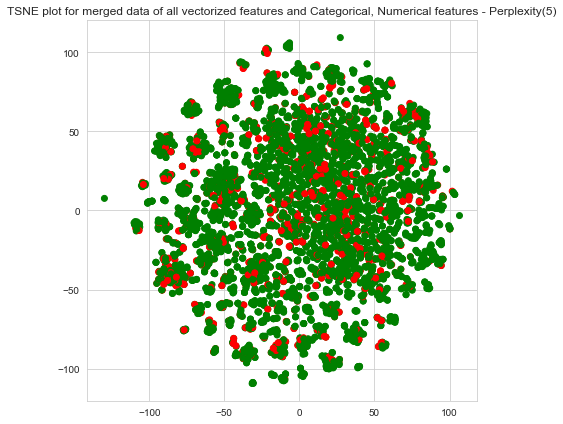

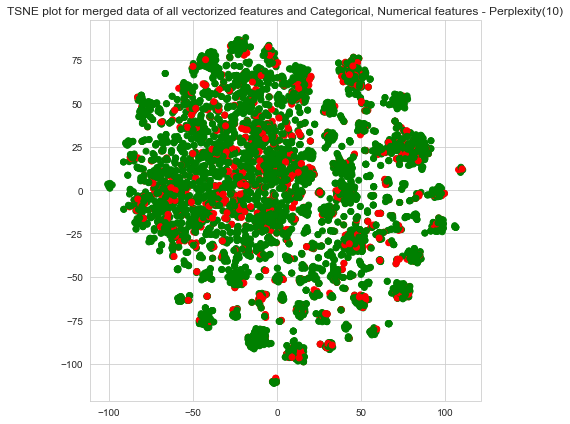

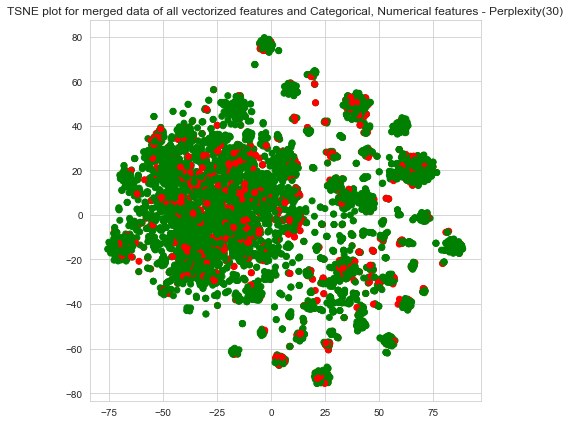

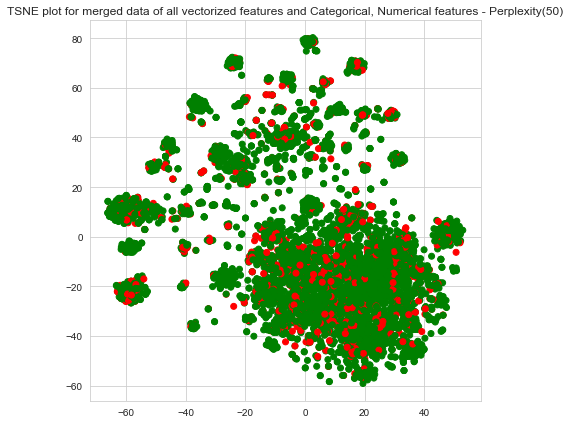

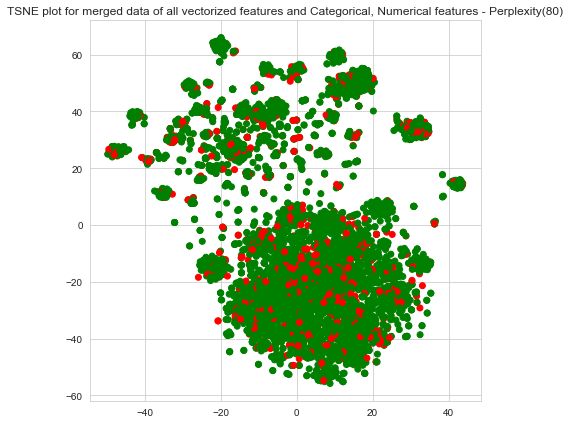

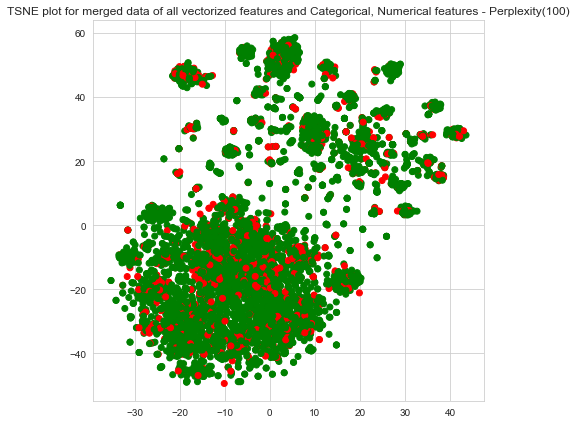

In [253]:
perplexityValues = [5, 10, 30, 50, 80, 100]
for perplexityValue in perplexityValues:
    tsne = TSNE(n_components = 2, perplexity = perplexityValue, learning_rate = 200);
    allFeaturesEmbedded = tsne.fit_transform(allFeatures.toarray());
    allFeaturesTsneData = np.hstack((allFeaturesEmbedded, classesDataSub.reshape(-1, 1)));
    allFeaturesTsneDataFrame = pd.DataFrame(allFeaturesTsneData, columns = ['Dimension1', 'Dimension2', 'Class']);
    colors = {0.0:'red', 1.0:'green'}
    plt.title("TSNE plot for merged data of all vectorized features and Categorical, Numerical features - Perplexity({})".format(perplexityValue));
    plt.scatter(allFeaturesTsneDataFrame['Dimension1'], allFeaturesTsneDataFrame['Dimension2'], c = allFeaturesTsneDataFrame['Class'].apply(lambda x: colors[x]));
    plt.show();

## Conclusion about data visualization using t-sne:
1. Bag of Words, Tf-Idf are better than word2vec vectorizations because of forming some small group of clusters with less overlap of overall data when compared to others.
2. Higher perplexity values seems better in data visualization because of less overlap of data than others.
3. None of the techniques are useful for classification because of huge overlap of data.
4. It is not seperable problem in 2-dimensions but it may be seperable in higher dimensions.

<a id="classification_using_knn"></a>
# Classification & Modelling using K-NN

<a id="classification_using_knn_simple_cross_validation"></a>
<h2><font color="green">Classification using K-NN(Simple Cross Validation)</font></h2>

<h3><font color='blue'>Splitting Data</font></h3>

In [121]:
projectsData = projectsData.dropna(subset = ['teacher_prefix']);
projectsData.shape

(109245, 22)

In [122]:
classesData = projectsData['project_is_approved']
print(classesData.shape)

(109245,)


In [123]:
trainingAndCrossValidateData, testData, classesTrainingAndCrossValidate, classesTest = cross_validation.train_test_split(projectsData[0:10000], classesData[0:10000], test_size =  0.3, random_state = 0);
trainingData, crossValidateData, classesTraining, classesCrossValidate = cross_validation.train_test_split(trainingAndCrossValidateData, classesTrainingAndCrossValidate, test_size =  0.3, random_state = 0);

In [124]:
print("Shapes of splitted data: ");
equalsBorder(70);
print("trainingAndCrossValidateData shape: ", trainingAndCrossValidateData.shape);
print("classesTrainingAndCrossValidate shape: ", classesTrainingAndCrossValidate.shape);
print("testData shape: ", testData.shape);
print("classesTest: ", classesTest.shape);
print("trainingData shape: ", trainingData.shape);
print("classesTraining shape: ", classesTraining.shape);
print("crossValidateData shape: ", crossValidateData.shape);
print("classesCrossValidate shape: ", classesCrossValidate.shape);

Shapes of splitted data: 
trainingAndCrossValidateData shape:  (7000, 22)
classesTrainingAndCrossValidate shape:  (7000,)
testData shape:  (3000, 22)
classesTest:  (3000,)
trainingData shape:  (4900, 22)
classesTraining shape:  (4900,)
crossValidateData shape:  (2100, 22)
classesCrossValidate shape:  (2100,)


In [125]:
print("Number of negative points: ", trainingData[trainingData['project_is_approved'] == 0].shape);
print("Number of positive points: ", trainingData[trainingData['project_is_approved'] == 1].shape);

Number of negative points:  (713, 22)
Number of positive points:  (4187, 22)


<h3><font color="blue">Balancing Data</font></h3>

<h5><font color="red">Note: Instead of displaying whole vectorization process for balanced and imbalanced data, we have simply disabled below cell while performing analysis on imbalanced data and enabled while performing analysis on balanced data </font></h5>

In [ ]:
negativeData = trainingData[trainingData['project_is_approved'] == 0];
positiveData = trainingData[trainingData['project_is_approved'] == 1];
negativeDataBalanced = resample(negativeData, replace = True, n_samples = 8319, random_state = 44);
trainingData = pd.concat([positiveData, negativeDataBalanced]);
trainingData = shuffle(trainingData);
classesTraining = trainingData['project_is_approved'];

## Vectorizing categorical data

### 1. Vectorizing cleaned_categories(project_subject_categories cleaned) - One Hot Encoding

In [127]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_categories
subjectsCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedCategoriesDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_categories values
subjectsCategoriesVectorizer.fit(trainingData['cleaned_categories'].values);
# Vectorizing categories using one-hot-encoding
categoriesVectors = subjectsCategoriesVectorizer.transform(trainingData['cleaned_categories'].values);

In [128]:
print("Features used in vectorizing categories: ");
equalsBorder(70);
print(subjectsCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", categoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(categoriesVectors[0:4])

Features used in vectorizing categories: 
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (12506, 9)
Sample vectors of categories: 
  (0, 8)	1
  (1, 7)	1
  (2, 7)	1
  (2, 8)	1
  (3, 8)	1


### 2. Vectorizing cleaned_sub_categories(project_subject_sub_categories cleaned) - One Hot Encoding

In [129]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_sub_categories
subjectsSubCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedDictionarySubCategories.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_sub_categories values
subjectsSubCategoriesVectorizer.fit(trainingData['cleaned_sub_categories'].values);
# Vectorizing sub categories using one-hot-encoding
subCategoriesVectors = subjectsSubCategoriesVectorizer.transform(trainingData['cleaned_sub_categories'].values);

In [130]:
print("Features used in vectorizing subject sub categories: ");
equalsBorder(70);
print(subjectsSubCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", subCategoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(subCategoriesVectors[0:4])

Features used in vectorizing subject sub categories: 
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (12506, 30)
Sample vectors of categories: 
  (0, 27)	1
  (0, 29)	1
  (1, 28)	1
  (2, 27)	1
  (2, 28)	1
  (3, 29)	1


### 3. Vectorizing teacher_prefix - One Hot Encoding

In [131]:
def giveCounter(data):
    counter = Counter();
    for dataValue in data:
        counter.update(str(dataValue).split());
    return counter

In [132]:
giveCounter(trainingData['teacher_prefix'].values)

Counter({'Mrs.': 6354, 'Teacher': 298, 'Ms.': 4624, 'Mr.': 1230})

In [133]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [134]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:100]);

Features used in vectorizing teacher_prefix: 
['Mrs.', 'Teacher', 'Ms.', 'Mr.']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (12506, 4)
Sample vectors of teacher_prefix: 
  (1, 1)	1
  (4, 1)	1
  (7, 1)	1
  (43, 1)	1


In [135]:
teacherPrefixes = [prefix.replace('.', '') for prefix in trainingData['teacher_prefix'].values];
teacherPrefixes[0:5]

['Mrs', 'Teacher', 'Mrs', 'Ms', 'Teacher']

In [136]:
trainingData['teacher_prefix'] = teacherPrefixes;
trainingData.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
4420      113319  p143796  f519f379c4aa3dde01bcce86203ff61d            Mrs   
953        96493  p064010  9f4d0a39b55f33c15f028736a8f086f1        Teacher   
2307      126229  p178744  47aed895c7f60471962bc271d079e89f            Mrs   

     school_state project_submitted_datetime project_grade_category  \
4420           SC        2017-03-25 10:01:44            Grades 9-12   
953            NE        2017-01-02 18:59:12          Grades PreK-2   
2307           PA        2017-02-11 21:03:00             Grades 3-5   

               project_subject_categories      project_subject_subcategories  \
4420                  Literacy & Language     Literacy, Literature & Writing   
953                        Math & Science                        Mathematics   
2307  Literacy & Language, Math & Science  Literature & Writing, Mathematics   

                                  project_title   ...    project_essay_3  \
4420  Listen Up: Audio Supplies to Help Us Read   ...                NaN   
953          Everyday Counts Especially in Math   ...                NaN   
2307        Organization and Reuse of Materials   ...                NaN   

     project_essay_4                           project_resource_summary  \
4420             NaN  My students need an mp3 player, a headphone sp...   
953              NaN  My students need Everyday Counts Calendar Math...   
2307             NaN  My students need a place to turn in completed ...   

     teacher_number_of_previously_posted_projects project_is_approved  \
4420                                           10                   0   
953                                             1                   0   
2307                                            1                   1   

                   cleaned_categories           cleaned_sub_categories  \
4420               Literacy_Language      Literacy Literature_Writing    
953                     Math_Science                      Mathematics    
2307  Literacy_Language Math_Science   Literature_Writing Mathematics    

                                          project_essay   price quantity  
4420  My students range from 9th through 12th grade,...   74.41        8  
953   My school is a low income school. Every studen...  304.70        1  
2307  The students that I teach at my school are stu...  363.84       17  

[3 rows x 22 columns]

In [137]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [138]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:4]);

Features used in vectorizing teacher_prefix: 
['Mrs', 'Teacher', 'Ms', 'Mr']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (12506, 4)
Sample vectors of teacher_prefix: 
  (0, 0)	1
  (1, 1)	1
  (2, 0)	1
  (3, 2)	1


### 4. Vectorizing school_state - One Hot Encoding

In [139]:
schoolStateDictionary = dict(giveCounter(trainingData['school_state'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique school states
schoolStateVectorizer = CountVectorizer(vocabulary = list(schoolStateDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with school_state values
schoolStateVectorizer.fit(trainingData['school_state'].values);
# Vectorizing school_state using one-hot-encoding
schoolStateVectors = schoolStateVectorizer.transform(trainingData['school_state'].values);

In [140]:
print("Features used in vectorizing school_state: ");
equalsBorder(70);
print(schoolStateVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", schoolStateVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(schoolStateVectors[0:4]);

Features used in vectorizing school_state: 
['SC', 'NE', 'PA', 'FL', 'TX', 'CA', 'NY', 'IL', 'UT', 'MI', 'GA', 'MO', 'AZ', 'LA', 'TN', 'CO', 'NV', 'NC', 'OR', 'WI', 'VA', 'OH', 'CT', 'MA', 'NJ', 'DE', 'AL', 'IN', 'MS', 'DC', 'KY', 'OK', 'NM', 'MT', 'IA', 'HI', 'NH', 'MN', 'SD', 'KS', 'ME', 'MD', 'RI', 'AR', 'WA', 'AK', 'ND', 'WV', 'ID', 'WY', 'VT']
Shape of school_state matrix after vectorization(one-hot-encoding):  (12506, 51)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1


### 5. Vectorizing project_grade_category - One Hot Encoding

In [141]:
giveCounter(trainingData['project_grade_category'])

Counter({'Grades': 12506,
         '9-12': 1241,
         'PreK-2': 5165,
         '3-5': 4083,
         '6-8': 2017})

In [142]:
cleanedGrades = []
for grade in trainingData['project_grade_category'].values:
    grade = grade.replace(' ', '');
    grade = grade.replace('-', 'to');
    cleanedGrades.append(grade);
cleanedGrades[0:4]

['Grades9to12', 'GradesPreKto2', 'Grades3to5', 'GradesPreKto2']

In [143]:
trainingData['project_grade_category'] = cleanedGrades
trainingData.head(4)

Unnamed: 0       id                        teacher_id teacher_prefix  \
4420      113319  p143796  f519f379c4aa3dde01bcce86203ff61d            Mrs   
953        96493  p064010  9f4d0a39b55f33c15f028736a8f086f1        Teacher   
2307      126229  p178744  47aed895c7f60471962bc271d079e89f            Mrs   
6076      144766  p151022  814440f0a77c50e525786ce009c34e19             Ms   

     school_state project_submitted_datetime project_grade_category  \
4420           SC        2017-03-25 10:01:44            Grades9to12   
953            NE        2017-01-02 18:59:12          GradesPreKto2   
2307           PA        2017-02-11 21:03:00             Grades3to5   
6076           FL        2016-05-31 22:48:41          GradesPreKto2   

               project_subject_categories      project_subject_subcategories  \
4420                  Literacy & Language     Literacy, Literature & Writing   
953                        Math & Science                        Mathematics   
2307  Literacy & Language, Math & Science  Literature & Writing, Mathematics   
6076                  Literacy & Language                           Literacy   

                                          project_title   ...     \
4420          Listen Up: Audio Supplies to Help Us Read   ...      
953                  Everyday Counts Especially in Math   ...      
2307                Organization and Reuse of Materials   ...      
6076  Rockin' Reading Readiness in Ms. Rodgers' Neig...   ...      

     project_essay_3 project_essay_4  \
4420             NaN             NaN   
953              NaN             NaN   
2307             NaN             NaN   
6076             NaN             NaN   

                               project_resource_summary  \
4420  My students need an mp3 player, a headphone sp...   
953   My students need Everyday Counts Calendar Math...   
2307  My students need a place to turn in completed ...   
6076  My students need materials to help enhance and...   

     teacher_number_of_previously_posted_projects project_is_approved  \
4420                                           10                   0   
953                                             1                   0   
2307                                            1                   1   
6076                                            0                   0   

                   cleaned_categories           cleaned_sub_categories  \
4420               Literacy_Language      Literacy Literature_Writing    
953                     Math_Science                      Mathematics    
2307  Literacy_Language Math_Science   Literature_Writing Mathematics    
6076               Literacy_Language                         Literacy    

                                          project_essay   price quantity  
4420  My students range from 9th through 12th grade,...   74.41        8  
953   My school is a low income school. Every studen...  304.70        1  
2307  The students that I teach at my school are stu...  363.84       17  
6076  Although many of the students deal with hardsh...  251.84       34  

[4 rows x 22 columns]

In [144]:
projectGradeDictionary = dict(giveCounter(trainingData['project_grade_category'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique project grade categories
projectGradeVectorizer = CountVectorizer(vocabulary = list(projectGradeDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with project_grade_category values
projectGradeVectorizer.fit(trainingData['project_grade_category'].values);
# Vectorizing project_grade_category using one-hot-encoding
projectGradeVectors = projectGradeVectorizer.transform(trainingData['project_grade_category'].values);

In [145]:
print("Features used in vectorizing project_grade_category: ");
equalsBorder(70);
print(projectGradeVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", projectGradeVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(projectGradeVectors[0:4]);

Features used in vectorizing project_grade_category: 
['Grades9to12', 'GradesPreKto2', 'Grades3to5', 'Grades6to8']
Shape of school_state matrix after vectorization(one-hot-encoding):  (12506, 4)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 1)	1


In [146]:
preProcessedEssaysWithStopWords, preProcessedEssaysWithoutStopWords = preProcessingWithAndWithoutStopWords(trainingData['project_essay']);
preProcessedProjectTitlesWithStopWords, preProcessedProjectTitlesWithoutStopWords = preProcessingWithAndWithoutStopWords(trainingData['project_title']);

<h4><a id="vectorizing_features"></a></h4>
## Vectorizing Text Data

### Bag of Words

#### 1. Vectorizing project_essay

In [147]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project essays
bowEssayVectorizer = CountVectorizer(min_df = 10);
# Transforming the preprocessed essays to bag of words vectors
bowEssayModel = bowEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWords);

In [148]:
print("Some of the Features used in vectorizing preprocessed essays: ");
equalsBorder(70);
print(bowEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed essay matrix after vectorization: ", bowEssayModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed essay: ");
equalsBorder(70);
print(bowEssayModel[0])

Some of the Features used in vectorizing preprocessed essays: 
['wrong', 'wrote', 'www', 'xtramath', 'yale', 'yard', 'year', 'yearly', 'yearn', 'yearning', 'years', 'yelled', 'yelling', 'yellow', 'yemen', 'yes', 'yet', 'yields', 'yikes', 'yoga', 'york', 'young', 'younger', 'youngest', 'yousafzai', 'youth', 'youthful', 'youtube', 'zaretta', 'zeal', 'zen', 'zentangle', 'zero', 'zip', 'ziploc', 'zipping', 'zone', 'zoo', 'zoology', 'zoos']
Shape of preprocessed essay matrix after vectorization:  (12506, 7148)
Sample bag-of-words vector of preprocessed essay: 
  (0, 4260)	1
  (0, 6366)	1
  (0, 533)	1
  (0, 2640)	1
  (0, 6092)	1
  (0, 1182)	1
  (0, 6514)	1
  (0, 807)	1
  (0, 2934)	1
  (0, 347)	1
  (0, 518)	1
  (0, 5404)	1
  (0, 5860)	1
  (0, 3824)	1
  (0, 6297)	1
  (0, 3277)	1
  (0, 4259)	1
  (0, 6887)	1
  (0, 4319)	1
  (0, 5031)	1
  (0, 1504)	1
  (0, 579)	1
  (0, 3151)	1
  (0, 4369)	1
  (0, 3684)	1
  :	:
  (0, 1776)	1
  (0, 2314)	1
  (0, 2995)	1
  (0, 7068)	1
  (0, 3147)	1
  (0, 3296)	1
  (

#### 2. Vectorizing project_title

In [149]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project titles
bowTitleVectorizer = CountVectorizer(min_df = 10);
# Transforming the preprocessed project titles to bag of words vectors
bowTitleModel = bowTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWords);

In [150]:
print("Some of the Features used in vectorizing preprocessed titles: ");
equalsBorder(70);
print(bowTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after vectorization: ", bowTitleModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed title: ");
equalsBorder(70);
print(bowTitleModel[0])

Some of the Features used in vectorizing preprocessed titles: 
['week', 'weekly', 'weighty', 'welcoming', 'whole', 'wi', 'width', 'wiggle', 'wiggles', 'wiggly', 'win', 'winner', 'winter', 'wish', 'without', 'wizards', 'wo', 'wobble', 'wobbling', 'wonderful', 'woodwinds', 'word', 'words', 'work', 'working', 'workshop', 'world', 'worms', 'would', 'write', 'writer', 'writers', 'writing', 'year', 'yes', 'yoga', 'yogi', 'young', 'zen', 'zone']
Shape of preprocessed title matrix after vectorization:  (12506, 987)
Sample bag-of-words vector of preprocessed title: 
  (0, 725)	1
  (0, 928)	1
  (0, 423)	1
  (0, 863)	1
  (0, 61)	1
  (0, 527)	1


### Tf-Idf Vectorization

#### 1. Vectorizing project_essay

In [151]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project essays
tfIdfEssayVectorizer = TfidfVectorizer(min_df = 10);
# Transforming the preprocessed project essays to tf-idf vectors
tfIdfEssayModel = tfIdfEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWords);

In [152]:
print("Some of the Features used in tf-idf vectorizing preprocessed essays: ");
equalsBorder(70);
print(tfIdfEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfEssayModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed essay: ");
equalsBorder(70);
print(tfIdfEssayModel[0])

Some of the Features used in tf-idf vectorizing preprocessed essays: 
['wrong', 'wrote', 'www', 'xtramath', 'yale', 'yard', 'year', 'yearly', 'yearn', 'yearning', 'years', 'yelled', 'yelling', 'yellow', 'yemen', 'yes', 'yet', 'yields', 'yikes', 'yoga', 'york', 'young', 'younger', 'youngest', 'yousafzai', 'youth', 'youthful', 'youtube', 'zaretta', 'zeal', 'zen', 'zentangle', 'zero', 'zip', 'ziploc', 'zipping', 'zone', 'zoo', 'zoology', 'zoos']
Shape of preprocessed title matrix after tf-idf vectorization:  (12506, 7148)
Sample Tf-Idf vector of preprocessed essay: 
  (0, 6189)	0.20651330549908437
  (0, 5150)	0.07231195951563689
  (0, 137)	0.1293328601650488
  (0, 12)	0.1207988522691422
  (0, 2882)	0.044418826049789424
  (0, 3960)	0.06674139889078706
  (0, 5989)	0.05463438854840181
  (0, 4294)	0.04865939188625093
  (0, 3731)	0.05637831290932271
  (0, 1861)	0.0750502257384875
  (0, 704)	0.08341183604072445
  (0, 1894)	0.11219533848131488
  (0, 3807)	0.06941029374022084
  (0, 2206)	0.117066

#### 2. Vectorizing project_title

In [153]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project titles
tfIdfTitleVectorizer = TfidfVectorizer(min_df = 10);
# Transforming the preprocessed project titles to tf-idf vectors
tfIdfTitleModel = tfIdfTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWords);

In [154]:
print("Some of the Features used in tf-idf vectorizing preprocessed titles: ");
equalsBorder(70);
print(tfIdfTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfTitleModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed title: ");
equalsBorder(70);
print(tfIdfTitleModel[0])

Some of the Features used in tf-idf vectorizing preprocessed titles: 
['week', 'weekly', 'weighty', 'welcoming', 'whole', 'wi', 'width', 'wiggle', 'wiggles', 'wiggly', 'win', 'winner', 'winter', 'wish', 'without', 'wizards', 'wo', 'wobble', 'wobbling', 'wonderful', 'woodwinds', 'word', 'words', 'work', 'working', 'workshop', 'world', 'worms', 'would', 'write', 'writer', 'writers', 'writing', 'year', 'yes', 'yoga', 'yogi', 'young', 'zen', 'zone']
Shape of preprocessed title matrix after tf-idf vectorization:  (12506, 987)
Sample Tf-Idf vector of preprocessed title: 
  (0, 527)	0.4906866543285391
  (0, 61)	0.5603866308062844
  (0, 863)	0.32395969284155895
  (0, 423)	0.3206129261043845
  (0, 928)	0.3403650899243185
  (0, 725)	0.3487155084980362


### Average Word2Vector Vectorization

In [155]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# We should have glove_vectors file for creating below model
with open('glove_vectors', 'rb') as f:
    gloveModel = pickle.load(f)
    gloveWords =  set(gloveModel.keys())

In [156]:
print("Glove vector of sample word: ");
equalsBorder(70);
print(gloveModel['technology']);
equalsBorder(70);
print("Shape of glove vector: ", gloveModel['technology'].shape);

Glove vector of sample word: 
[-0.26078   -0.36898   -0.022831   0.21666    0.16672   -0.20268
 -3.1219     0.33057    0.71512    0.28874    0.074368  -0.033203
  0.23783    0.21052    0.076562   0.13007   -0.31706   -0.45888
 -0.45463   -0.13191    0.49761    0.072704   0.16811    0.18846
 -0.16688   -0.21973    0.08575   -0.19577   -0.2101    -0.32436
 -0.56336    0.077996  -0.22758   -0.66569    0.14824    0.038945
  0.50881   -0.1352     0.49966   -0.4401    -0.022335  -0.22744
  0.22086    0.21865    0.36647    0.30495   -0.16565    0.038759
  0.28108   -0.2167     0.12453    0.65401    0.34584   -0.2557
 -0.046363  -0.31111   -0.020936  -0.17122   -0.77114    0.29289
 -0.14625    0.39541   -0.078938   0.051127   0.15076    0.085126
  0.183     -0.06755    0.26312    0.0087276  0.0066415  0.37033
  0.03496   -0.12627   -0.052626  -0.34897    0.14672    0.14799
 -0.21821   -0.042785   0.2661    -1.1105     0.31789    0.27278
  0.054468  -0.27458    0.42732   -0.44101   -0.19302   -

In [157]:
def getWord2VecVectors(texts):
    word2VecTextsVectors = [];
    for preProcessedText in tqdm(texts):
        word2VecTextVector = np.zeros(300);
        numberOfWordsInText = 0;
        for word in preProcessedText.split():
            if word in gloveWords:
                word2VecTextVector += gloveModel[word];
                numberOfWordsInText += 1;
        if numberOfWordsInText != 0:
            word2VecTextVector = word2VecTextVector / numberOfWordsInText;
        word2VecTextsVectors.append(word2VecTextVector);
    return word2VecTextsVectors;

#### 1. Vectorizing project_essay

In [158]:
word2VecEssaysVectors = getWord2VecVectors(preProcessedEssaysWithoutStopWords);

In [159]:
print("Shape of Word2Vec vectorization matrix of essays: {},{}".format(len(word2VecEssaysVectors), len(word2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample essay: ");
equalsBorder(70);
print(word2VecEssaysVectors[0]);

Shape of Word2Vec vectorization matrix of essays: 12506,300
Sample essay: 
students range 9th 12th grade many special needs learning disabilities behavior disorders limited english proficiency large percentage students come low income households work hard everything despite difficulties dedicated students strive help esol students created clothes closet student council organized school supply drives school neighboring schools pulled together raise money fellow students serious illnesses inspire sense community often teens today refuse read anything longer text message books reading level uninteresting books might interesting difficult give many high school students listen higher comprehension level read particularly true students learning difficulties students whose primary language not english however audio books help students correctly pronouncing new vocabulary difficult names improving sustained listening skills resources asked allow group students listen book time class help stay 

#### 2. Vectorizing project_title

In [160]:
word2VecTitlesVectors = getWord2VecVectors(preProcessedProjectTitlesWithoutStopWords);

In [161]:
print("Shape of Word2Vec vectorization matrix of project titles: {}, {}".format(len(word2VecTitlesVectors), len(word2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample title: ");
equalsBorder(70);
print(word2VecTitlesVectors[0]);

Shape of Word2Vec vectorization matrix of project titles: 12506, 300
Sample title: 
listen audio supplies help us read
Word2Vec vector of sample title: 
[ 7.98570667e-02 -4.65450000e-02 -3.76171667e-02 -7.31983333e-02
  1.11857500e-01  1.44636167e-01 -3.26398333e+00 -2.32417500e-01
  8.63553333e-02  3.44450000e-03 -1.30397667e-01 -7.60791667e-02
  2.42820000e-02  5.66993333e-02 -1.24239167e-01  2.62551667e-01
 -7.20953333e-02 -1.01589050e-01  1.92389000e-01  4.93213333e-02
  1.41266667e-01  2.00892667e-01 -1.63388333e-02 -4.48531667e-02
 -1.38146833e-01 -2.31317833e-01  9.67265000e-02  6.29203333e-02
 -2.25269333e-02 -1.51104083e-01 -5.20228333e-02  1.78300000e-02
  3.90050000e-02  2.83352167e-01  4.01120333e-02 -2.18770000e-02
  5.13500000e-02 -1.72878167e-01  1.05205000e-02 -2.64521667e-02
 -7.22511667e-02  1.53466667e-01 -5.56799667e-01  3.96451833e-02
 -5.38655000e-02  1.59274333e-01 -1.62432667e-01  1.51413667e-01
 -4.24883667e-02 -2.93152667e-01 -2.31540500e-01 -2.34066333e-01
 -

### Tf-Idf Weighted Word2Vec Vectorization

#### 1. Vectorizing project_essay

In [162]:
# Initializing tfidf vectorizer
tfIdfEssayTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed essays using tfidf vectorizer initialized above 
tfIdfEssayTempVectorizer.fit(preProcessedEssaysWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfEssayDictionary = dict(zip(tfIdfEssayTempVectorizer.get_feature_names(), list(tfIdfEssayTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfEssayWords = set(tfIdfEssayTempVectorizer.get_feature_names());

In [163]:
# Creating list to save tf-idf weighted vectors of essays
tfIdfWeightedWord2VecEssaysVectors = [];
# Iterating over each essay
for essay in tqdm(preProcessedEssaysWithoutStopWords):
    # Sum of tf-idf values of all words in a particular essay
    cumulativeSumTfIdfWeightOfEssay = 0;
    # Tf-Idf weighted word2vec vector of a particular essay
    tfIdfWeightedWord2VecEssayVector = np.zeros(300);
    # Splitting essay into list of words
    splittedEssay = essay.split();
    # Iterating over each word
    for word in splittedEssay:
        # Checking if word is in glove words and set of words used by tfIdf essay vectorizer
        if (word in gloveWords) and (word in tfIdfEssayWords):
            # Tf-Idf value of particular word in essay
            tfIdfValueWord = tfIdfEssayDictionary[word] * (essay.count(word) / len(splittedEssay));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecEssayVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfEssay += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfEssay != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecEssayVector = tfIdfWeightedWord2VecEssayVector / cumulativeSumTfIdfWeightOfEssay;
    # Appending the above calculated tf-idf weighted vector of particular essay to list of vectors of essays
    tfIdfWeightedWord2VecEssaysVectors.append(tfIdfWeightedWord2VecEssayVector);

In [164]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: {}, {}".format(len(tfIdfWeightedWord2VecEssaysVectors), len(tfIdfWeightedWord2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample Essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample essay: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecEssaysVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: 12506, 300
Sample Essay: 
students range 9th 12th grade many special needs learning disabilities behavior disorders limited english proficiency large percentage students come low income households work hard everything despite difficulties dedicated students strive help esol students created clothes closet student council organized school supply drives school neighboring schools pulled together raise money fellow students serious illnesses inspire sense community often teens today refuse read anything longer text message books reading level uninteresting books might interesting difficult give many high school students listen higher comprehension level read particularly true students learning difficulties students whose primary language not english however audio books help students correctly pronouncing new vocabulary difficult names improving sustained listening skills resources asked allow group students listen b

#### 2. Vectorizing project_title

In [165]:
# Initializing tfidf vectorizer
tfIdfTitleTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed titles using tfidf vectorizer initialized above 
tfIdfTitleTempVectorizer.fit(preProcessedProjectTitlesWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfTitleDictionary = dict(zip(tfIdfTitleTempVectorizer.get_feature_names(), list(tfIdfTitleTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfTitleWords = set(tfIdfTitleTempVectorizer.get_feature_names());

In [166]:
# Creating list to save tf-idf weighted vectors of project titles
tfIdfWeightedWord2VecTitlesVectors = [];
# Iterating over each title
for title in tqdm(preProcessedProjectTitlesWithoutStopWords):
    # Sum of tf-idf values of all words in a particular project title
    cumulativeSumTfIdfWeightOfTitle = 0;
    # Tf-Idf weighted word2vec vector of a particular project title
    tfIdfWeightedWord2VecTitleVector = np.zeros(300);
    # Splitting title into list of words
    splittedTitle = title.split();
    # Iterating over each word
    for word in splittedTitle:
        # Checking if word is in glove words and set of words used by tfIdf title vectorizer
        if (word in gloveWords) and (word in tfIdfTitleWords):
            # Tf-Idf value of particular word in title
            tfIdfValueWord = tfIdfTitleDictionary[word] * (title.count(word) / len(splittedTitle));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecTitleVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfTitle += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfTitle != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecTitleVector = tfIdfWeightedWord2VecTitleVector / cumulativeSumTfIdfWeightOfTitle;
    # Appending the above calculated tf-idf weighted vector of particular title to list of vectors of project titles
    tfIdfWeightedWord2VecTitlesVectors.append(tfIdfWeightedWord2VecTitleVector);

In [167]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: {}, {}".format(len(tfIdfWeightedWord2VecTitlesVectors), len(tfIdfWeightedWord2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample Title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample title: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecTitlesVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: 12506, 300
Sample Title: 
listen audio supplies help us read
Tf-Idf Weighted Word2Vec vector of sample title: 
[ 1.13681123e-01 -8.79667892e-02 -8.49680130e-02 -1.43604791e-02
  4.79478932e-02  1.35679761e-01 -3.21729604e+00 -2.19263883e-01
  9.20123892e-02 -1.81425987e-02 -8.51087335e-02 -8.38436422e-02
  1.30997300e-02  9.17590277e-02 -6.32389192e-02  2.78042755e-01
 -5.20654011e-02 -1.20769711e-01  2.10761397e-01  2.81098281e-02
  2.02254504e-01  2.26544882e-01  4.09948048e-02 -8.12726833e-02
 -1.47351385e-01 -2.46545553e-01  8.92049155e-02  1.17334499e-01
 -6.46631618e-02 -1.27686666e-01  6.40473188e-02  6.87940754e-02
 -9.98935534e-03  3.05227995e-01  2.82769186e-02  1.94452742e-02
  1.47647031e-01 -1.19005403e-01  2.25482358e-02  3.28239026e-03
 -1.00593813e-01  1.74006690e-01 -6.61577520e-01  3.03362895e-02
 -4.57622742e-02  1.95725136e-01 -1.80496637e-01  1.85440399e-01
 -7.24327807e-02 -2.96402438e-01 -2

### Vectorizing numerical features

#### 1. Vectorizing price

In [168]:
# Standardizing the price data using StandardScaler(Uses mean and std for standardization)
priceScaler = StandardScaler();
priceScaler.fit(trainingData['price'].values.reshape(-1, 1));
priceStandardized = priceScaler.transform(trainingData['price'].values.reshape(-1, 1));

In [169]:
print("Shape of standardized matrix of prices: ", priceStandardized.shape);
equalsBorder(70);
print("Sample original prices: ");
equalsBorder(70);
print(trainingData['price'].values[0:5]);
print("Sample standardized prices: ");
equalsBorder(70);
print(priceStandardized[0:5]);

Shape of standardized matrix of prices:  (12506, 1)
Sample original prices: 
[ 74.41 304.7  363.84 251.84 792.92]
Sample standardized prices: 
[[-0.70727539]
 [-0.05510812]
 [ 0.11237276]
 [-0.20480442]
 [ 1.32750121]]


#### 2. Vectorizing quantity

In [170]:
# Standardizing the quantity data using StandardScaler(Uses mean and std for standardization)
quantityScaler = StandardScaler();
quantityScaler.fit(trainingData['quantity'].values.reshape(-1, 1));
quantityStandardized = quantityScaler.transform(trainingData['quantity'].values.reshape(-1, 1));

In [171]:
print("Shape of standardized matrix of quantities: ", quantityStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(trainingData['quantity'].values[0:5]);
print("Sample standardized quantities: ");
equalsBorder(70);
print(quantityStandardized[0:5]);

Shape of standardized matrix of quantities:  (12506, 1)
Sample original quantities: 
[ 8  1 17 34 42]
Sample standardized quantities: 
[[-0.37621124]
 [-0.61673036]
 [-0.06697236]
 [ 0.51714552]
 [ 0.79202452]]


#### 3. Vectorizing teacher_number_of_previously_posted_projects

In [172]:
# Standardizing the teacher_number_of_previously_posted_projects data using StandardScaler(Uses mean and std for standardization)
previouslyPostedScaler = StandardScaler();
previouslyPostedScaler.fit(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));
previouslyPostedStandardized = previouslyPostedScaler.transform(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

In [173]:
print("Shape of standardized matrix of teacher_number_of_previously_posted_projects: ", previouslyPostedStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(trainingData['teacher_number_of_previously_posted_projects'].values[0:5]);
print("Sample standardized teacher_number_of_previously_posted_projects: ");
equalsBorder(70);
print(previouslyPostedStandardized[0:5]);

Shape of standardized matrix of teacher_number_of_previously_posted_projects:  (12506, 1)
Sample original quantities: 
[10  1  1  0  0]
Sample standardized teacher_number_of_previously_posted_projects: 
[[ 0.07504662]
 [-0.34626102]
 [-0.34626102]
 [-0.39307298]
 [-0.39307298]]


In [174]:
numberOfPoints = 16638;
# Categorical data
categoriesVectorsSub = categoriesVectors[0:numberOfPoints];
subCategoriesVectorsSub = subCategoriesVectors[0:numberOfPoints];
teacherPrefixVectorsSub = teacherPrefixVectors[0:numberOfPoints];
schoolStateVectorsSub = schoolStateVectors[0:numberOfPoints];
projectGradeVectorsSub = projectGradeVectors[0:numberOfPoints];

# Text data
bowEssayModelSub = bowEssayModel[0:numberOfPoints];
bowTitleModelSub = bowTitleModel[0:numberOfPoints];
tfIdfEssayModelSub = tfIdfEssayModel[0:numberOfPoints];
tfIdfTitleModelSub = tfIdfTitleModel[0:numberOfPoints];
word2VecEssaysVectorsSub = word2VecEssaysVectors[0:numberOfPoints];
word2VecTitlesVectorsSub = word2VecTitlesVectors[0:numberOfPoints];
tfIdfWeightedWord2VecEssaysVectorsSub = tfIdfWeightedWord2VecEssaysVectors[0:numberOfPoints];
tfIdfWeightedWord2VecTitlesVectorsSub = tfIdfWeightedWord2VecTitlesVectors[0:numberOfPoints];

# Numerical data
priceStandardizedSub = priceStandardized[0:numberOfPoints];
quantityStandardizedSub = quantityStandardized[0:numberOfPoints];
previouslyPostedStandardizedSub = previouslyPostedStandardized[0:numberOfPoints];

In [175]:
def getAvgTfIdfEssayVectors(arrayOfTexts):
    # Creating list to save tf-idf weighted vectors of essays
    tfIdfWeightedWord2VecEssaysVectors = [];
    # Iterating over each essay
    for essay in tqdm(arrayOfTexts):
        # Sum of tf-idf values of all words in a particular essay
        cumulativeSumTfIdfWeightOfEssay = 0;
        # Tf-Idf weighted word2vec vector of a particular essay
        tfIdfWeightedWord2VecEssayVector = np.zeros(300);
        # Splitting essay into list of words
        splittedEssay = essay.split();
        # Iterating over each word
        for word in splittedEssay:
            # Checking if word is in glove words and set of words used by tfIdf essay vectorizer
            if (word in gloveWords) and (word in tfIdfEssayWords):
                # Tf-Idf value of particular word in essay
                tfIdfValueWord = tfIdfEssayDictionary[word] * (essay.count(word) / len(splittedEssay));
                # Making tf-idf weighted word2vec
                tfIdfWeightedWord2VecEssayVector += tfIdfValueWord * gloveModel[word];
                # Summing tf-idf weight of word to cumulative sum
                cumulativeSumTfIdfWeightOfEssay += tfIdfValueWord;
        if cumulativeSumTfIdfWeightOfEssay != 0:
            # Taking average of sum of vectors with tf-idf cumulative sum
            tfIdfWeightedWord2VecEssayVector = tfIdfWeightedWord2VecEssayVector / cumulativeSumTfIdfWeightOfEssay;
        # Appending the above calculated tf-idf weighted vector of particular essay to list of vectors of essays
        tfIdfWeightedWord2VecEssaysVectors.append(tfIdfWeightedWord2VecEssayVector);
    return tfIdfWeightedWord2VecEssaysVectors;

In [176]:
def getAvgTfIdfTitleVectors(arrayOfTexts):
    # Creating list to save tf-idf weighted vectors of project titles
    tfIdfWeightedWord2VecTitlesVectors = [];
    # Iterating over each title
    for title in tqdm(arrayOfTexts):
        # Sum of tf-idf values of all words in a particular project title
        cumulativeSumTfIdfWeightOfTitle = 0;
        # Tf-Idf weighted word2vec vector of a particular project title
        tfIdfWeightedWord2VecTitleVector = np.zeros(300);
        # Splitting title into list of words
        splittedTitle = title.split();
        # Iterating over each word
        for word in splittedTitle:
            # Checking if word is in glove words and set of words used by tfIdf title vectorizer
            if (word in gloveWords) and (word in tfIdfTitleWords):
                # Tf-Idf value of particular word in title
                tfIdfValueWord = tfIdfTitleDictionary[word] * (title.count(word) / len(splittedTitle));
                # Making tf-idf weighted word2vec
                tfIdfWeightedWord2VecTitleVector += tfIdfValueWord * gloveModel[word];
                # Summing tf-idf weight of word to cumulative sum
                cumulativeSumTfIdfWeightOfTitle += tfIdfValueWord;
        if cumulativeSumTfIdfWeightOfTitle != 0:
            # Taking average of sum of vectors with tf-idf cumulative sum
            tfIdfWeightedWord2VecTitleVector = tfIdfWeightedWord2VecTitleVector / cumulativeSumTfIdfWeightOfTitle;
        # Appending the above calculated tf-idf weighted vector of particular title to list of vectors of project titles
        tfIdfWeightedWord2VecTitlesVectors.append(tfIdfWeightedWord2VecTitleVector);
    return tfIdfWeightedWord2VecTitlesVectors;

In [177]:
resultsDataFrame = pd.DataFrame(columns =  ['Vectorizer', 'Model', 'Hyper Parameter - K', 'AUC']);
resultsDataFrame

Empty DataFrame
Columns: [Vectorizer, Model, Hyper Parameter - K, AUC]
Index: []

<h3><font color="blue">Preparing cross-validation data to perform analysis</font></h3>

In [178]:
# Cross-validate data categorical features transformation 
categoriesTransformedCrossValidateData = subjectsCategoriesVectorizer.transform(crossValidateData['cleaned_categories']);
subCategoriesTransformedCrossValidateData = subjectsSubCategoriesVectorizer.transform(crossValidateData['cleaned_sub_categories']);
teacherPrefixTransformedCrossValidateData = teacherPrefixVectorizer.transform(crossValidateData['teacher_prefix']);
schoolStateTransformedCrossValidateData = schoolStateVectorizer.transform(crossValidateData['school_state']);
projectGradeTransformedCrossValidateData = projectGradeVectorizer.transform(crossValidateData['project_grade_category']);

# Cross-validate data text features transformation
preProcessedEssaysTemp = preProcessingWithAndWithoutStopWords(crossValidateData['project_essay'])[1];
preProcessedTitlesTemp = preProcessingWithAndWithoutStopWords(crossValidateData['project_title'])[1];
bowEssayTransformedCrossValidateData = bowEssayVectorizer.transform(preProcessedEssaysTemp);
bowTitleTransformedCrossValidateData = bowTitleVectorizer.transform(preProcessedTitlesTemp);
tfIdfEssayTransformedCrossValidateData = tfIdfEssayVectorizer.transform(preProcessedEssaysTemp);
tfIdfTitleTransformedCrossValidateData = tfIdfTitleVectorizer.transform(preProcessedTitlesTemp);
word2VecEssayTransformedCrossValidateData = getWord2VecVectors(preProcessedEssaysTemp);
word2VecTitleTransformedCrossValidateData = getWord2VecVectors(preProcessedTitlesTemp);
tfIdfWeightedEssayTransformedCrossValidateData = getAvgTfIdfEssayVectors(preProcessedEssaysTemp);
tfIdfWeightedTitleTransformedCrossValidateData = getAvgTfIdfTitleVectors(preProcessedTitlesTemp);

# Cross-validate numerical features transformation
priceTransformedCrossValidateData = priceScaler.transform(crossValidateData['price'].values.reshape(-1, 1));
quantityTransformedCrossValidateData = quantityScaler.transform(crossValidateData['quantity'].values.reshape(-1, 1));
previouslyPostedTransformedCrossValidateData = previouslyPostedScaler.transform(crossValidateData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

<h3><font color="blue">Preparing test data to perform analysis</font></h3>

In [179]:
# Test data categorical features transformation 
categoriesTransformedTestData = subjectsCategoriesVectorizer.transform(testData['cleaned_categories']);
subCategoriesTransformedTestData = subjectsSubCategoriesVectorizer.transform(testData['cleaned_sub_categories']);
teacherPrefixTransformedTestData = teacherPrefixVectorizer.transform(testData['teacher_prefix']);
schoolStateTransformedTestData = schoolStateVectorizer.transform(testData['school_state']);
projectGradeTransformedTestData = projectGradeVectorizer.transform(testData['project_grade_category']);

# Test data text features transformation
preProcessedEssaysTemp = preProcessingWithAndWithoutStopWords(testData['project_essay'])[1];
preProcessedTitlesTemp = preProcessingWithAndWithoutStopWords(testData['project_title'])[1];
bowEssayTransformedTestData = bowEssayVectorizer.transform(preProcessedEssaysTemp);
bowTitleTransformedTestData = bowTitleVectorizer.transform(preProcessedTitlesTemp);
tfIdfEssayTransformedTestData = tfIdfEssayVectorizer.transform(preProcessedEssaysTemp);
tfIdfTitleTransformedTestData = tfIdfTitleVectorizer.transform(preProcessedTitlesTemp);
word2VecEssayTransformedTestData = getWord2VecVectors(preProcessedEssaysTemp);
word2VecTitleTransformedTestData = getWord2VecVectors(preProcessedTitlesTemp);
tfIdfWeightedEssayTransformedTestData = getAvgTfIdfEssayVectors(preProcessedEssaysTemp);
tfIdfWeightedTitleTransformedTestData = getAvgTfIdfTitleVectors(preProcessedTitlesTemp);

# Test data numerical features transformation
priceTransformedTestData = priceScaler.transform(testData['price'].values.reshape(-1, 1));
quantityTransformedTestData = quantityScaler.transform(testData['quantity'].values.reshape(-1, 1));
previouslyPostedTransformedTestData = previouslyPostedScaler.transform(testData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

<a id="classification_using_knn_simple_cross_validation_imbalanced_data"></a>
<h3><font color="blue">Analysis on Imbalanced Dataset Using K-NN(Simple Cross Validation)</font></h3>

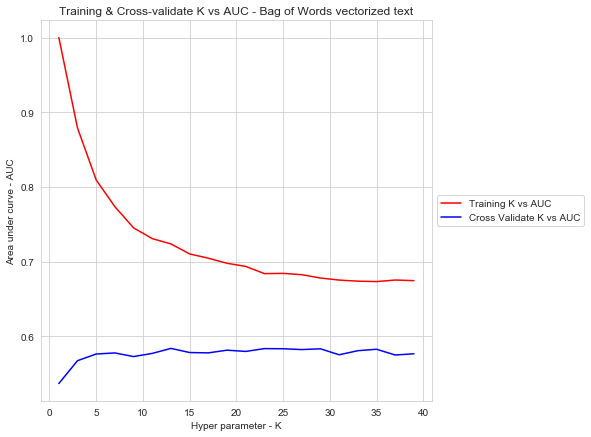

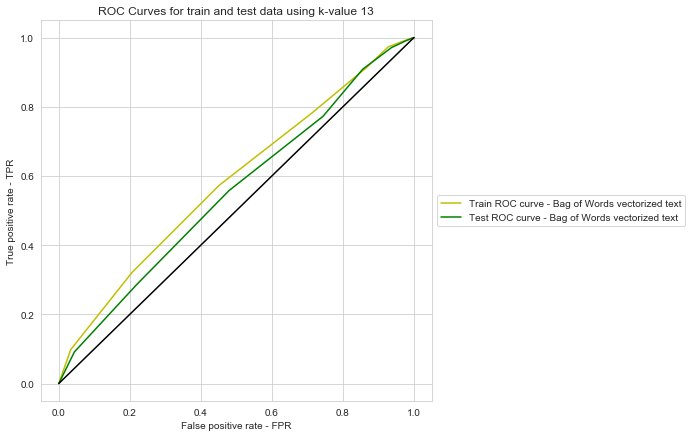

Results of analysis using Bag of Words vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of cross-validate data: 
[0.5368002054442733, 0.5673591850710494, 0.5762857387433659, 0.5777306967984934, 0.5728668036295155, 0.5771143639787708, 0.5838212634822804, 0.5782691319979456, 0.5778051703475433, 0.5814244136278036, 0.5797508988186953, 0.5835225132682761, 0.5833504536894368, 0.5822282143468585, 0.5832451634994008, 0.5752722136620442, 0.5807327512412258, 0.5826596473206642, 0.5749606231809622, 0.5766016093134738]
Optimal K-Value:  13
AUC value of test data:  0.5532327554680933
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO               9             448
Actual: YES             20            2523


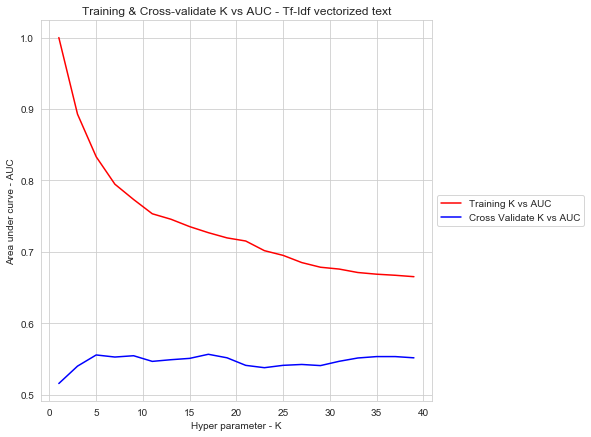

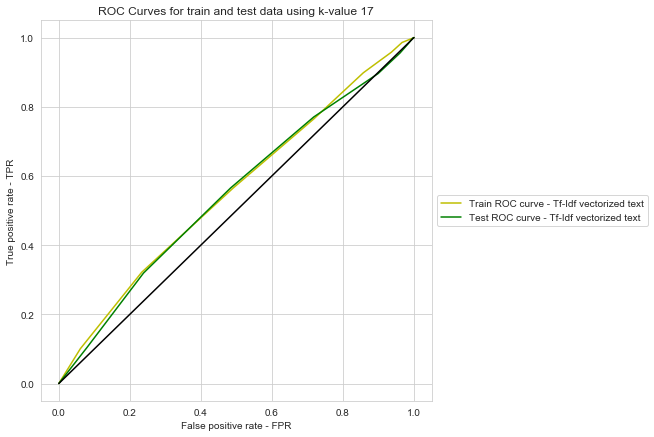

Results of analysis using Tf-Idf vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of cross-validate data: 
[0.5154340010272214, 0.5397722992638248, 0.5554143126177025, 0.5525055641157336, 0.5543374422187981, 0.5464252696456087, 0.5487647663071391, 0.550637733264852, 0.5563670604348571, 0.5514363978770759, 0.5408483136449238, 0.5375817497003939, 0.5408782742681048, 0.5421023797294983, 0.5405230268789593, 0.5465237116932031, 0.5511736004108885, 0.5531296010957027, 0.5531390172915597, 0.5514098613251156]
Optimal K-Value:  17
AUC value of test data:  0.5491278672048641
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO               1             456
Actual: YES              2            2541


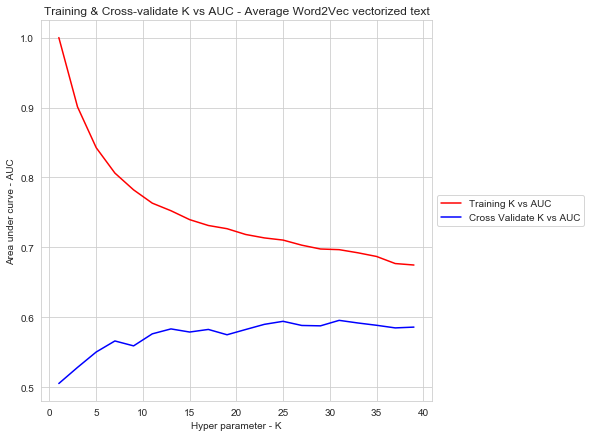

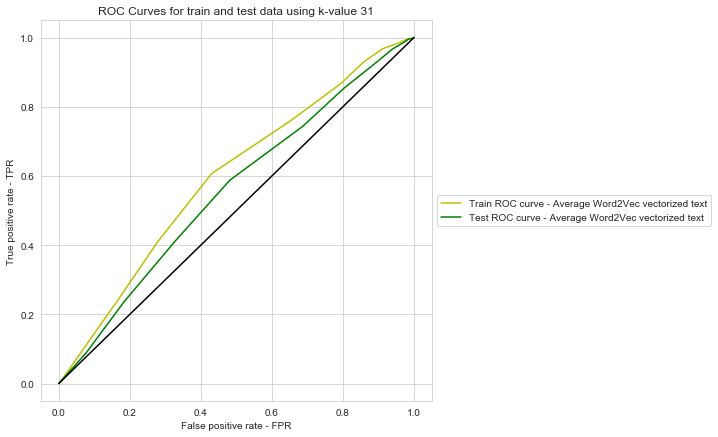

Results of analysis using Average Word2Vec vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of cross-validate data: 
[0.5055213148433487, 0.5285430576956002, 0.5505410032528676, 0.5663413799007021, 0.5593100496490326, 0.5765057353192946, 0.5835593220338983, 0.579085772984078, 0.5828060263653483, 0.5751926040061632, 0.5827212806026365, 0.5900992980653997, 0.5944213319637047, 0.588482280431433, 0.5879472693032014, 0.595789248416367, 0.5920475945899675, 0.588748501968841, 0.5850008560178052, 0.5861273754494094]
Optimal K-Value:  31
AUC value of test data:  0.5574258422528571
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO               0             457
Actual: YES              0            2543


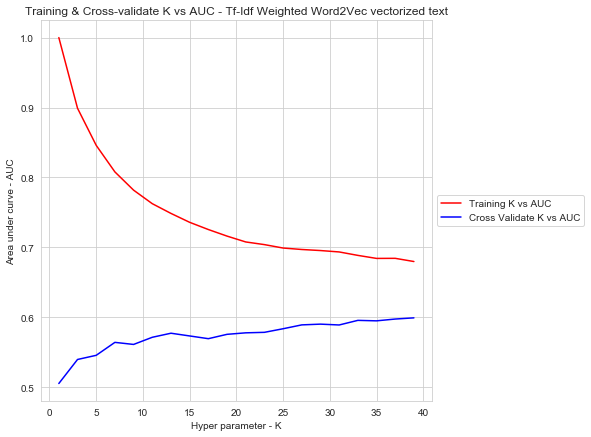

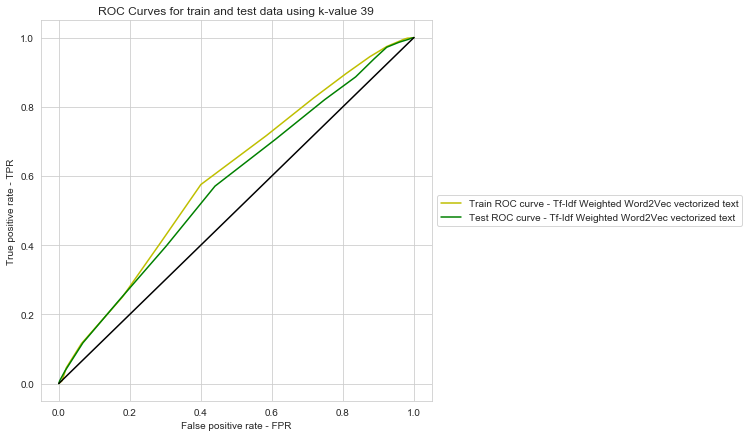

Results of analysis using Tf-Idf Weighted Word2Vec vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of cross-validate data: 
[0.5054699537750386, 0.5398151001540832, 0.5457644239000171, 0.5642809450436568, 0.5613199794555727, 0.5715399760315014, 0.5773549049820237, 0.5734565998972778, 0.5695505906522854, 0.5757712720424585, 0.5779061804485532, 0.5786218113336757, 0.5837502140044513, 0.5892723848656053, 0.5903329909262114, 0.5891379900701935, 0.595733607259031, 0.5950522170861154, 0.5976254066084574, 0.599316897791474]
Optimal K-Value:  39
AUC value of test data:  0.5771384269341937
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO               0             457
Actual: YES              0            2543


In [133]:
testKValues = np.arange(1, 40, 2);
techniques = ['Bag of Words', 'Tf-Idf', 'Average Word2Vec', 'Tf-Idf Weighted Word2Vec'];
for index, technique in enumerate(techniques):
    areaUnderRocValuesTrain = [];
    areaUnderRocValuesCrossValidate = [];
    trainingMergedData = hstack((categoriesVectorsSub,\
                                     subCategoriesVectorsSub,\
                                     teacherPrefixVectorsSub,\
                                     schoolStateVectorsSub,\
                                     projectGradeVectorsSub,\
                                     priceStandardizedSub,\
                                     previouslyPostedStandardizedSub));
    crossValidateMergedData = hstack((categoriesTransformedCrossValidateData,\
                                          subCategoriesTransformedCrossValidateData,\
                                          teacherPrefixTransformedCrossValidateData,\
                                          schoolStateTransformedCrossValidateData,\
                                          projectGradeTransformedCrossValidateData,\
                                          priceTransformedCrossValidateData,\
                                          previouslyPostedTransformedCrossValidateData));
    testMergedData = hstack((categoriesTransformedTestData,\
                                          subCategoriesTransformedTestData,\
                                          teacherPrefixTransformedTestData,\
                                          schoolStateTransformedTestData,\
                                          projectGradeTransformedTestData,\
                                          priceTransformedTestData,\
                                          previouslyPostedTransformedTestData));
    
    if(index == 0):
        trainingMergedData = hstack((trainingMergedData,\
                                     bowTitleModelSub,\
                                     bowEssayModelSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                          bowTitleTransformedCrossValidateData,\
                                          bowEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 bowTitleTransformedTestData,\
                                 bowEssayTransformedTestData));
    elif(index == 1):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfTitleModelSub,\
                                     tfIdfEssayModelSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                          tfIdfTitleTransformedCrossValidateData,\
                                          tfIdfEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 tfIdfTitleTransformedTestData,\
                                 tfIdfEssayTransformedTestData));
    elif(index == 2):
        trainingMergedData = hstack((trainingMergedData,\
                                     word2VecTitlesVectorsSub,\
                                     word2VecEssaysVectorsSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                          word2VecTitleTransformedCrossValidateData,\
                                          word2VecEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 word2VecTitleTransformedTestData,\
                                 word2VecEssayTransformedTestData));
    elif(index == 3):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfWeightedWord2VecTitlesVectorsSub,\
                                     tfIdfWeightedWord2VecEssaysVectorsSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                          tfIdfWeightedTitleTransformedCrossValidateData,\
                                          tfIdfWeightedEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 tfIdfWeightedTitleTransformedTestData,\
                                 tfIdfWeightedEssayTransformedTestData));
    for testKValue in tqdm(testKValues):
        knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
        knnClassifier.fit(trainingMergedData, classesTraining);
        predProbScores = knnClassifier.predict_proba(trainingMergedData);
        fpr, tpr, threshold = roc_curve(classesTraining, predProbScores[:, 1]);
        areaUnderRocValuesTrain.append(auc(fpr, tpr));
        predProbScores = knnClassifier.predict_proba(crossValidateMergedData);
        fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScores[:, 1]);
        areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
        
    plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label = "Training K vs AUC");
    plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label = "Cross Validate K vs AUC");
    plt.title("Training & Cross-validate K vs AUC - {} vectorized text".format(technique));
    plt.xlabel("Hyper parameter - K");
    plt.ylabel("Area under curve - AUC");
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
    knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm = 'brute');
    knnClassifier.fit(trainingMergedData, classesTraining);
    predProbScoresCrossValidate = knnClassifier.predict_proba(crossValidateMergedData);
    fprCrossValidate, tprCrossValidate, thresholdTrain = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    predProbScoresTest = knnClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
    areaUnderRocValueTest = auc(fprTest, tprTest);
    plt.plot(fprCrossValidate, tprCrossValidate, 'y', label="Train ROC curve - {} vectorized text".format(technique));
    plt.plot(fprTest, tprTest, 'g', label="Test ROC curve - {} vectorized text".format(technique));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.title("ROC Curves for train and test data using k-value {}".format(optimalKValue))
    plt.xlabel('False positive rate - FPR');
    plt.ylabel('True positive rate - TPR');
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    print("Results of analysis using {} vectorized text features merged with other features using K-NN brute force algorithm:".format(technique));
    equalsBorder(70);
    print("AUC values of cross-validate data: ");
    equalsBorder(40);
    print(areaUnderRocValuesCrossValidate);
    equalsBorder(40);
    print("Optimal K-Value: ", optimalKValue);
    equalsBorder(40);
    print("AUC value of test data: ", areaUnderRocValueTest);
    # Predicting classes of test data projects
    predictionClassesTest = knnClassifier.predict(testMergedData);
    equalsBorder(40);
    # Adding results to results dataframe
    resultsDataFrame = resultsDataFrame.append({'Vectorizer': technique, 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    print(confusionMatrixDataFrame);
    equalsBorder(110);
    equalsBorder(110);
    equalsBorder(110);

<a id="classification_using_knn_simple_cross_validation_balanced_data"></a>
<h3><font color="blue">Analysis on Balanced Dataset Using K-NN(Simple Cross Validation)</font></h3>

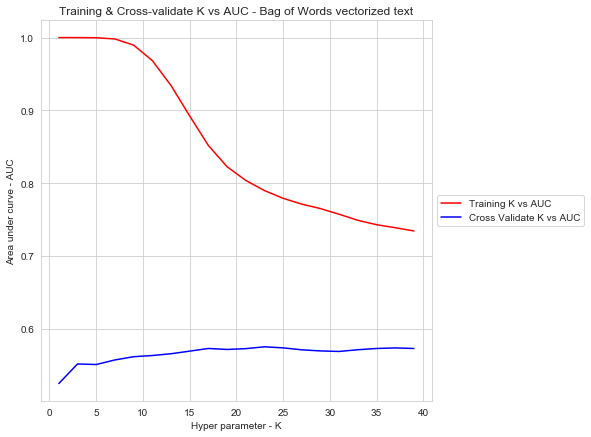

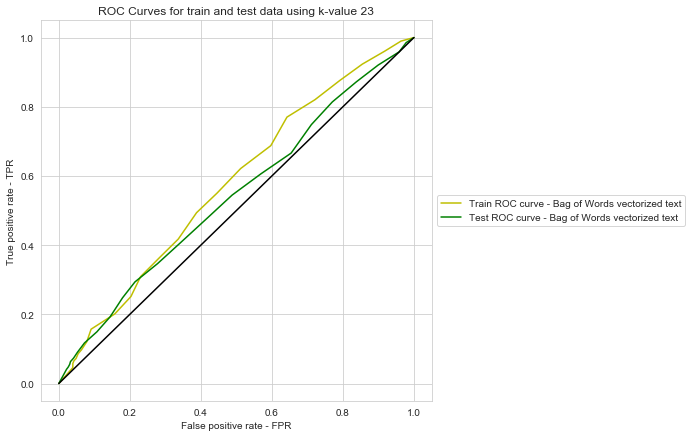

Results of analysis using Bag of Words vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of cross-validate data: 
[0.524884437596302, 0.5517223078240027, 0.5509604519774011, 0.5572376305427154, 0.5616863550761856, 0.5633008046567369, 0.5657609998287965, 0.5693374422187981, 0.57299007019346, 0.5716675226844719, 0.5727409690121555, 0.5752884780003424, 0.5738298236603322, 0.5711427837699025, 0.5696456086286595, 0.5689085772984077, 0.5712746105118987, 0.5729977743537065, 0.5737579181646978, 0.5729969183359013]
Optimal K-Value:  23
AUC value of test data:  0.5423327089164833
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO             330             127
Actual: YES           1662             881


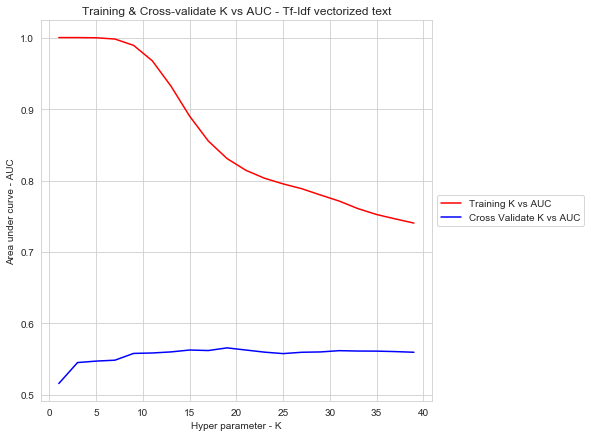

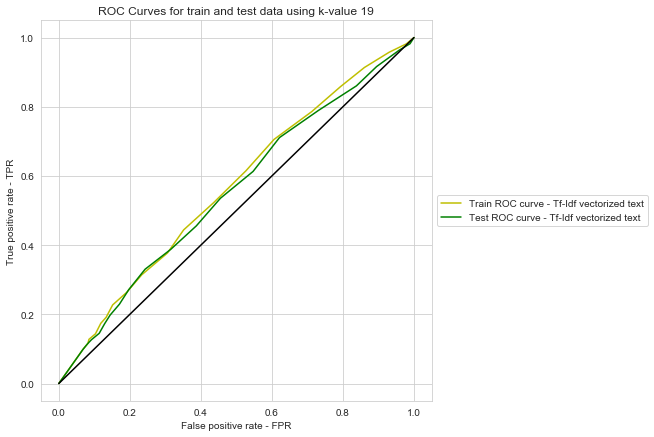

Results of analysis using Tf-Idf vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of cross-validate data: 
[0.516050333846944, 0.5453372710152371, 0.5473942818010614, 0.5486611881527135, 0.5581381612737545, 0.5587442218798151, 0.5602473891456943, 0.5628822119500085, 0.5621751412429379, 0.565894538606403, 0.5629078924841636, 0.5599272384865606, 0.5578813559322034, 0.5597551789077213, 0.5602114363978771, 0.5619936654682417, 0.5614680705358671, 0.5613439479541175, 0.5607002225646294, 0.5597508988186953]
Optimal K-Value:  19
AUC value of test data:  0.5536750387858377
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO             313             144
Actual: YES           1557             986


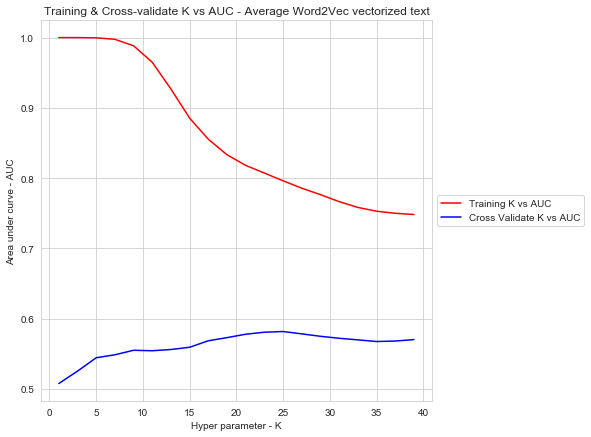

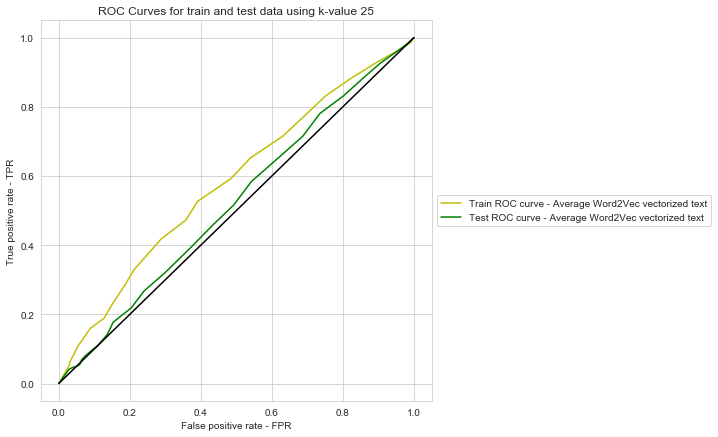

Results of analysis using Average Word2Vec vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of cross-validate data: 
[0.5076014381099128, 0.5252345488786168, 0.5442732408834103, 0.5484737202533814, 0.554909262112652, 0.5542432802602294, 0.5559921246361924, 0.5592158876904639, 0.5684463276836158, 0.5728950522170861, 0.5777469611367916, 0.5806171888375278, 0.5815939051532272, 0.5782306111967129, 0.5747988358157848, 0.5719577127204246, 0.5697183701420989, 0.567366889231296, 0.5680414312617702, 0.5700744735490498]
Optimal K-Value:  25
AUC value of test data:  0.5226962761293498
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO             321             136
Actual: YES           1732             811


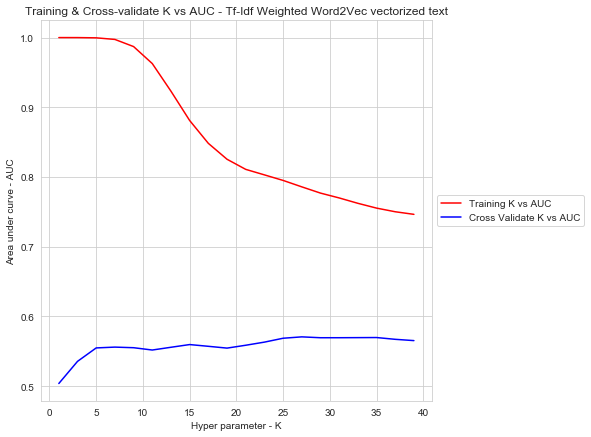

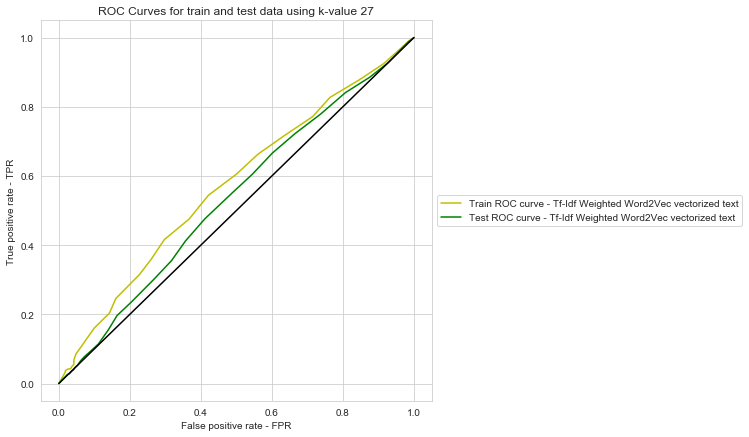

Results of analysis using Tf-Idf Weighted Word2Vec vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of cross-validate data: 
[0.5036723163841808, 0.5354357130628317, 0.5547320664269817, 0.5558859784283513, 0.5550273925697655, 0.5517068995035097, 0.5556574216743708, 0.5595360383495976, 0.5570441705187468, 0.554457284711522, 0.5585593220338982, 0.5630362951549392, 0.568613251155624, 0.5705932203389831, 0.5693400102722137, 0.5693562746105119, 0.5694881013525082, 0.5696216401301148, 0.5670672829994863, 0.565216572504708]
Optimal K-Value:  27
AUC value of test data:  0.5351765820448461
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO             335             122
Actual: YES           1779             764


In [181]:
testKValues = np.arange(1, 40, 2);
techniques = ['Bag of Words', 'Tf-Idf', 'Average Word2Vec', 'Tf-Idf Weighted Word2Vec'];
for index, technique in enumerate(techniques):
    areaUnderRocValuesTrain = [];
    areaUnderRocValuesCrossValidate = [];
    trainingMergedData = hstack((categoriesVectorsSub,\
                                     subCategoriesVectorsSub,\
                                     teacherPrefixVectorsSub,\
                                     schoolStateVectorsSub,\
                                     projectGradeVectorsSub,\
                                     priceStandardizedSub,\
                                     previouslyPostedStandardizedSub));
    crossValidateMergedData = hstack((categoriesTransformedCrossValidateData,\
                                          subCategoriesTransformedCrossValidateData,\
                                          teacherPrefixTransformedCrossValidateData,\
                                          schoolStateTransformedCrossValidateData,\
                                          projectGradeTransformedCrossValidateData,\
                                          priceTransformedCrossValidateData,\
                                          previouslyPostedTransformedCrossValidateData));
    testMergedData = hstack((categoriesTransformedTestData,\
                                          subCategoriesTransformedTestData,\
                                          teacherPrefixTransformedTestData,\
                                          schoolStateTransformedTestData,\
                                          projectGradeTransformedTestData,\
                                          priceTransformedTestData,\
                                          previouslyPostedTransformedTestData));
    
    if(index == 0):
        trainingMergedData = hstack((trainingMergedData,\
                                     bowTitleModelSub,\
                                     bowEssayModelSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                          bowTitleTransformedCrossValidateData,\
                                          bowEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 bowTitleTransformedTestData,\
                                 bowEssayTransformedTestData));
    elif(index == 1):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfTitleModelSub,\
                                     tfIdfEssayModelSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                          tfIdfTitleTransformedCrossValidateData,\
                                          tfIdfEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 tfIdfTitleTransformedTestData,\
                                 tfIdfEssayTransformedTestData));
    elif(index == 2):
        trainingMergedData = hstack((trainingMergedData,\
                                     word2VecTitlesVectorsSub,\
                                     word2VecEssaysVectorsSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                          word2VecTitleTransformedCrossValidateData,\
                                          word2VecEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 word2VecTitleTransformedTestData,\
                                 word2VecEssayTransformedTestData));
    elif(index == 3):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfWeightedWord2VecTitlesVectorsSub,\
                                     tfIdfWeightedWord2VecEssaysVectorsSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                          tfIdfWeightedTitleTransformedCrossValidateData,\
                                          tfIdfWeightedEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 tfIdfWeightedTitleTransformedTestData,\
                                 tfIdfWeightedEssayTransformedTestData));
    for testKValue in tqdm(testKValues):
        knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
        knnClassifier.fit(trainingMergedData, classesTraining);
        predProbScores = knnClassifier.predict_proba(trainingMergedData);
        fpr, tpr, threshold = roc_curve(classesTraining, predProbScores[:, 1]);
        areaUnderRocValuesTrain.append(auc(fpr, tpr));
        predProbScores = knnClassifier.predict_proba(crossValidateMergedData);
        fpr, tpr, threshold = roc_curve(classesCrossValidate, predProbScores[:, 1]);
        areaUnderRocValuesCrossValidate.append(auc(fpr, tpr));
        
    plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label = "Training K vs AUC");
    plt.plot(testKValues, areaUnderRocValuesCrossValidate, 'b', label = "Cross Validate K vs AUC");
    plt.title("Training & Cross-validate K vs AUC - {} vectorized text".format(technique));
    plt.xlabel("Hyper parameter - K");
    plt.ylabel("Area under curve - AUC");
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    optimalKValue = testKValues[np.argmax(areaUnderRocValuesCrossValidate)];
    knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm = 'brute');
    knnClassifier.fit(trainingMergedData, classesTraining);
    predProbScoresCrossValidate = knnClassifier.predict_proba(crossValidateMergedData);
    fprCrossValidate, tprCrossValidate, thresholdTrain = roc_curve(classesCrossValidate, predProbScoresCrossValidate[:, 1]);
    predProbScoresTest = knnClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
    areaUnderRocValueTest = auc(fprTest, tprTest);
    plt.plot(fprCrossValidate, tprCrossValidate, 'y', label="Train ROC curve - {} vectorized text".format(technique));
    plt.plot(fprTest, tprTest, 'g', label="Test ROC curve - {} vectorized text".format(technique));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.title("ROC Curves for train and test data using k-value {}".format(optimalKValue))
    plt.xlabel('False positive rate - FPR');
    plt.ylabel('True positive rate - TPR');
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    print("Results of analysis using {} vectorized text features merged with other features using K-NN brute force algorithm:".format(technique));
    equalsBorder(70);
    print("AUC values of cross-validate data: ");
    equalsBorder(40);
    print(areaUnderRocValuesCrossValidate);
    equalsBorder(40);
    print("Optimal K-Value: ", optimalKValue);
    equalsBorder(40);
    print("AUC value of test data: ", areaUnderRocValueTest);
    # Predicting classes of test data projects
    predictionClassesTest = knnClassifier.predict(testMergedData);
    equalsBorder(40);
    # Adding results to results dataframe
    balancedDataResultsDataFrame = balancedDataResultsDataFrame.append({'Vectorizer': technique, 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    print(confusionMatrixDataFrame);
    equalsBorder(110);
    equalsBorder(110);
    equalsBorder(110);

<a id="classification_using_knn_kfold_cross_validation"></a>
<h2><font color="green">Classification of data using K-NN(k-fold cross validation)</font></h2>

<h3><font color='blue'>Splitting Data(Only training and test)</font></h3>

In [224]:
projectsData = projectsData.dropna(subset = ['teacher_prefix']);
projectsData.shape

(109245, 22)

In [225]:
classesData = projectsData['project_is_approved']
print(classesData.shape)

(109245,)


In [226]:
trainingData, testData, classesTraining, classesTest = cross_validation.train_test_split(projectsData[0:10000], classesData[0:10000], test_size =  0.3, random_state = 0);

In [227]:
print("Shapes of splitted data: ");
equalsBorder(70);

print("testData shape: ", testData.shape);
print("classesTest: ", classesTest.shape);
print("trainingData shape: ", trainingData.shape);
print("classesTraining shape: ", classesTraining.shape);

Shapes of splitted data: 
testData shape:  (3000, 22)
classesTest:  (3000,)
trainingData shape:  (7000, 22)
classesTraining shape:  (7000,)


In [229]:
print("Number of negative points: ", trainingData[trainingData['project_is_approved'] == 0].shape);
print("Number of positive points: ", trainingData[trainingData['project_is_approved'] == 1].shape);

Number of negative points:  (1043, 22)
Number of positive points:  (5957, 22)


<h3><font color="blue">Balancing Data</font></h3>

<h5><font color="red">Note: Instead of displaying whole vectorization process for balanced and imbalanced data, we have simply disabled below cell while performing analysis on imbalanced data and enabled while performing analysis on balanced data </font></h5>

In [131]:
negativeData = trainingData[trainingData['project_is_approved'] == 0];
positiveData = trainingData[trainingData['project_is_approved'] == 1];
negativeDataBalanced = resample(negativeData, replace = True, n_samples = 5957, random_state = 44);
trainingData = pd.concat([positiveData, negativeDataBalanced]);
trainingData = shuffle(trainingData);
classesTraining = trainingData['project_is_approved'];
print("Testing whether data is balanced: ");
equalsBorder(60);
print("Number of positive points: ", trainingData[trainingData['project_is_approved'] == 1].shape);
print("Number of negative points: ", trainingData[trainingData['project_is_approved'] == 0].shape);

Testing whether data is balanced: 
Number of positive points:  (5957, 22)
Number of negative points:  (5957, 22)


## Vectorizing categorical data

### 1. Vectorizing cleaned_categories(project_subject_categories cleaned) - One Hot Encoding

In [230]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_categories
subjectsCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedCategoriesDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_categories values
subjectsCategoriesVectorizer.fit(trainingData['cleaned_categories'].values);
# Vectorizing categories using one-hot-encoding
categoriesVectors = subjectsCategoriesVectorizer.transform(trainingData['cleaned_categories'].values);

In [231]:
print("Features used in vectorizing categories: ");
equalsBorder(70);
print(subjectsCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", categoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(categoriesVectors[0:4])

Features used in vectorizing categories: 
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (7000, 9)
Sample vectors of categories: 
  (0, 7)	1
  (0, 8)	1
  (1, 8)	1
  (2, 7)	1
  (2, 8)	1
  (3, 7)	1


### 2. Vectorizing cleaned_sub_categories(project_subject_sub_categories cleaned) - One Hot Encoding

In [232]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_sub_categories
subjectsSubCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedDictionarySubCategories.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_sub_categories values
subjectsSubCategoriesVectorizer.fit(trainingData['cleaned_sub_categories'].values);
# Vectorizing sub categories using one-hot-encoding
subCategoriesVectors = subjectsSubCategoriesVectorizer.transform(trainingData['cleaned_sub_categories'].values);

In [233]:
print("Features used in vectorizing subject sub categories: ");
equalsBorder(70);
print(subjectsSubCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", subCategoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(subCategoriesVectors[0:4])

Features used in vectorizing subject sub categories: 
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (7000, 30)
Sample vectors of categories: 
  (0, 27)	1
  (0, 28)	1
  (1, 29)	1
  (2, 27)	1
  (2, 28)	1
  (3, 22)	1
  (3, 25)	1


### 3. Vectorizing teacher_prefix - One Hot Encoding

In [234]:
def giveCounter(data):
    counter = Counter();
    for dataValue in data:
        counter.update(str(dataValue).split());
    return counter

In [235]:
giveCounter(trainingData['teacher_prefix'].values)

Counter({'Mrs.': 3577, 'Ms.': 2569, 'Mr.': 705, 'Teacher': 149})

In [236]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [237]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:100]);

Features used in vectorizing teacher_prefix: 
['Mrs.', 'Ms.', 'Mr.', 'Teacher']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (7000, 4)
Sample vectors of teacher_prefix: 
  (44, 3)	1
  (50, 3)	1


In [238]:
teacherPrefixes = [prefix.replace('.', '') for prefix in trainingData['teacher_prefix'].values];
teacherPrefixes[0:5]

['Mrs', 'Ms', 'Mrs', 'Ms', 'Ms']

In [239]:
trainingData['teacher_prefix'] = teacherPrefixes;
trainingData.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
7681       35229  p237183  4d9242a296d9d801de0a3ba48524a6a9            Mrs   
9032       42897  p232226  c2f342e359635429a948c3d02f28a2d0             Ms   
3691       47711  p180884  73872f258c29d357a925f7518169b019            Mrs   

     school_state project_submitted_datetime project_grade_category  \
7681           CO        2017-01-09 17:00:24          Grades PreK-2   
9032           MO        2017-01-31 09:45:47             Grades 3-5   
3691           TX        2016-08-12 15:20:19             Grades 3-5   

               project_subject_categories      project_subject_subcategories  \
7681  Literacy & Language, Math & Science  Literature & Writing, Mathematics   
9032                  Literacy & Language                           Literacy   
3691  Literacy & Language, Math & Science  Literature & Writing, Mathematics   

                                       project_title   ...    project_essay_3  \
7681                     Tech-Fabulous First Graders   ...                NaN   
9032                   Books, Books, and More Books!   ...                NaN   
3691  Mini-Minds Need an iPad Mini for Maximum Means   ...                NaN   

     project_essay_4                           project_resource_summary  \
7681             NaN  My students need technology at their fingertip...   
9032             NaN  My students need new classroom books to contin...   
3691             NaN  My students need an iPad Mini 4 and a protecti...   

     teacher_number_of_previously_posted_projects project_is_approved  \
7681                                            1                   1   
9032                                            2                   1   
3691                                           13                   1   

                   cleaned_categories           cleaned_sub_categories  \
7681  Literacy_Language Math_Science   Literature_Writing Mathematics    
9032               Literacy_Language                         Literacy    
3691  Literacy_Language Math_Science   Literature_Writing Mathematics    

                                          project_essay   price quantity  
7681  My students are fabulous! There are 28 of them...  157.00       10  
9032  My classroom is blessed with 27 compassionate,...  251.40       33  
3691  We are a small, rural school in East Texas, wi...  448.45        2  

[3 rows x 22 columns]

In [240]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [241]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:4]);

Features used in vectorizing teacher_prefix: 
['Mrs', 'Ms', 'Mr', 'Teacher']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (7000, 4)
Sample vectors of teacher_prefix: 
  (0, 0)	1
  (1, 1)	1
  (2, 0)	1
  (3, 1)	1


### 4. Vectorizing school_state - One Hot Encoding

In [242]:
schoolStateDictionary = dict(giveCounter(trainingData['school_state'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique school states
schoolStateVectorizer = CountVectorizer(vocabulary = list(schoolStateDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with school_state values
schoolStateVectorizer.fit(trainingData['school_state'].values);
# Vectorizing school_state using one-hot-encoding
schoolStateVectors = schoolStateVectorizer.transform(trainingData['school_state'].values);

In [243]:
print("Features used in vectorizing school_state: ");
equalsBorder(70);
print(schoolStateVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", schoolStateVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(schoolStateVectors[0:4]);

Features used in vectorizing school_state: 
['CO', 'MO', 'TX', 'UT', 'WI', 'OH', 'SC', 'NY', 'IL', 'AZ', 'KS', 'ID', 'TN', 'MS', 'CA', 'MI', 'KY', 'GA', 'FL', 'VA', 'CT', 'NC', 'NH', 'RI', 'MA', 'IN', 'NJ', 'WV', 'MD', 'MT', 'DE', 'LA', 'OK', 'PA', 'MN', 'AL', 'NE', 'SD', 'OR', 'WA', 'HI', 'NV', 'AR', 'IA', 'WY', 'NM', 'AK', 'ME', 'DC', 'VT', 'ND']
Shape of school_state matrix after vectorization(one-hot-encoding):  (7000, 51)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1


### 5. Vectorizing project_grade_category - One Hot Encoding

In [244]:
giveCounter(trainingData['project_grade_category'])

Counter({'Grades': 7000,
         'PreK-2': 2835,
         '3-5': 2394,
         '6-8': 1083,
         '9-12': 688})

In [245]:
cleanedGrades = []
for grade in trainingData['project_grade_category'].values:
    grade = grade.replace(' ', '');
    grade = grade.replace('-', 'to');
    cleanedGrades.append(grade);
cleanedGrades[0:4]

['GradesPreKto2', 'Grades3to5', 'Grades3to5', 'Grades6to8']

In [246]:
trainingData['project_grade_category'] = cleanedGrades
trainingData.head(4)

Unnamed: 0       id                        teacher_id teacher_prefix  \
7681       35229  p237183  4d9242a296d9d801de0a3ba48524a6a9            Mrs   
9032       42897  p232226  c2f342e359635429a948c3d02f28a2d0             Ms   
3691       47711  p180884  73872f258c29d357a925f7518169b019            Mrs   
202        83193  p151416  833e60834433e807a89b9720b7bc1925             Ms   

     school_state project_submitted_datetime project_grade_category  \
7681           CO        2017-01-09 17:00:24          GradesPreKto2   
9032           MO        2017-01-31 09:45:47             Grades3to5   
3691           TX        2016-08-12 15:20:19             Grades3to5   
202            UT        2017-01-17 23:58:25             Grades6to8   

               project_subject_categories  \
7681  Literacy & Language, Math & Science   
9032                  Literacy & Language   
3691  Literacy & Language, Math & Science   
202                        Math & Science   

                project_subject_subcategories  \
7681        Literature & Writing, Mathematics   
9032                                 Literacy   
3691        Literature & Writing, Mathematics   
202   Applied Sciences, Environmental Science   

                                       project_title   ...    project_essay_3  \
7681                     Tech-Fabulous First Graders   ...                NaN   
9032                   Books, Books, and More Books!   ...                NaN   
3691  Mini-Minds Need an iPad Mini for Maximum Means   ...                NaN   
202                             Chromebooks for STEM   ...                NaN   

     project_essay_4                           project_resource_summary  \
7681             NaN  My students need technology at their fingertip...   
9032             NaN  My students need new classroom books to contin...   
3691             NaN  My students need an iPad Mini 4 and a protecti...   
202              NaN  My students need Chromebooks to take them beyo...   

     teacher_number_of_previously_posted_projects project_is_approved  \
7681                                            1                   1   
9032                                            2                   1   
3691                                           13                   1   
202                                             4                   1   

                   cleaned_categories                 cleaned_sub_categories  \
7681  Literacy_Language Math_Science         Literature_Writing Mathematics    
9032               Literacy_Language                               Literacy    
3691  Literacy_Language Math_Science         Literature_Writing Mathematics    
202                     Math_Science   AppliedSciences EnvironmentalScience    

                                          project_essay   price quantity  
7681  My students are fabulous! There are 28 of them...  157.00       10  
9032  My classroom is blessed with 27 compassionate,...  251.40       33  
3691  We are a small, rural school in East Texas, wi...  448.45        2  
202   “Equipped with his five senses, man explores t...  191.57        5  

[4 rows x 22 columns]

In [247]:
projectGradeDictionary = dict(giveCounter(trainingData['project_grade_category'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique project grade categories
projectGradeVectorizer = CountVectorizer(vocabulary = list(projectGradeDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with project_grade_category values
projectGradeVectorizer.fit(trainingData['project_grade_category'].values);
# Vectorizing project_grade_category using one-hot-encoding
projectGradeVectors = projectGradeVectorizer.transform(trainingData['project_grade_category'].values);

In [248]:
print("Features used in vectorizing project_grade_category: ");
equalsBorder(70);
print(projectGradeVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", projectGradeVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(projectGradeVectors[0:4]);

Features used in vectorizing project_grade_category: 
['GradesPreKto2', 'Grades3to5', 'Grades6to8', 'Grades9to12']
Shape of school_state matrix after vectorization(one-hot-encoding):  (7000, 4)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 1)	1
  (3, 2)	1


In [249]:
preProcessedEssaysWithStopWords, preProcessedEssaysWithoutStopWords = preProcessingWithAndWithoutStopWords(trainingData['project_essay']);
preProcessedProjectTitlesWithStopWords, preProcessedProjectTitlesWithoutStopWords = preProcessingWithAndWithoutStopWords(trainingData['project_title']);

<h4><a id="vectorizing_features"></a></h4>
## Vectorizing Text Data

### Bag of Words

#### 1. Vectorizing project_essay

In [250]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project essays
bowEssayVectorizer = CountVectorizer(min_df = 10);
# Transforming the preprocessed essays to bag of words vectors
bowEssayModel = bowEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWords);

In [251]:
print("Some of the Features used in vectorizing preprocessed essays: ");
equalsBorder(70);
print(bowEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed essay matrix after vectorization: ", bowEssayModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed essay: ");
equalsBorder(70);
print(bowEssayModel[0])

Some of the Features used in vectorizing preprocessed essays: 
['worn', 'worried', 'worry', 'worrying', 'worst', 'worth', 'worthwhile', 'worthy', 'would', 'wow', 'wrap', 'write', 'writer', 'writers', 'writing', 'writings', 'written', 'wrong', 'wrote', 'yard', 'year', 'yearbook', 'yearly', 'yearn', 'yearning', 'years', 'yes', 'yesterday', 'yet', 'yoga', 'york', 'young', 'younger', 'youngest', 'youth', 'youtube', 'zip', 'zone', 'zones', 'zoo']
Shape of preprocessed essay matrix after vectorization:  (7000, 5121)
Sample bag-of-words vector of preprocessed essay: 
  (0, 3084)	1
  (0, 2888)	1
  (0, 3749)	1
  (0, 3890)	1
  (0, 4893)	1
  (0, 582)	1
  (0, 815)	1
  (0, 4869)	1
  (0, 766)	1
  (0, 800)	1
  (0, 2280)	1
  (0, 2262)	1
  (0, 3226)	1
  (0, 2864)	1
  (0, 3241)	1
  (0, 4698)	1
  (0, 3215)	1
  (0, 968)	2
  (0, 5062)	2
  (0, 4798)	1
  (0, 4450)	1
  (0, 4415)	1
  (0, 1687)	1
  (0, 2689)	1
  (0, 338)	1
  :	:
  (0, 2063)	1
  (0, 4090)	2
  (0, 3349)	1
  (0, 5106)	1
  (0, 1678)	1
  (0, 4343)	1

#### 2. Vectorizing project_title

In [252]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project titles
bowTitleVectorizer = CountVectorizer(min_df = 10);
# Transforming the preprocessed project titles to bag of words vectors
bowTitleModel = bowTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWords);

In [253]:
print("Some of the Features used in vectorizing preprocessed titles: ");
equalsBorder(70);
print(bowTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after vectorization: ", bowTitleModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed title: ");
equalsBorder(70);
print(bowTitleModel[0])

Some of the Features used in vectorizing preprocessed titles: 
['teach', 'teacher', 'teaching', 'team', 'tech', 'technology', 'texts', 'think', 'thinking', 'third', 'time', 'today', 'together', 'tomorrow', 'tools', 'us', 'use', 'using', 'virtual', 'visual', 'want', 'wanted', 'way', 'wiggle', 'wiggles', 'wiggly', 'without', 'wobble', 'wobbling', 'wonder', 'words', 'work', 'working', 'world', 'write', 'writers', 'writing', 'year', 'yoga', 'young']
Shape of preprocessed title matrix after vectorization:  (7000, 450)
Sample bag-of-words vector of preprocessed title: 
  (0, 179)	1
  (0, 154)	1
  (0, 414)	1


### Tf-Idf Vectorization

#### 1. Vectorizing project_essay

In [254]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project essays
tfIdfEssayVectorizer = TfidfVectorizer(min_df = 10);
# Transforming the preprocessed project essays to tf-idf vectors
tfIdfEssayModel = tfIdfEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWords);

In [255]:
print("Some of the Features used in tf-idf vectorizing preprocessed essays: ");
equalsBorder(70);
print(tfIdfEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfEssayModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed essay: ");
equalsBorder(70);
print(tfIdfEssayModel[0])

Some of the Features used in tf-idf vectorizing preprocessed essays: 
['worn', 'worried', 'worry', 'worrying', 'worst', 'worth', 'worthwhile', 'worthy', 'would', 'wow', 'wrap', 'write', 'writer', 'writers', 'writing', 'writings', 'written', 'wrong', 'wrote', 'yard', 'year', 'yearbook', 'yearly', 'yearn', 'yearning', 'years', 'yes', 'yesterday', 'yet', 'yoga', 'york', 'young', 'younger', 'youngest', 'youth', 'youtube', 'zip', 'zone', 'zones', 'zoo']
Shape of preprocessed title matrix after tf-idf vectorization:  (7000, 5121)
Sample Tf-Idf vector of preprocessed essay: 
  (0, 4477)	0.12700485794721247
  (0, 1770)	0.1501479429060923
  (0, 33)	0.14547080375188362
  (0, 912)	0.04369473310467847
  (0, 1371)	0.06559461630695812
  (0, 442)	0.06977084317612585
  (0, 3164)	0.07345381335528468
  (0, 4048)	0.14612875624054827
  (0, 2090)	0.14152773602400653
  (0, 4203)	0.192323071754554
  (0, 3552)	0.12557535513714596
  (0, 4141)	0.08799952468439892
  (0, 2600)	0.12130869322736769
  (0, 3129)	0.05

#### 2. Vectorizing project_title

In [256]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project titles
tfIdfTitleVectorizer = TfidfVectorizer(min_df = 10);
# Transforming the preprocessed project titles to tf-idf vectors
tfIdfTitleModel = tfIdfTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWords);

In [257]:
print("Some of the Features used in tf-idf vectorizing preprocessed titles: ");
equalsBorder(70);
print(tfIdfTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfTitleModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed title: ");
equalsBorder(70);
print(tfIdfTitleModel[0])

Some of the Features used in tf-idf vectorizing preprocessed titles: 
['teach', 'teacher', 'teaching', 'team', 'tech', 'technology', 'texts', 'think', 'thinking', 'third', 'time', 'today', 'together', 'tomorrow', 'tools', 'us', 'use', 'using', 'virtual', 'visual', 'want', 'wanted', 'way', 'wiggle', 'wiggles', 'wiggly', 'without', 'wobble', 'wobbling', 'wonder', 'words', 'work', 'working', 'world', 'write', 'writers', 'writing', 'year', 'yoga', 'young']
Shape of preprocessed title matrix after tf-idf vectorization:  (7000, 450)
Sample Tf-Idf vector of preprocessed title: 
  (0, 414)	0.6015041192948177
  (0, 154)	0.5796749237887321
  (0, 179)	0.5496997154828203


### Average Word2Vector Vectorization

In [258]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# We should have glove_vectors file for creating below model
with open('glove_vectors', 'rb') as f:
    gloveModel = pickle.load(f)
    gloveWords =  set(gloveModel.keys())

In [259]:
print("Glove vector of sample word: ");
equalsBorder(70);
print(gloveModel['technology']);
equalsBorder(70);
print("Shape of glove vector: ", gloveModel['technology'].shape);

Glove vector of sample word: 
[-0.26078   -0.36898   -0.022831   0.21666    0.16672   -0.20268
 -3.1219     0.33057    0.71512    0.28874    0.074368  -0.033203
  0.23783    0.21052    0.076562   0.13007   -0.31706   -0.45888
 -0.45463   -0.13191    0.49761    0.072704   0.16811    0.18846
 -0.16688   -0.21973    0.08575   -0.19577   -0.2101    -0.32436
 -0.56336    0.077996  -0.22758   -0.66569    0.14824    0.038945
  0.50881   -0.1352     0.49966   -0.4401    -0.022335  -0.22744
  0.22086    0.21865    0.36647    0.30495   -0.16565    0.038759
  0.28108   -0.2167     0.12453    0.65401    0.34584   -0.2557
 -0.046363  -0.31111   -0.020936  -0.17122   -0.77114    0.29289
 -0.14625    0.39541   -0.078938   0.051127   0.15076    0.085126
  0.183     -0.06755    0.26312    0.0087276  0.0066415  0.37033
  0.03496   -0.12627   -0.052626  -0.34897    0.14672    0.14799
 -0.21821   -0.042785   0.2661    -1.1105     0.31789    0.27278
  0.054468  -0.27458    0.42732   -0.44101   -0.19302   -

In [260]:
def getWord2VecVectors(texts):
    word2VecTextsVectors = [];
    for preProcessedText in tqdm(texts):
        word2VecTextVector = np.zeros(300);
        numberOfWordsInText = 0;
        for word in preProcessedText.split():
            if word in gloveWords:
                word2VecTextVector += gloveModel[word];
                numberOfWordsInText += 1;
        if numberOfWordsInText != 0:
            word2VecTextVector = word2VecTextVector / numberOfWordsInText;
        word2VecTextsVectors.append(word2VecTextVector);
    return word2VecTextsVectors;

#### 1. Vectorizing project_essay

In [261]:
word2VecEssaysVectors = getWord2VecVectors(preProcessedEssaysWithoutStopWords);

In [262]:
print("Shape of Word2Vec vectorization matrix of essays: {},{}".format(len(word2VecEssaysVectors), len(word2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample essay: ");
equalsBorder(70);
print(word2VecEssaysVectors[0]);

Shape of Word2Vec vectorization matrix of essays: 7000,300
Sample essay: 
students fabulous 28 come diverse backgrounds not school gone school since preschool several kiddos new school year school ib school really puts global spin everything years passed seem get parent involvement great district getting technology based however never seem enough equipment implement awesome see kids computers though even able help well crucial develop skills needed succeed technologcally driven world students grow testing completely dependent upon online assessments computers classroom would benefit areas learning example students still stress trying work computer often times students opportunity work computer since many students not one home hope children chance use chrome books classroom various research well supplementing reading math nannan
Word2Vec vector of sample essay: 
[ 1.49061810e-02  6.52558757e-02 -1.43678057e-02 -1.28303819e-01
  9.42167810e-03 -1.30810600e-02 -3.22363848e+00  7.95128848e

#### 2. Vectorizing project_title

In [263]:
word2VecTitlesVectors = getWord2VecVectors(preProcessedProjectTitlesWithoutStopWords);

In [264]:
print("Shape of Word2Vec vectorization matrix of project titles: {}, {}".format(len(word2VecTitlesVectors), len(word2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample title: ");
equalsBorder(70);
print(word2VecTitlesVectors[0]);

Shape of Word2Vec vectorization matrix of project titles: 7000, 300
Sample title: 
tech fabulous first graders
Word2Vec vector of sample title: 
[ 1.00052500e-01  9.91145000e-02 -6.97675000e-02 -9.66325000e-03
  2.68280000e-02 -1.26450825e-01 -2.14432500e+00 -1.55777250e-01
  4.79625000e-02 -3.29375000e-02  1.04538000e-01  3.33990000e-03
  4.91177500e-02 -3.65375000e-02 -1.69414500e-01 -3.42555000e-01
  3.03137250e-02 -2.44207500e-01 -2.06472750e-01  3.72627500e-02
  1.07215000e-02  1.95850000e-01  2.62435000e-02 -1.05600000e-02
 -3.75005000e-02 -2.18662500e-02  3.68045000e-01  1.13390000e-02
 -3.82630000e-02  5.93500000e-02 -3.34545000e-01 -3.12827500e-01
  9.03075000e-02  2.39504750e-01 -1.01084000e-01  1.58775750e-01
 -6.67825000e-03 -1.93450000e-02  2.91756500e-01 -1.90900000e-02
 -3.45407500e-01  1.16209000e-01  3.72802500e-01 -1.32015250e-01
  8.28187500e-02 -4.74750000e-04  4.24945000e-02 -2.51698500e-01
 -6.14992500e-02  1.62057925e-01  1.11650750e-01  1.87273450e-01
  1.812278

### Tf-Idf Weighted Word2Vec Vectorization

#### 1. Vectorizing project_essay

In [265]:
# Initializing tfidf vectorizer
tfIdfEssayTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed essays using tfidf vectorizer initialized above 
tfIdfEssayTempVectorizer.fit(preProcessedEssaysWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfEssayDictionary = dict(zip(tfIdfEssayTempVectorizer.get_feature_names(), list(tfIdfEssayTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfEssayWords = set(tfIdfEssayTempVectorizer.get_feature_names());

In [266]:
# Creating list to save tf-idf weighted vectors of essays
tfIdfWeightedWord2VecEssaysVectors = [];
# Iterating over each essay
for essay in tqdm(preProcessedEssaysWithoutStopWords):
    # Sum of tf-idf values of all words in a particular essay
    cumulativeSumTfIdfWeightOfEssay = 0;
    # Tf-Idf weighted word2vec vector of a particular essay
    tfIdfWeightedWord2VecEssayVector = np.zeros(300);
    # Splitting essay into list of words
    splittedEssay = essay.split();
    # Iterating over each word
    for word in splittedEssay:
        # Checking if word is in glove words and set of words used by tfIdf essay vectorizer
        if (word in gloveWords) and (word in tfIdfEssayWords):
            # Tf-Idf value of particular word in essay
            tfIdfValueWord = tfIdfEssayDictionary[word] * (essay.count(word) / len(splittedEssay));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecEssayVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfEssay += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfEssay != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecEssayVector = tfIdfWeightedWord2VecEssayVector / cumulativeSumTfIdfWeightOfEssay;
    # Appending the above calculated tf-idf weighted vector of particular essay to list of vectors of essays
    tfIdfWeightedWord2VecEssaysVectors.append(tfIdfWeightedWord2VecEssayVector);

In [267]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: {}, {}".format(len(tfIdfWeightedWord2VecEssaysVectors), len(tfIdfWeightedWord2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample Essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample essay: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecEssaysVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: 7000, 300
Sample Essay: 
students fabulous 28 come diverse backgrounds not school gone school since preschool several kiddos new school year school ib school really puts global spin everything years passed seem get parent involvement great district getting technology based however never seem enough equipment implement awesome see kids computers though even able help well crucial develop skills needed succeed technologcally driven world students grow testing completely dependent upon online assessments computers classroom would benefit areas learning example students still stress trying work computer often times students opportunity work computer since many students not one home hope children chance use chrome books classroom various research well supplementing reading math nannan
Tf-Idf Weighted Word2Vec vector of sample essay: 
[ 4.13339263e-02  4.54468323e-02 -2.15963083e-02 -1.33372599e-01
  3.52767667e-02 -5.

#### 2. Vectorizing project_title

In [268]:
# Initializing tfidf vectorizer
tfIdfTitleTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed titles using tfidf vectorizer initialized above 
tfIdfTitleTempVectorizer.fit(preProcessedProjectTitlesWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfTitleDictionary = dict(zip(tfIdfTitleTempVectorizer.get_feature_names(), list(tfIdfTitleTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfTitleWords = set(tfIdfTitleTempVectorizer.get_feature_names());

In [269]:
# Creating list to save tf-idf weighted vectors of project titles
tfIdfWeightedWord2VecTitlesVectors = [];
# Iterating over each title
for title in tqdm(preProcessedProjectTitlesWithoutStopWords):
    # Sum of tf-idf values of all words in a particular project title
    cumulativeSumTfIdfWeightOfTitle = 0;
    # Tf-Idf weighted word2vec vector of a particular project title
    tfIdfWeightedWord2VecTitleVector = np.zeros(300);
    # Splitting title into list of words
    splittedTitle = title.split();
    # Iterating over each word
    for word in splittedTitle:
        # Checking if word is in glove words and set of words used by tfIdf title vectorizer
        if (word in gloveWords) and (word in tfIdfTitleWords):
            # Tf-Idf value of particular word in title
            tfIdfValueWord = tfIdfTitleDictionary[word] * (title.count(word) / len(splittedTitle));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecTitleVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfTitle += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfTitle != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecTitleVector = tfIdfWeightedWord2VecTitleVector / cumulativeSumTfIdfWeightOfTitle;
    # Appending the above calculated tf-idf weighted vector of particular title to list of vectors of project titles
    tfIdfWeightedWord2VecTitlesVectors.append(tfIdfWeightedWord2VecTitleVector);

In [270]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: {}, {}".format(len(tfIdfWeightedWord2VecTitlesVectors), len(tfIdfWeightedWord2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample Title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample title: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecTitlesVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: 7000, 300
Sample Title: 
tech fabulous first graders
Tf-Idf Weighted Word2Vec vector of sample title: 
[ 9.78589882e-02  9.71154845e-02 -7.67262528e-02 -3.43157875e-03
  4.50217140e-02 -1.10826929e-01 -2.14400460e+00 -2.43960543e-01
  4.13823441e-02 -6.65901193e-02  9.32822291e-02 -4.17724166e-02
  6.81919244e-02 -2.62063720e-03 -1.97371808e-01 -3.35290994e-01
 -7.15776492e-03 -2.43866837e-01 -2.01757900e-01  5.47930695e-02
  1.11921838e-02  1.89561351e-01  2.89679151e-02  1.07161779e-02
 -1.46625734e-02 -4.36213237e-03  3.59914215e-01  4.87508433e-02
 -5.07117845e-02  6.75814626e-02 -2.92888932e-01 -3.19656578e-01
  1.11510394e-01  2.41221656e-01 -9.92345449e-02  1.40669131e-01
  9.47748782e-03 -3.36532642e-02  2.96202003e-01 -3.06691712e-02
 -3.50884516e-01  1.15316237e-01  3.76390230e-01 -1.07714262e-01
  8.79559060e-02  1.08976800e-02  1.72932246e-02 -2.51256155e-01
 -5.88449384e-02  1.48464959e-01  9.9056492

### Vectorizing numerical features

#### 1. Vectorizing price

In [271]:
# Standardizing the price data using StandardScaler(Uses mean and std for standardization)
priceScaler = StandardScaler();
priceScaler.fit(trainingData['price'].values.reshape(-1, 1));
priceStandardized = priceScaler.transform(trainingData['price'].values.reshape(-1, 1));

In [272]:
print("Shape of standardized matrix of prices: ", priceStandardized.shape);
equalsBorder(70);
print("Sample original prices: ");
equalsBorder(70);
print(trainingData['price'].values[0:5]);
print("Sample standardized prices: ");
equalsBorder(70);
print(priceStandardized[0:5]);

Shape of standardized matrix of prices:  (7000, 1)
Sample original prices: 
[157.   251.4  448.45 191.57 104.9 ]
Sample standardized prices: 
[[-0.3865048 ]
 [-0.12218254]
 [ 0.42956219]
 [-0.28970797]
 [-0.53238605]]


#### 2. Vectorizing quantity

In [273]:
# Standardizing the quantity data using StandardScaler(Uses mean and std for standardization)
quantityScaler = StandardScaler();
quantityScaler.fit(trainingData['quantity'].values.reshape(-1, 1));
quantityStandardized = quantityScaler.transform(trainingData['quantity'].values.reshape(-1, 1));

In [274]:
print("Shape of standardized matrix of quantities: ", quantityStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(trainingData['quantity'].values[0:5]);
print("Sample standardized quantities: ");
equalsBorder(70);
print(quantityStandardized[0:5]);

Shape of standardized matrix of quantities:  (7000, 1)
Sample original quantities: 
[10 33  2  5 29]
Sample standardized quantities: 
[[-0.26024153]
 [ 0.62611344]
 [-0.56853891]
 [-0.45292739]
 [ 0.47196475]]


#### 3. Vectorizing teacher_number_of_previously_posted_projects

In [275]:
# Standardizing the teacher_number_of_previously_posted_projects data using StandardScaler(Uses mean and std for standardization)
previouslyPostedScaler = StandardScaler();
previouslyPostedScaler.fit(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));
previouslyPostedStandardized = previouslyPostedScaler.transform(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

In [276]:
print("Shape of standardized matrix of teacher_number_of_previously_posted_projects: ", previouslyPostedStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(trainingData['teacher_number_of_previously_posted_projects'].values[0:5]);
print("Sample standardized teacher_number_of_previously_posted_projects: ");
equalsBorder(70);
print(previouslyPostedStandardized[0:5]);

Shape of standardized matrix of teacher_number_of_previously_posted_projects:  (7000, 1)
Sample original quantities: 
[ 1  2 13  4  8]
Sample standardized teacher_number_of_previously_posted_projects: 
[[-0.36304492]
 [-0.32731768]
 [ 0.06568198]
 [-0.2558632 ]
 [-0.11295423]]


In [277]:
numberOfPoints = 16638;
# Categorical data
categoriesVectorsSub = categoriesVectors[0:numberOfPoints];
subCategoriesVectorsSub = subCategoriesVectors[0:numberOfPoints];
teacherPrefixVectorsSub = teacherPrefixVectors[0:numberOfPoints];
schoolStateVectorsSub = schoolStateVectors[0:numberOfPoints];
projectGradeVectorsSub = projectGradeVectors[0:numberOfPoints];

# Text data
bowEssayModelSub = bowEssayModel[0:numberOfPoints];
bowTitleModelSub = bowTitleModel[0:numberOfPoints];
tfIdfEssayModelSub = tfIdfEssayModel[0:numberOfPoints];
tfIdfTitleModelSub = tfIdfTitleModel[0:numberOfPoints];
word2VecEssaysVectorsSub = word2VecEssaysVectors[0:numberOfPoints];
word2VecTitlesVectorsSub = word2VecTitlesVectors[0:numberOfPoints];
tfIdfWeightedWord2VecEssaysVectorsSub = tfIdfWeightedWord2VecEssaysVectors[0:numberOfPoints];
tfIdfWeightedWord2VecTitlesVectorsSub = tfIdfWeightedWord2VecTitlesVectors[0:numberOfPoints];

# Numerical data
priceStandardizedSub = priceStandardized[0:numberOfPoints];
quantityStandardizedSub = quantityStandardized[0:numberOfPoints];
previouslyPostedStandardizedSub = previouslyPostedStandardized[0:numberOfPoints];

In [278]:
def getAvgTfIdfEssayVectors(arrayOfTexts):
    # Creating list to save tf-idf weighted vectors of essays
    tfIdfWeightedWord2VecEssaysVectors = [];
    # Iterating over each essay
    for essay in tqdm(arrayOfTexts):
        # Sum of tf-idf values of all words in a particular essay
        cumulativeSumTfIdfWeightOfEssay = 0;
        # Tf-Idf weighted word2vec vector of a particular essay
        tfIdfWeightedWord2VecEssayVector = np.zeros(300);
        # Splitting essay into list of words
        splittedEssay = essay.split();
        # Iterating over each word
        for word in splittedEssay:
            # Checking if word is in glove words and set of words used by tfIdf essay vectorizer
            if (word in gloveWords) and (word in tfIdfEssayWords):
                # Tf-Idf value of particular word in essay
                tfIdfValueWord = tfIdfEssayDictionary[word] * (essay.count(word) / len(splittedEssay));
                # Making tf-idf weighted word2vec
                tfIdfWeightedWord2VecEssayVector += tfIdfValueWord * gloveModel[word];
                # Summing tf-idf weight of word to cumulative sum
                cumulativeSumTfIdfWeightOfEssay += tfIdfValueWord;
        if cumulativeSumTfIdfWeightOfEssay != 0:
            # Taking average of sum of vectors with tf-idf cumulative sum
            tfIdfWeightedWord2VecEssayVector = tfIdfWeightedWord2VecEssayVector / cumulativeSumTfIdfWeightOfEssay;
        # Appending the above calculated tf-idf weighted vector of particular essay to list of vectors of essays
        tfIdfWeightedWord2VecEssaysVectors.append(tfIdfWeightedWord2VecEssayVector);
    return tfIdfWeightedWord2VecEssaysVectors;

In [279]:
def getAvgTfIdfTitleVectors(arrayOfTexts):
    # Creating list to save tf-idf weighted vectors of project titles
    tfIdfWeightedWord2VecTitlesVectors = [];
    # Iterating over each title
    for title in tqdm(arrayOfTexts):
        # Sum of tf-idf values of all words in a particular project title
        cumulativeSumTfIdfWeightOfTitle = 0;
        # Tf-Idf weighted word2vec vector of a particular project title
        tfIdfWeightedWord2VecTitleVector = np.zeros(300);
        # Splitting title into list of words
        splittedTitle = title.split();
        # Iterating over each word
        for word in splittedTitle:
            # Checking if word is in glove words and set of words used by tfIdf title vectorizer
            if (word in gloveWords) and (word in tfIdfTitleWords):
                # Tf-Idf value of particular word in title
                tfIdfValueWord = tfIdfTitleDictionary[word] * (title.count(word) / len(splittedTitle));
                # Making tf-idf weighted word2vec
                tfIdfWeightedWord2VecTitleVector += tfIdfValueWord * gloveModel[word];
                # Summing tf-idf weight of word to cumulative sum
                cumulativeSumTfIdfWeightOfTitle += tfIdfValueWord;
        if cumulativeSumTfIdfWeightOfTitle != 0:
            # Taking average of sum of vectors with tf-idf cumulative sum
            tfIdfWeightedWord2VecTitleVector = tfIdfWeightedWord2VecTitleVector / cumulativeSumTfIdfWeightOfTitle;
        # Appending the above calculated tf-idf weighted vector of particular title to list of vectors of project titles
        tfIdfWeightedWord2VecTitlesVectors.append(tfIdfWeightedWord2VecTitleVector);
    return tfIdfWeightedWord2VecTitlesVectors;

In [118]:
kFoldResultsDataFrame = pd.DataFrame(columns =  ['Vectorizer', 'Model', 'Hyper Parameter - K', 'AUC']);
kFoldResultsDataFrame

Empty DataFrame
Columns: [Vectorizer, Model, Hyper Parameter - K, AUC]
Index: []

<h3><font color="blue">Preparing Test data for analysis</font></h3>

In [281]:
# Test data categorical features transformation 
categoriesTransformedTestData = subjectsCategoriesVectorizer.transform(testData['cleaned_categories']);
subCategoriesTransformedTestData = subjectsSubCategoriesVectorizer.transform(testData['cleaned_sub_categories']);
teacherPrefixTransformedTestData = teacherPrefixVectorizer.transform(testData['teacher_prefix']);
schoolStateTransformedTestData = schoolStateVectorizer.transform(testData['school_state']);
projectGradeTransformedTestData = projectGradeVectorizer.transform(testData['project_grade_category']);

# Test data text features transformation
preProcessedEssaysTemp = preProcessingWithAndWithoutStopWords(testData['project_essay'])[1];
preProcessedTitlesTemp = preProcessingWithAndWithoutStopWords(testData['project_title'])[1];
bowEssayTransformedTestData = bowEssayVectorizer.transform(preProcessedEssaysTemp);
bowTitleTransformedTestData = bowTitleVectorizer.transform(preProcessedTitlesTemp);
tfIdfEssayTransformedTestData = tfIdfEssayVectorizer.transform(preProcessedEssaysTemp);
tfIdfTitleTransformedTestData = tfIdfTitleVectorizer.transform(preProcessedTitlesTemp);
word2VecEssayTransformedTestData = getWord2VecVectors(preProcessedEssaysTemp);
word2VecTitleTransformedTestData = getWord2VecVectors(preProcessedTitlesTemp);
tfIdfWeightedEssayTransformedTestData = getAvgTfIdfEssayVectors(preProcessedEssaysTemp);
tfIdfWeightedTitleTransformedTestData = getAvgTfIdfTitleVectors(preProcessedTitlesTemp);

# Test data numerical features transformation
priceTransformedTestData = priceScaler.transform(testData['price'].values.reshape(-1, 1));
quantityTransformedTestData = quantityScaler.transform(testData['quantity'].values.reshape(-1, 1));
previouslyPostedTransformedTestData = previouslyPostedScaler.transform(testData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

<a id="classification_using_knn_kfold_cross_validation_imbalanced_data"></a>
<h2><font color="green">Analysis on imbalanced data using K-NN(k-fold cross validation)</font></h2>

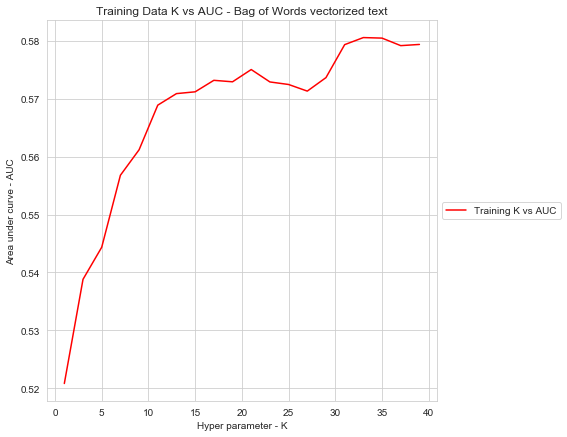

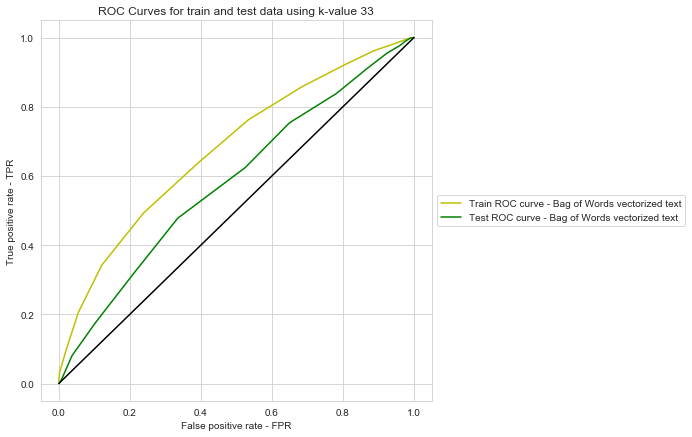

Results of analysis using Bag of Words vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.5208231778438155, 0.5388207141106124, 0.5443554856988919, 0.5567904380803824, 0.5611947320020753, 0.5689025654493272, 0.5708951863303491, 0.5712055873582917, 0.5731905803803545, 0.5729348803736909, 0.5750516547049701, 0.5729101695618276, 0.5724710285762991, 0.571328572164729, 0.5736583119248623, 0.5793537015023535, 0.580574158741386, 0.5804823414601682, 0.5791816629509718, 0.5793890388519048]
Optimal K-Value:  33
AUC value of test data:  0.58369996669968
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO               1             456
Actual: YES              0            2543


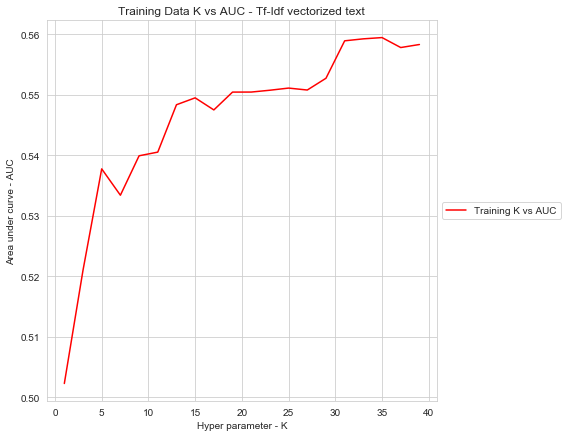

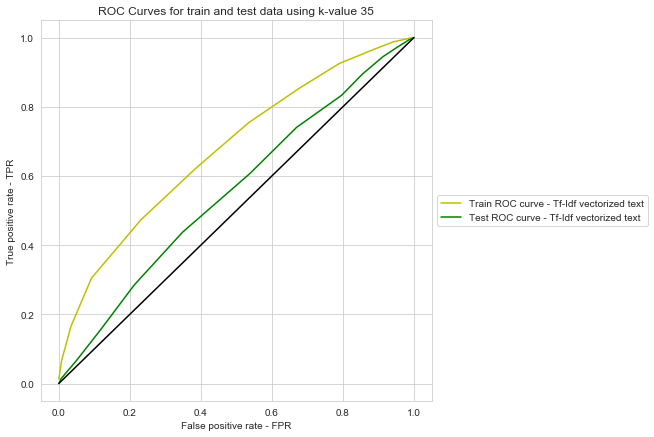

Results of analysis using Tf-Idf vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.502268737913808, 0.5210035911725254, 0.5377502551155098, 0.5333942597761746, 0.5399143246196763, 0.5405209848733368, 0.5483523952589064, 0.5494933934549823, 0.5474954442036795, 0.5504434876457428, 0.5504489280129469, 0.5507520605053919, 0.5511069359522345, 0.5507867210513148, 0.5527310878117206, 0.5589202442517875, 0.5592470560436937, 0.5594561583305314, 0.5578093194591379, 0.5583108324514976]
Optimal K-Value:  35
AUC value of test data:  0.5554028693345356
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO               0             457
Actual: YES              0            2543


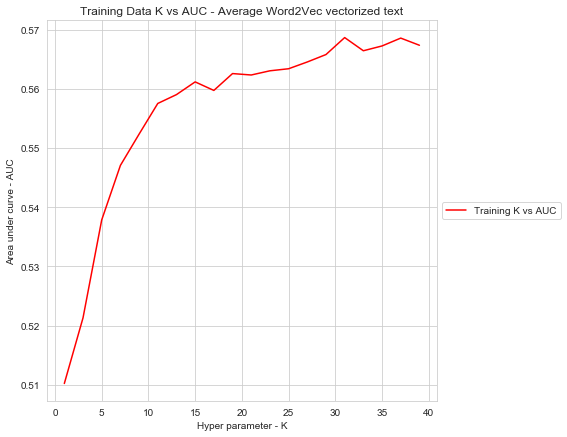

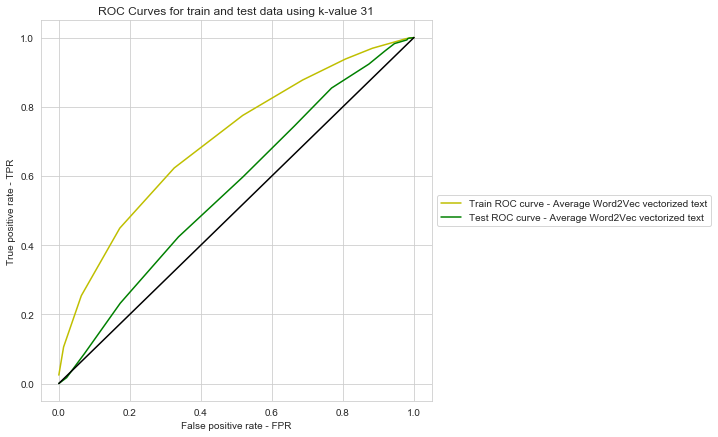

Results of analysis using Average Word2Vec vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.5102137153960281, 0.5213048840247699, 0.537847741333578, 0.547059981902272, 0.5523469198548131, 0.5575288556883619, 0.5590231271530748, 0.5611719450355064, 0.5597297396959424, 0.5625774286968841, 0.5623372962884595, 0.5630452459760734, 0.5633931409943183, 0.5645367885916814, 0.5657917551419027, 0.5686589944761107, 0.5664332106229713, 0.5672437680935047, 0.5685717848701585, 0.567360413524103]
Optimal K-Value:  31
AUC value of test data:  0.562602880348595
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO               1             456
Actual: YES              1            2542


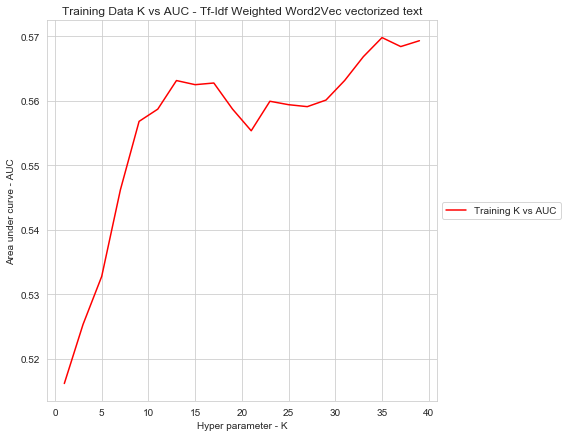

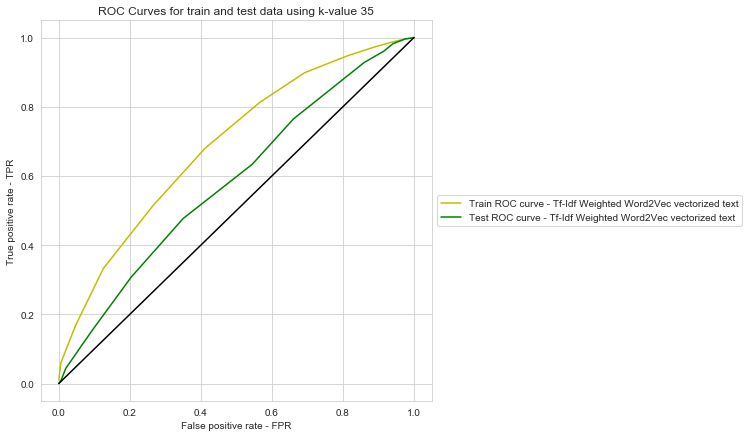

Results of analysis using Tf-Idf Weighted Word2Vec vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.5161888229147853, 0.5253361637812766, 0.5327815047899539, 0.5461971272610854, 0.5568005172331086, 0.5586970538538429, 0.5631244467002008, 0.5624858586903544, 0.5627442960495929, 0.5587017307105413, 0.5553460986679661, 0.559916556306143, 0.5593849935152642, 0.5590823391356098, 0.5600997780095505, 0.5631378829218097, 0.5668231635968736, 0.5697832874755709, 0.5683904920933875, 0.5692970434748391]
Optimal K-Value:  35
AUC value of test data:  0.5840665283599119
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO               0             457
Actual: YES              0            2543


In [124]:
testKValues = np.arange(1, 40, 2);
techniques = ['Bag of Words', 'Tf-Idf', 'Average Word2Vec', 'Tf-Idf Weighted Word2Vec'];
for index, technique in enumerate(techniques):
    areaUnderRocValuesTrain = [];
    trainingMergedData = hstack((categoriesVectorsSub,\
                                     subCategoriesVectorsSub,\
                                     teacherPrefixVectorsSub,\
                                     schoolStateVectorsSub,\
                                     projectGradeVectorsSub,\
                                     priceStandardizedSub,\
                                     previouslyPostedStandardizedSub));
    testMergedData = hstack((categoriesTransformedTestData,\
                                          subCategoriesTransformedTestData,\
                                          teacherPrefixTransformedTestData,\
                                          schoolStateTransformedTestData,\
                                          projectGradeTransformedTestData,\
                                          priceTransformedTestData,\
                                          previouslyPostedTransformedTestData));
    
    if(index == 0):
        trainingMergedData = hstack((trainingMergedData,\
                                     bowTitleModelSub,\
                                     bowEssayModelSub));
        testMergedData = hstack((testMergedData,\
                                 bowTitleTransformedTestData,\
                                 bowEssayTransformedTestData));
    elif(index == 1):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfTitleModelSub,\
                                     tfIdfEssayModelSub));
        testMergedData = hstack((testMergedData,\
                                 tfIdfTitleTransformedTestData,\
                                 tfIdfEssayTransformedTestData));
    elif(index == 2):
        trainingMergedData = hstack((trainingMergedData,\
                                     word2VecTitlesVectorsSub,\
                                     word2VecEssaysVectorsSub));
        testMergedData = hstack((testMergedData,\
                                 word2VecTitleTransformedTestData,\
                                 word2VecEssayTransformedTestData));
    elif(index == 3):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfWeightedWord2VecTitlesVectorsSub,\
                                     tfIdfWeightedWord2VecEssaysVectorsSub));
        testMergedData = hstack((testMergedData,\
                                 tfIdfWeightedTitleTransformedTestData,\
                                 tfIdfWeightedEssayTransformedTestData));
    for testKValue in tqdm(testKValues):
        knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
        scores = cross_val_score(knnClassifier, trainingMergedData, classesTraining, cv = 5, scoring = 'roc_auc');
        areaUnderRocValuesTrain.append(np.array(scores).mean());
        
    plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label = "Training K vs AUC");
    plt.title("Training Data K vs AUC - {} vectorized text".format(technique));
    plt.xlabel("Hyper parameter - K");
    plt.ylabel("Area under curve - AUC");
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    optimalKValue = testKValues[np.argmax(areaUnderRocValuesTrain)];
    knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm = 'brute');
    knnClassifier.fit(trainingMergedData, classesTraining);
    predProbScoresTraining = knnClassifier.predict_proba(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predProbScoresTraining[:, 1]);
    predProbScoresTest = knnClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
    areaUnderRocValueTest = auc(fprTest, tprTest);
    plt.plot(fprTrain, tprTrain, 'y', label="Train ROC curve - {} vectorized text".format(technique));
    plt.plot(fprTest, tprTest, 'g', label="Test ROC curve - {} vectorized text".format(technique));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.title("ROC Curves for train and test data using k-value {}".format(optimalKValue))
    plt.xlabel('False positive rate - FPR');
    plt.ylabel('True positive rate - TPR');
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    print("Results of analysis using {} vectorized text features merged with other features using K-NN brute force algorithm:".format(technique));
    equalsBorder(70);
    print("AUC values of train data: ");
    equalsBorder(40);
    print(areaUnderRocValuesTrain);
    equalsBorder(40);
    print("Optimal K-Value: ", optimalKValue);
    equalsBorder(40);
    print("AUC value of test data: ", areaUnderRocValueTest);
    # Predicting classes of test data projects
    predictionClassesTest = knnClassifier.predict(testMergedData);
    equalsBorder(40);
    # Adding results to results dataframe
    kFoldResultsDataFrame = kFoldResultsDataFrame.append({'Vectorizer': technique, 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    print(confusionMatrixDataFrame);
    equalsBorder(110);
    equalsBorder(110);
    equalsBorder(110);

<a id="classification_using_knn_kfold_cross_validation_balanced_data"></a>
<h2><font color="green">Analysis on balanced data using K-NN(k-fold cross validation)</font></h2>

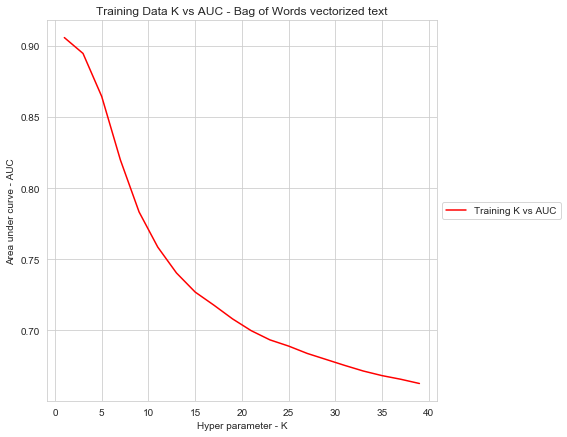

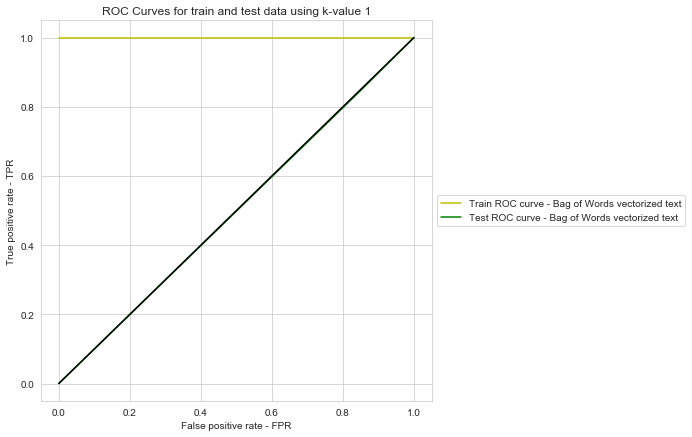

Results of analysis using Bag of Words vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.9057420305535363, 0.8945913265518728, 0.8643774256788769, 0.8197352055462597, 0.7831827453591671, 0.758477792194014, 0.7403199541524053, 0.7268958883622098, 0.7177136528989003, 0.7080414033713262, 0.6997465178960134, 0.6932946817988367, 0.6889350859650298, 0.6837457930690102, 0.679552227469989, 0.6753509086931728, 0.6713878555117908, 0.668164493494084, 0.6656132376613825, 0.6626255980811904]
Optimal K-Value:  1
AUC value of test data:  0.49852902075547845
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO              70             387
Actual: YES            397            2146


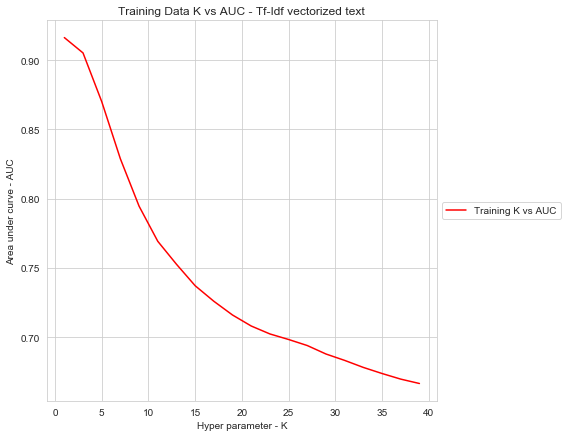

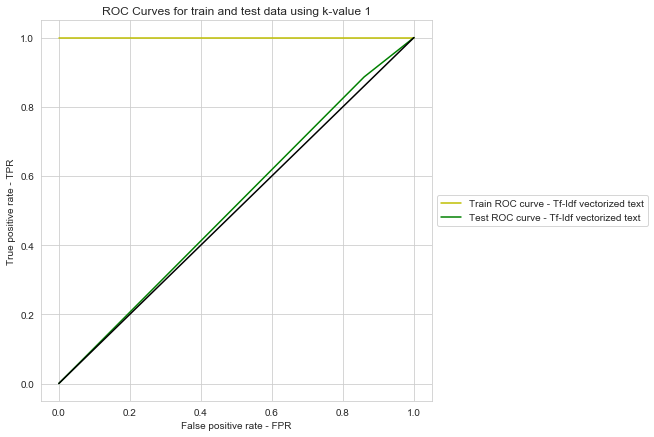

Results of analysis using Tf-Idf vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.9162314252869678, 0.9051465726945087, 0.8700486476341652, 0.8286864275417989, 0.7945284683543399, 0.7691953017653705, 0.7526217878192457, 0.7371226914526057, 0.7259029424111647, 0.7159810784194411, 0.7080471371772863, 0.7023211488408301, 0.6983180203690182, 0.6939487220959272, 0.6878382399601758, 0.6832277363125655, 0.6781525569231107, 0.6737646368461715, 0.6697149551948767, 0.6665500341435163]
Optimal K-Value:  1
AUC value of test data:  0.5131992314251763
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO              64             393
Actual: YES            289            2254


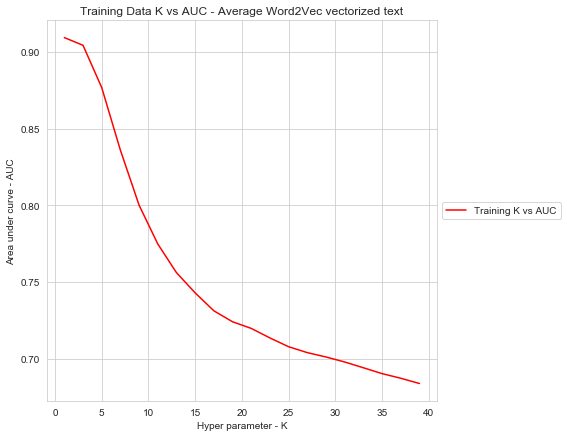

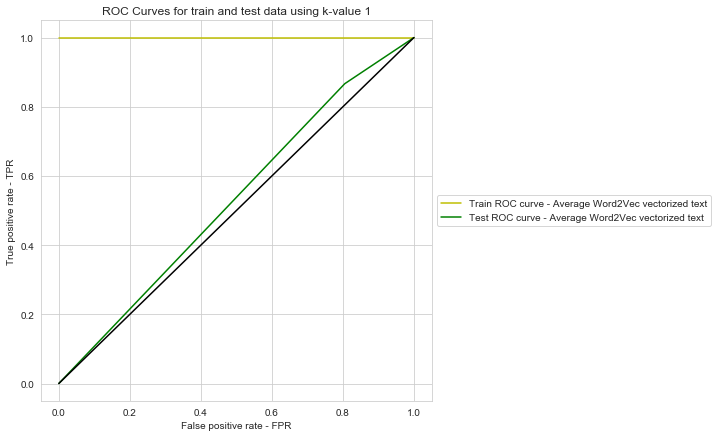

Results of analysis using Average Word2Vec vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.9093497652978998, 0.9043068534254385, 0.8767541992552405, 0.8358918803789022, 0.800026322373629, 0.7747237890205636, 0.7560104333549655, 0.7428012794214311, 0.7311305254759695, 0.7239627091724085, 0.7196395662460556, 0.713419297433914, 0.7076839620746282, 0.7038409688791923, 0.700988602535348, 0.6977323048810804, 0.6939701123843026, 0.6901406341038436, 0.6871256170518121, 0.6836911609735372]
Optimal K-Value:  1
AUC value of test data:  0.5307206206422401
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO              89             368
Actual: YES            339            2204


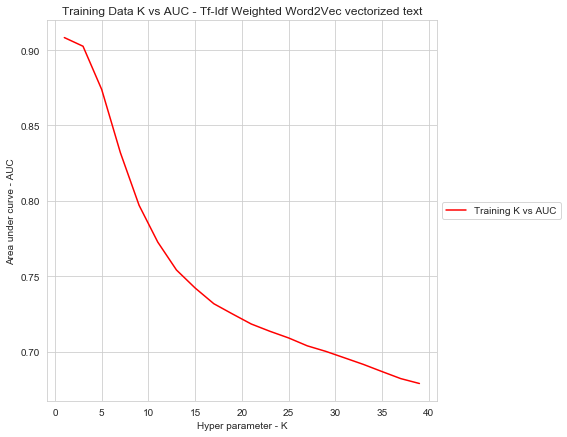

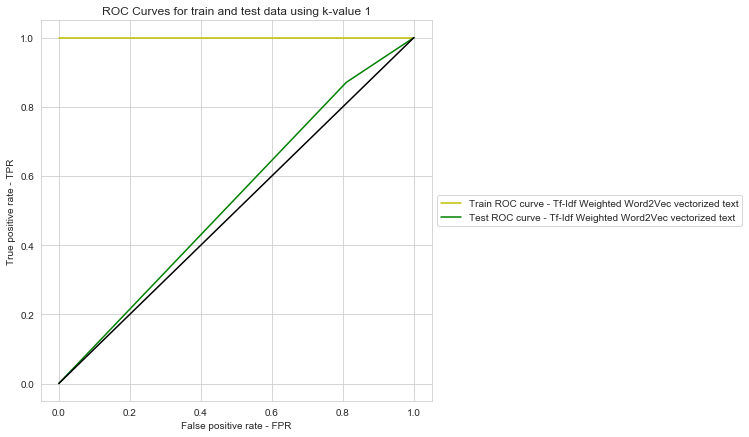

Results of analysis using Tf-Idf Weighted Word2Vec vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.908259020393443, 0.902518511637626, 0.873836129148551, 0.8319427385855086, 0.7970860718982278, 0.772702425590641, 0.7542135496685562, 0.7422664575997266, 0.7318550687138528, 0.7250536979958738, 0.7184275714913131, 0.7135910863600886, 0.7091812336767213, 0.7039484956887567, 0.7002417364824247, 0.6959596335302047, 0.6916482733087009, 0.6868862403662254, 0.6822305545686868, 0.678981570167769]
Optimal K-Value:  1
AUC value of test data:  0.5304986185099871
Confusion Matrix : 
             Predicted: NO  Predicted: YES
Actual: NO              87             370
Actual: YES            329            2214


In [194]:
testKValues = np.arange(1, 40, 2);
techniques = ['Bag of Words', 'Tf-Idf', 'Average Word2Vec', 'Tf-Idf Weighted Word2Vec'];
for index, technique in enumerate(techniques):
    areaUnderRocValuesTrain = [];
    trainingMergedData = hstack((categoriesVectorsSub,\
                                     subCategoriesVectorsSub,\
                                     teacherPrefixVectorsSub,\
                                     schoolStateVectorsSub,\
                                     projectGradeVectorsSub,\
                                     priceStandardizedSub,\
                                     previouslyPostedStandardizedSub));
    testMergedData = hstack((categoriesTransformedTestData,\
                                          subCategoriesTransformedTestData,\
                                          teacherPrefixTransformedTestData,\
                                          schoolStateTransformedTestData,\
                                          projectGradeTransformedTestData,\
                                          priceTransformedTestData,\
                                          previouslyPostedTransformedTestData));
    
    if(index == 0):
        trainingMergedData = hstack((trainingMergedData,\
                                     bowTitleModelSub,\
                                     bowEssayModelSub));
        testMergedData = hstack((testMergedData,\
                                 bowTitleTransformedTestData,\
                                 bowEssayTransformedTestData));
    elif(index == 1):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfTitleModelSub,\
                                     tfIdfEssayModelSub));
        testMergedData = hstack((testMergedData,\
                                 tfIdfTitleTransformedTestData,\
                                 tfIdfEssayTransformedTestData));
    elif(index == 2):
        trainingMergedData = hstack((trainingMergedData,\
                                     word2VecTitlesVectorsSub,\
                                     word2VecEssaysVectorsSub));
        testMergedData = hstack((testMergedData,\
                                 word2VecTitleTransformedTestData,\
                                 word2VecEssayTransformedTestData));
    elif(index == 3):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfWeightedWord2VecTitlesVectorsSub,\
                                     tfIdfWeightedWord2VecEssaysVectorsSub));
        testMergedData = hstack((testMergedData,\
                                 tfIdfWeightedTitleTransformedTestData,\
                                 tfIdfWeightedEssayTransformedTestData));
    for testKValue in tqdm(testKValues):
        knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
        scores = cross_val_score(knnClassifier, trainingMergedData, classesTraining, cv = 5, scoring = 'roc_auc');
        areaUnderRocValuesTrain.append(np.array(scores).mean());
        
    plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label = "Training K vs AUC");
    plt.title("Training Data K vs AUC - {} vectorized text".format(technique));
    plt.xlabel("Hyper parameter - K");
    plt.ylabel("Area under curve - AUC");
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    optimalKValue = testKValues[np.argmax(areaUnderRocValuesTrain)];
    knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm = 'brute');
    knnClassifier.fit(trainingMergedData, classesTraining);
    predProbScoresTraining = knnClassifier.predict_proba(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predProbScoresTraining[:, 1]);
    predProbScoresTest = knnClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
    areaUnderRocValueTest = auc(fprTest, tprTest);
    plt.plot(fprTrain, tprTrain, 'y', label="Train ROC curve - {} vectorized text".format(technique));
    plt.plot(fprTest, tprTest, 'g', label="Test ROC curve - {} vectorized text".format(technique));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.title("ROC Curves for train and test data using k-value {}".format(optimalKValue))
    plt.xlabel('False positive rate - FPR');
    plt.ylabel('True positive rate - TPR');
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show();
    
    print("Results of analysis using {} vectorized text features merged with other features using K-NN brute force algorithm:".format(technique));
    equalsBorder(70);
    print("AUC values of train data: ");
    equalsBorder(40);
    print(areaUnderRocValuesTrain);
    equalsBorder(40);
    print("Optimal K-Value: ", optimalKValue);
    equalsBorder(40);
    print("AUC value of test data: ", areaUnderRocValueTest);
    # Predicting classes of test data projects
    predictionClassesTest = knnClassifier.predict(testMergedData);
    equalsBorder(40);
    # Adding results to results dataframe
    kFoldResultsDataFrame = kFoldResultsDataFrame.append({'Vectorizer': technique, 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    print(confusionMatrixDataFrame);
    equalsBorder(110);
    equalsBorder(110);
    equalsBorder(110);

<a id="classification_using_knn_kfold_cross_validation_feature_selection"></a>
<h2><font color="blue">Selecting top 2000 important features from data with Tf-Idf vectorized text</font></h2>

In [282]:
trainingMergedData = hstack((categoriesVectorsSub,\
                                 subCategoriesVectorsSub,\
                                 teacherPrefixVectorsSub,\
                                 schoolStateVectorsSub,\
                                 projectGradeVectorsSub,\
                                 priceStandardizedSub,\
                                 previouslyPostedStandardizedSub));
testMergedData = hstack((categoriesTransformedTestData,\
                                      subCategoriesTransformedTestData,\
                                      teacherPrefixTransformedTestData,\
                                      schoolStateTransformedTestData,\
                                      projectGradeTransformedTestData,\
                                      priceTransformedTestData,\
                                      previouslyPostedTransformedTestData));
trainingMergedData = hstack((trainingMergedData,\
                             tfIdfTitleModelSub,\
                             tfIdfEssayModelSub));
testMergedData = hstack((testMergedData,\
                         tfIdfTitleTransformedTestData,\
                         tfIdfEssayTransformedTestData));

In [283]:
print("Training data shape: ", trainingMergedData.shape);
print("Test data shape: ", testMergedData.shape);
print("Classes Training shape: ", classesTraining.shape);

Training data shape:  (7000, 5671)
Test data shape:  (3000, 5671)
Classes Training shape:  (7000,)


In [284]:
selectKBest = SelectKBest(f_classif, k = 2000);
filteredFeaturesTrainingMergedData = selectKBest.fit_transform(trainingMergedData, classesTraining);
filteredFeaturesTrainingMergedData.shape

(7000, 2000)

In [219]:
selectedFeaturesResultsDataFrame = pd.DataFrame(columns =  ['Vectorizer', 'Model', 'Hyper Parameter - K', 'AUC']);
selectedFeaturesResultsDataFrame

Empty DataFrame
Columns: [Vectorizer, Model, Hyper Parameter - K, AUC]
Index: []

<a id="classification_using_knn_kfold_cross_validation_feature_selection_imbalanced_data"></a>
<h3><font color="green">Analysis on imbalanced data using top 2000 features of data & K-NN(k-fold cross validation)</font></h3>

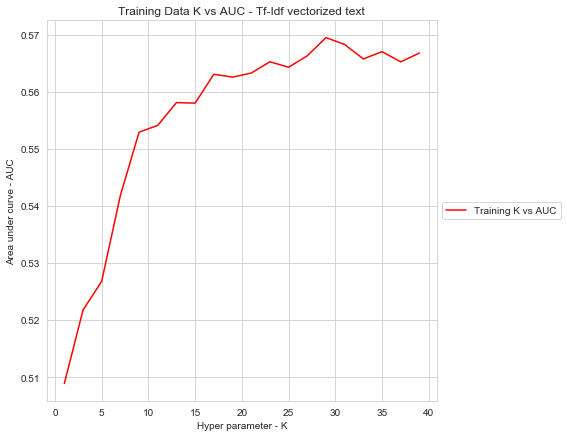

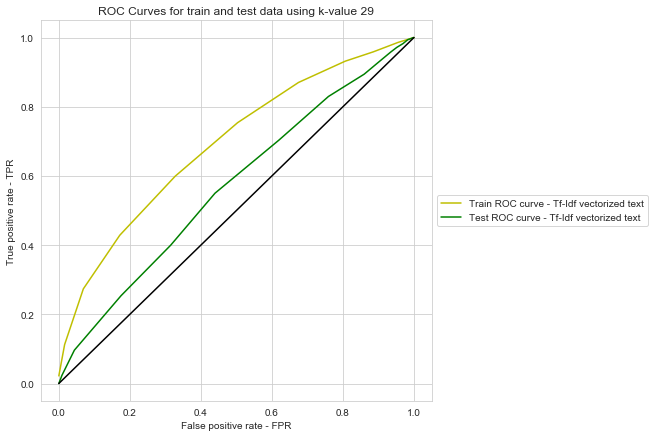

Results of analysis using Tf-Idf vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.5088720627641867, 0.5217475405236953, 0.5268075645978578, 0.5418624048096264, 0.5529243098246011, 0.5541331755985821, 0.5581202558462723, 0.5580210647113776, 0.5630920439936429, 0.5625807992918386, 0.5632949191550652, 0.5652738508284056, 0.5643100379026158, 0.5663234598175874, 0.5695147297432138, 0.5683041363163748, 0.5657703420165175, 0.5670452133486332, 0.5652631279021676, 0.566803790243511]
Optimal K-Value:  29
AUC value of test data:  0.5700468355661183
Confusion Matrix : 


Predicted: NO  Predicted: YES
Actual: NO               1             456
Actual: YES              0            2543

In [285]:
testKValues = np.arange(1, 40, 2);
areaUnderRocValuesTrain = [];
for testKValue in tqdm(testKValues):
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    scores = cross_val_score(knnClassifier, filteredFeaturesTrainingMergedData, classesTraining, cv = 10, scoring = 'roc_auc');
    areaUnderRocValuesTrain.append(np.array(scores).mean());

plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label = "Training K vs AUC");
plt.title("Training Data K vs AUC - {} vectorized text".format("Tf-Idf"));
plt.xlabel("Hyper parameter - K");
plt.ylabel("Area under curve - AUC");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

optimalKValue = testKValues[np.argmax(areaUnderRocValuesTrain)];
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm = 'brute');
knnClassifier.fit(filteredFeaturesTrainingMergedData, classesTraining);
predProbScoresTraining = knnClassifier.predict_proba(filteredFeaturesTrainingMergedData);
fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predProbScoresTraining[:, 1]);
filteredFeaturesTestMergedData = selectKBest.transform(testMergedData);
predProbScoresTest = knnClassifier.predict_proba(filteredFeaturesTestMergedData);
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
areaUnderRocValueTest = auc(fprTest, tprTest);
plt.plot(fprTrain, tprTrain, 'y', label="Train ROC curve - {} vectorized text".format("Tf-Idf"));
plt.plot(fprTest, tprTest, 'g', label="Test ROC curve - {} vectorized text".format("Tf-Idf"));
plt.plot([0, 1], [0, 1], 'k-');
plt.title("ROC Curves for train and test data using k-value {}".format(optimalKValue))
plt.xlabel('False positive rate - FPR');
plt.ylabel('True positive rate - TPR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

print("Results of analysis using {} vectorized text features merged with other features using K-NN brute force algorithm:".format("Tf-Idf"));
equalsBorder(70);
print("AUC values of train data: ");
equalsBorder(40);
print(areaUnderRocValuesTrain);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test data projects
predictionClassesTest = knnClassifier.predict(filteredFeaturesTestMergedData);
equalsBorder(40);
# Adding results to results dataframe
selectedFeaturesResultsDataFrame = selectedFeaturesResultsDataFrame.append({'Vectorizer': "Tf-Idf", 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
print("Confusion Matrix : ");
equalsBorder(60);
confusionMatrixDataFrame

<a id="classification_using_knn_kfold_cross_validation_feature_selection_balanced_data"></a>
<h3><font color="green">Analysis on balanced data using top 2000 features of data & K-NN(k-fold cross validation)</font></h3>

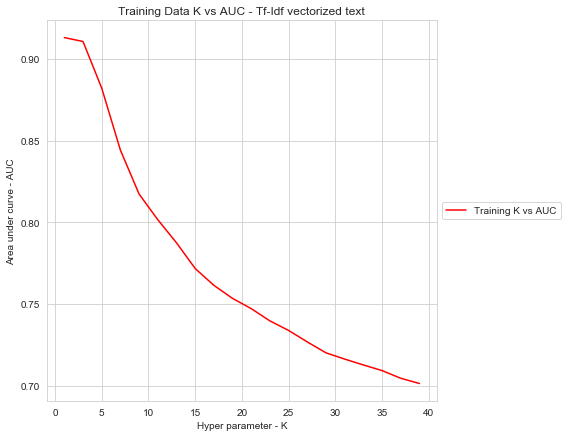

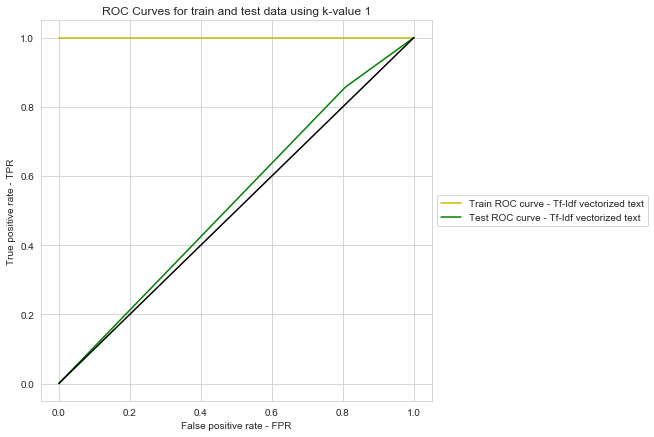

Results of analysis using Tf-Idf vectorized text features merged with other features using K-NN brute force algorithm:
AUC values of train data: 
[0.9129600699340139, 0.9105657467870607, 0.8820615744200531, 0.8441363074351376, 0.8172390430088156, 0.8015838395266643, 0.7874551480982624, 0.7717280210510082, 0.761433674607709, 0.7534328482694689, 0.7471611991430402, 0.7396569254137402, 0.7338309325838084, 0.7267953833586733, 0.7201293359119455, 0.7163098001423787, 0.7127235154083043, 0.7092761731297839, 0.7045749863804595, 0.7013669418724919]
Optimal K-Value:  1
AUC value of test data:  0.5249076927180719
Confusion Matrix : 


Predicted: NO  Predicted: YES
Actual: NO              88             369
Actual: YES            363            2180

In [223]:
testKValues = np.arange(1, 40, 2);
areaUnderRocValuesTrain = [];
for testKValue in tqdm(testKValues):
    knnClassifier = KNeighborsClassifier(n_neighbors = testKValue, algorithm = 'brute');
    scores = cross_val_score(knnClassifier, filteredFeaturesTrainingMergedData, classesTraining, cv = 10, scoring = 'roc_auc');
    areaUnderRocValuesTrain.append(np.array(scores).mean());

plt.plot(testKValues, areaUnderRocValuesTrain, 'r', label = "Training K vs AUC");
plt.title("Training Data K vs AUC - {} vectorized text".format("Tf-Idf"));
plt.xlabel("Hyper parameter - K");
plt.ylabel("Area under curve - AUC");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

optimalKValue = testKValues[np.argmax(areaUnderRocValuesTrain)];
knnClassifier = KNeighborsClassifier(n_neighbors = optimalKValue, algorithm = 'brute');
knnClassifier.fit(filteredFeaturesTrainingMergedData, classesTraining);
predProbScoresTraining = knnClassifier.predict_proba(filteredFeaturesTrainingMergedData);
fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predProbScoresTraining[:, 1]);
filteredFeaturesTestMergedData = selectKBest.transform(testMergedData);
predProbScoresTest = knnClassifier.predict_proba(filteredFeaturesTestMergedData);
fprTest, tprTest, thresholdTest = roc_curve(classesTest, predProbScoresTest[:, 1]);
areaUnderRocValueTest = auc(fprTest, tprTest);
plt.plot(fprTrain, tprTrain, 'y', label="Train ROC curve - {} vectorized text".format("Tf-Idf"));
plt.plot(fprTest, tprTest, 'g', label="Test ROC curve - {} vectorized text".format("Tf-Idf"));
plt.plot([0, 1], [0, 1], 'k-');
plt.title("ROC Curves for train and test data using k-value {}".format(optimalKValue))
plt.xlabel('False positive rate - FPR');
plt.ylabel('True positive rate - TPR');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

print("Results of analysis using {} vectorized text features merged with other features using K-NN brute force algorithm:".format("Tf-Idf"));
equalsBorder(70);
print("AUC values of train data: ");
equalsBorder(40);
print(areaUnderRocValuesTrain);
equalsBorder(40);
print("Optimal K-Value: ", optimalKValue);
equalsBorder(40);
print("AUC value of test data: ", areaUnderRocValueTest);
# Predicting classes of test data projects
predictionClassesTest = knnClassifier.predict(filteredFeaturesTestMergedData);
equalsBorder(40);
# Adding results to results dataframe
selectedFeaturesResultsDataFrame = selectedFeaturesResultsDataFrame.append({'Vectorizer': "Tf-Idf", 'Model': 'Brute', 'Hyper Parameter - K': optimalKValue, 'AUC': areaUnderRocValueTest}, ignore_index = True);
# Printing confusion matrix
confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
# Creating dataframe for generated confusion matrix
confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
print("Confusion Matrix : ");
equalsBorder(60);
confusionMatrixDataFrame

<a id="classification_using_knn_results"></a>
<h2><font color="green">Summarizing results of above analysis using K-NN</font></h2>

<h3><font color="blue">Results of analysis on imbalanced and balanced when K-NN(simple cross validation) is used</font></h3>

In [294]:
resultsDataFrame

Vectorizer  Model Hyper Parameter - K       AUC
0              Bag of Words  Brute                  13  0.553233
1                    Tf-Idf  Brute                  17  0.549128
2          Average Word2Vec  Brute                  31  0.557426
3  Tf-Idf Weighted Word2Vec  Brute                  39  0.577138
4              Bag of Words  Brute                  23  0.542332
5                    Tf-Idf  Brute                  19  0.553233
6          Average Word2Vec  Brute                  25  0.522696
7  Tf-Idf Weighted Word2Vec  Brute                  27  0.535176

<h3><font color="blue">Results of analysis on imbalanced and balanced when K-NN(k-fold cross validation) is used</font></h3>

In [195]:
kFoldResultsDataFrame

Vectorizer  Model Hyper Parameter - K       AUC
0              Bag of Words  Brute                  33  0.583700
1                    Tf-Idf  Brute                  35  0.555403
2          Average Word2Vec  Brute                  31  0.562603
3  Tf-Idf Weighted Word2Vec  Brute                  35  0.584067
4              Bag of Words  Brute                   1  0.498529
5                    Tf-Idf  Brute                   1  0.513199
6          Average Word2Vec  Brute                   1  0.530721
7  Tf-Idf Weighted Word2Vec  Brute                   1  0.530499

<h3><font color="blue">Results of analysis on imbalanced and balanced when K-NN(k-fold cross validation) with top 200 features</font></h3>

In [287]:
selectedFeaturesResultsDataFrame

Vectorizer  Model Hyper Parameter - K       AUC
0     Tf-Idf  Brute                   1  0.524908
1     Tf-Idf  Brute                  29  0.570047

<a id="classification_using_knn_conclusions"></a>
<h2><font color="green">Conclusions of above analysis:</font></h2>
1. The best k-value by considering AUC values will be 33 but the model trained with this k-value and imbalanced data is unable to predict the negative points and so it's like a dumb model.
2. While training with balanced data is able to predict negative and positive points considerably but with accuracy far less than training with imbalanced data.
3. It seems like K-NN cannot be used for solving the above problem if we want good prediction results.